In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0.Packages and functions

## 0.1 Packages

In [2]:
# import basic packages
import numpy as np
import matplotlib.pyplot as plt
import os                   # to list the images
import random
import datetime
import time

# to evaluate the performance
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

# import keras package to create the CNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers, Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization, \
                                    Dropout, Flatten, Dense, GlobalAveragePooling2D, \
                                    Conv2DTranspose, LeakyReLU, UpSampling2D, ZeroPadding2D, Reshape
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image

# import the libraries of pre-trained models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet121

from IPython import display

import warnings   # to disable warning
warnings.filterwarnings('ignore')     

## 0.2 Functions

In [ ]:
# method to plot an image
def plot_img(X, y, classes):
  plt.figure(figsize = (15,2))
  plt.imshow(X)
  plt.xlabel(classes[int(y[0].item())])
  plt.show()

# method to plot image array
def plot_img_array(X, y, classes, num_rows=4, num_cols=4, fig_w=10, fig_h=10, axis_off=False):
  fig = plt.figure(figsize=(fig_w,fig_h))
  for _ in range(1,num_rows*num_cols+1):
    plt.subplot(num_rows, num_cols, _)
    plt.imshow(X[_-1],interpolation='nearest')
    plt.xlabel(str(int(y[_-1].item()))+" "+classes[int(y[_-1].item())])
    if axis_off:
      plt.axis('off')
  plt.show()

def build_dataset(data_path):
  if "TRAIN" in data_path:
    if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train.npy") and \
       os.path.exists("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train.npy"):
      print("Cifar10 train sets exist!")
      return
  elif "TEST" in data_path:
    if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy") and \
       os.path.exists("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test.npy"):
      print("Cifar10 test sets exist!")
      return
  elif "101" in data_path:
    if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech101_X.npy") and \
       os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech101_y.npy"):
      print("Caltech101 dataset exists!")
      return
  elif "256" in data_path:
    if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech256_X.npy") and \
       os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech256_y.npy"):
      print("Caltech256 dataset exists!")
      return

  file_index = 0
  file_list = os.listdir(data_path)
  
  classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] if "TRAIN" in data_path or "TEST" in data_path else file_list
  print("{} classes found, the classes are:".format(len(classes)), classes)

  # read image data
  for c in file_list:
    data_path_2 = data_path + "/" + c
    file_list_2 = os.listdir(data_path_2)
    print("class {}: '".format(file_list.index(c)),c,"' in process... ", len(file_list_2), " images found.")
    for file_name in file_list_2:
      img_path = data_path_2 + "/" + file_name
      img = image.load_img(img_path, target_size=(64, 64))
      img_value = image.img_to_array(img)
      img_value = np.expand_dims(img_value, axis=0)
      img_value = img_value.astype(np.uint8)
      img_label = np.array([classes.index(c)])
      
      if file_index == 0:
        X = img_value
        y = img_label
      else:
        X = np.vstack((X, img_value))
        y = np.vstack((y, img_label))
      
      if file_list_2.index(file_name) % 1000 == 0 or (file_list_2.index(file_name)+1) % 1000 == 0:
        plot_img(img_value[0],img_label,classes)
      if file_list_2.index(file_name) % 200 == 0:
        print("%5d"%(file_list_2.index(file_name)+1),end="")
      elif (file_list_2.index(file_name) +1) % 200 == 0:
        print("%5d"%(file_list_2.index(file_name)+1))
      else:
        print(".",end="")
      file_index = file_index + 1
    print("\nclass '",c,"' done!")
    print("In total, ",file_index," images have been processed.\n")

  # save the extracted data
  if "TRAIN" in data_path:
    np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train.npy",X)
    print("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train.npy saved.")
    np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train.npy",y)
    print("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train.npy saved.")
  elif "TEST" in data_path:
    np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy",X)
    print("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy saved.")
    np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test.npy",y)
    print("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test.npy saved.")
  elif "101" in data_path:
    np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X.npy",X)
    print("/content/drive/MyDrive/Deep Learning_Project/caltech101_X.npy saved.")
    np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_y.npy",y)
    print("/content/drive/MyDrive/Deep Learning_Project/caltech101_y.npy saved.")
  elif "256" in data_path:
    np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X.npy",X)
    print("/content/drive/MyDrive/Deep Learning_Project/caltech256_X.npy saved.")
    np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_y.npy",y)
    print("/content/drive/MyDrive/Deep Learning_Project/caltech256_y.npy saved.")


# 1.Building datasets

## 1.1 Build Dataset for Cifar10

Cifar10 train sets exist!
Cifar10 test sets exist!
Cifar10 train set samples


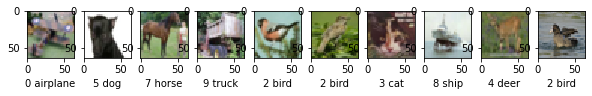

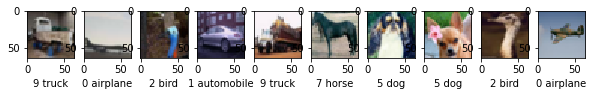

Cifar10 test set samples


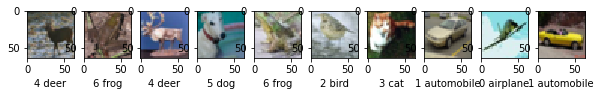

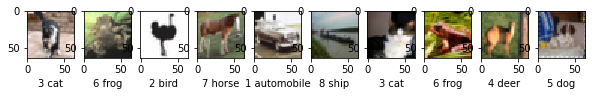

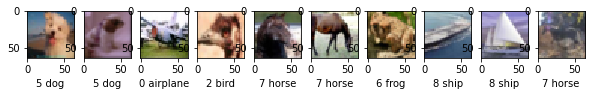

In [ ]:
# build dataset for cifar10 train set
build_dataset("/content/drive/MyDrive/Deep Learning_Project/tmp/cifar/TRAINSET")
# build dataset for cifar10 test set
build_dataset("/content/drive/MyDrive/Deep Learning_Project/tmp/cifar/TESTSET")

# sanity test for cifar10 train and test sets
# randomly sample images to show
num_rows=1
num_cols=10
num_sample=num_rows*num_cols

X = np.load("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train.npy")

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print("Cifar10 train set samples")
for i in range(5):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)

X = np.load("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test.npy")
print("Cifar10 test set samples")
for i in range(5):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)

## 1.2 Build Dataset for Caltech101

Caltech101 dataset exists!
Caltech101 samples


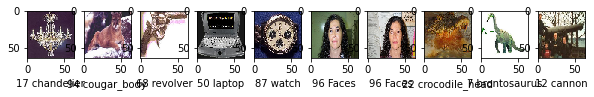

Caltech101 samples


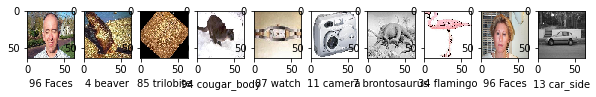

Caltech101 samples


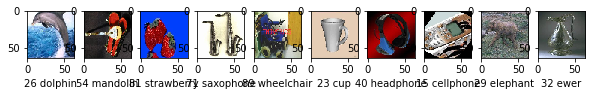

Caltech101 samples


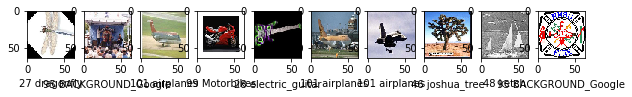

Caltech101 samples


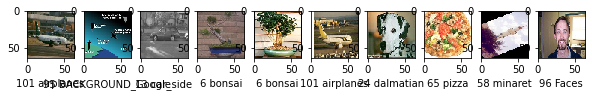

Caltech101 samples


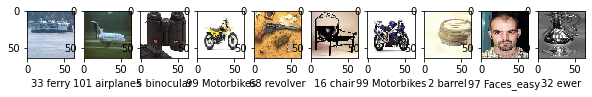

Caltech101 samples


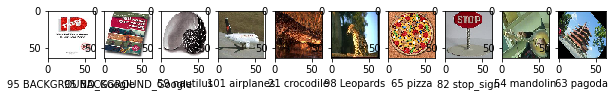

Caltech101 samples


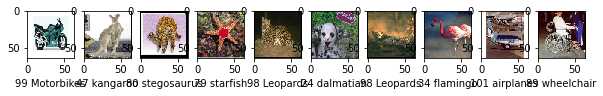

Caltech101 samples


Caltech101 samples


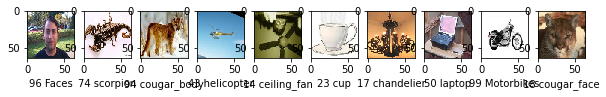

In [ ]:
# build dataset for Caltech101
build_dataset("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech101/101_ObjectCategories")

# sanity test for cifar test set
# randomly sample images to show
num_rows=1
num_cols=10
num_sample=num_rows*num_cols

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y.npy")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  classes = os.listdir("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech101/101_ObjectCategories")
  print("Caltech101 samples")
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)

## 1.3 Build Dataset for Caltech256

Caltech256 dataset exists!
Caltech256 samples


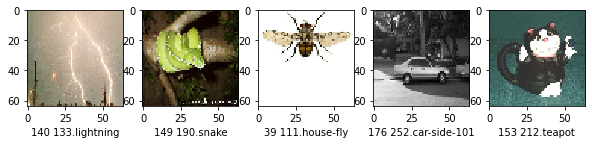

Caltech256 samples


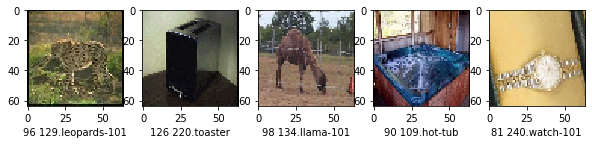

Caltech256 samples


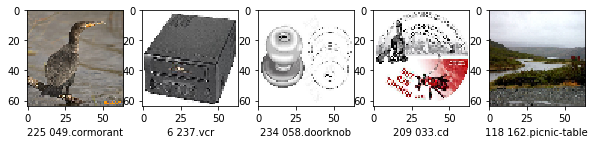

Caltech256 samples


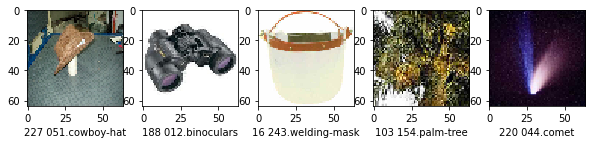

Caltech256 samples


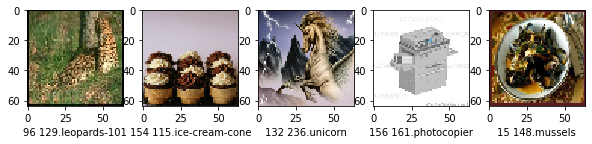

Caltech256 samples


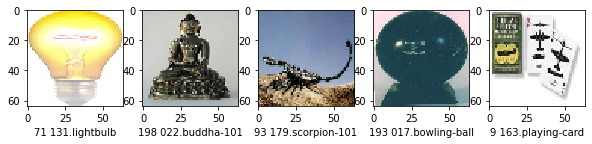

Caltech256 samples


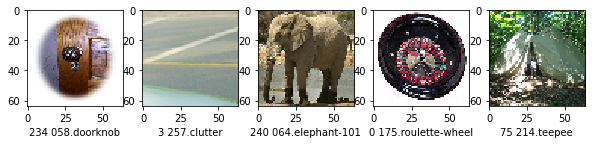

Caltech256 samples


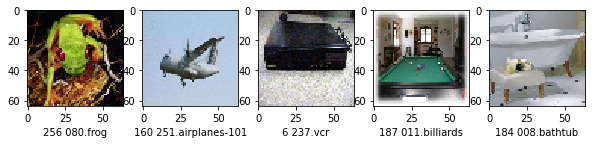

Caltech256 samples


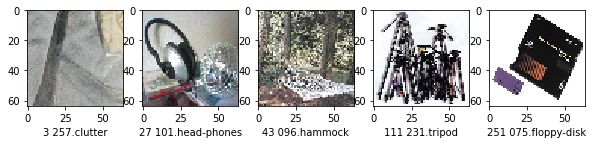

Caltech256 samples


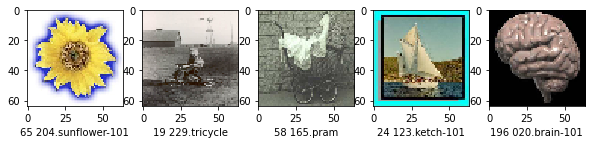

In [ ]:
# build dataset for Caltech256
build_dataset("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech256/256_ObjectCategories")

# sanity test for cifar test set
# randomly sample images to show
num_rows=1
num_cols=5
num_sample=num_rows*num_cols

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y.npy")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  classes = os.listdir("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech256/256_ObjectCategories")
  print("Caltech256 samples")
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)

## 1.4 Build train and test sets for Caltech101  
Randomly select 30 images from each category and put them to train set, others go to test set

In [ ]:
caltech101_X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X.npy")
print("caltech101_X has a size:",caltech101_X.shape)
caltech101_y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y.npy")
print("caltech101_y has a size:",caltech101_y.shape)

caltech101_y_label = np.unique(caltech101_y).flatten().tolist()
print("\nCaltech101 has labels:",caltech101_y_label,"\n")

caltech101_X_train,caltech101_y_train,caltech101_X_test,caltech101_y_test = None,None,None,None

for l in caltech101_y_label:
  idx = np.where(caltech101_y==l)[0]
  print("indices for images with y = {}".format(l))

  # randomly select 30 indices for the current y value
  idx_2=random.sample(range(0,len(idx)),30)
  print("indices for 30 selected images for training: {}".format(idx[idx_2]))
  print("indices for images for testing: {}".format(list(set(idx)-set(idx[idx_2]))) )

  # concatenate the images to train and test set
  caltech101_X_train = caltech101_X[idx[idx_2]] if caltech101_X_train is None else np.vstack((caltech101_X_train, caltech101_X[idx[idx_2]]))
  caltech101_y_train = caltech101_y[idx[idx_2]] if caltech101_y_train is None else np.vstack((caltech101_y_train, caltech101_y[idx[idx_2]]))
  caltech101_X_test = caltech101_X[list(set(idx)-set(idx[idx_2]))] if caltech101_X_test is None else np.vstack((caltech101_X_test, caltech101_X[list(set(idx)-set(idx[idx_2]))]))
  caltech101_y_test = caltech101_y[list(set(idx)-set(idx[idx_2]))] if caltech101_y_test is None else np.vstack((caltech101_y_test, caltech101_y[list(set(idx)-set(idx[idx_2]))]))

print("\nAfter splitting, caltech101_X_train has size:",caltech101_X_train.shape)
print("After splitting, caltech101_y_train has size:",caltech101_y_train.shape)
print("After splitting, caltech101_X_test has size:",caltech101_X_test.shape)
print("After splitting, caltech101_y_test has size:",caltech101_y_test.shape)

np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy",caltech101_X_train)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy saved")
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy",caltech101_y_train)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy saved")
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy",caltech101_X_test)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy saved")
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy",caltech101_y_test)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy saved")

# sanity test for caltech101 train and test sets
# randomly sample images to show
num_rows=1
num_cols=5
num_sample=num_rows*num_cols
classes = os.listdir("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech101/101_ObjectCategories")

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy")

print("Caltech101 train samples")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy")

print("Caltech101 test samples")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)



## 1.5 Build train and test sets for Caltech256  
Randomly select 30 images from each category and put them to train set, others go to test set

In [ ]:
caltech256_X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X.npy")
print("caltech256_X has a size:",caltech256_X.shape)
caltech256_y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y.npy")
print("caltech256_y has a size:",caltech256_y.shape)

caltech256_y_label = np.unique(caltech256_y).flatten().tolist()
print("\nCaltech256 has labels:",caltech256_y_label,"\n")

caltech256_X_train,caltech256_y_train,caltech256_X_test,caltech256_y_test = None,None,None,None

for l in caltech256_y_label:
  idx = np.where(caltech256_y==l)[0]
  print("indices for images with y = {}".format(l))

  # randomly select 30 indices for the current y value
  idx_2=random.sample(range(0,len(idx)),30)
  print("indices for 30 selected images for training: {}".format(idx[idx_2]))
  print("indices for images for testing: {}".format(list(set(idx)-set(idx[idx_2]))) )

  # concatenate the images to train and test set
  caltech256_X_train = caltech256_X[idx[idx_2]] if caltech256_X_train is None else np.vstack((caltech256_X_train, caltech256_X[idx[idx_2]]))
  caltech256_y_train = caltech256_y[idx[idx_2]] if caltech256_y_train is None else np.vstack((caltech256_y_train, caltech256_y[idx[idx_2]]))
  caltech256_X_test = caltech256_X[list(set(idx)-set(idx[idx_2]))] if caltech256_X_test is None else np.vstack((caltech256_X_test, caltech256_X[list(set(idx)-set(idx[idx_2]))]))
  caltech256_y_test = caltech256_y[list(set(idx)-set(idx[idx_2]))] if caltech256_y_test is None else np.vstack((caltech256_y_test, caltech256_y[list(set(idx)-set(idx[idx_2]))]))

print("\nAfter splitting, caltech256_X_train has size:",caltech256_X_train.shape)
print("After splitting, caltech256_y_train has size:",caltech256_y_train.shape)
print("After splitting, caltech256_X_test has size:",caltech256_X_test.shape)
print("After splitting, caltech256_y_test has size:",caltech256_y_test.shape)

np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy",caltech256_X_train)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy saved")
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy",caltech256_y_train)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy saved")
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy",caltech256_X_test)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy saved")
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy",caltech256_y_test)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy saved")

# sanity test for caltech256 train and test sets
# randomly sample images to show
num_rows=1
num_cols=5
num_sample=num_rows*num_cols
classes = os.listdir("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech256/256_ObjectCategories")

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy")

print("Caltech256 train samples")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy")

print("Caltech256 test samples")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)



# 2.Data Augmentation  


## 2.1 By Numpy  
Learned from online resources. 

Reference:   
https://medium.com/@schatty/image-augmentation-in-numpy-the-spell-is-simple-but-quite-unbreakable-e1af57bb50fd  
https://github.com/xkumiyu/numpy-data-augmentation/blob/master/process_image.py

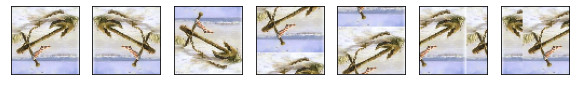

In [ ]:
def show_img(img, ax):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
 
def plot_grid(imgs, nrows, ncols, figsize=(10, 10)):
    assert len(imgs) == nrows*ncols, f"Number of images should be {nrows}x{ncols}"
    _, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        show_img(img, ax)
    plt.show()

def translate(img, shift=10, direction='right', roll=True):
    assert direction in ['right', 'left', 'down', 'up'], 'Directions should be top|up|left|right'
    img = img.copy()
    if direction == 'right':
        right_slice = img[:, -shift:].copy()
        img[:, shift:] = img[:, :-shift]
        if roll:
            img[:,:shift] = np.fliplr(right_slice)
    if direction == 'left':
        left_slice = img[:, :shift].copy()
        img[:, :-shift] = img[:, shift:]
        if roll:
            img[:, -shift:] = left_slice
    if direction == 'down':
        down_slice = img[-shift:, :].copy()
        img[shift:, :] = img[:-shift,:]
        if roll:
            img[:shift, :] = down_slice
    if direction == 'up':
        upper_slice = img[:shift, :].copy()
        img[:-shift, :] = img[shift:, :]
        if roll:
            img[-shift:,:] = upper_slice
    return img

def flip_h(img):
  img = img.copy()
  return np.fliplr(img)

def flip_v(img):
  img = img.copy()
  img = img[::-1, :, :]
  return img

caltech101_X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X.npy")
caltech101_y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y.npy")
img=caltech101_X[0].copy()
plot_grid([img,
           flip_h(img),
           flip_v(img),
           translate(img, direction='up', shift=20),
           translate(img, direction='down', shift=20), 
           translate(img, direction='left', shift=20),
           translate(img, direction='right', shift=20)],
           1, 7, figsize=(10, 5))

In [ ]:
# Build the augmented datasets  
# for the train sets of caltech101 and caltech256, each images will have 6 extra images generated, which are: horizontal/vertical flip, up/down/left/right translation

# caltech101
caltech101_X_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy")
caltech101_y_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy")

img_cate_to_aug = np.unique(caltech101_y_train).flatten().tolist()             # each category has 30 images, need to do augmentation
print("{} image categories to augument".format(len(img_cate_to_aug)), img_cate_to_aug)

aug_X, aug_y = None, None

idx_show_img = []
idx_show_img_current = 0
# randomly choose one index of caltech101_X_train for each category to show the images
for cate in img_cate_to_aug:
  # obtain the X indices for the current category
  idx_1=np.where(caltech101_y_train==cate)[0]
  idx_2=random.sample(range(0,len(idx_1)),1)  # idx_1[idx_2] is the selected index in caltech101_X_train 
  idx_show_img.append(idx_1[idx_2])

num_generated_image = 0
# each image will have augmentation
for idx in range(caltech101_X_train.shape[0]):
  # flip in horizontal, vertical, shift up, down, left, right
  img = caltech101_X_train[idx].copy()
  img1 = flip_h(img)
  img2 = flip_v(img)
  img3 = translate(img, direction='up', shift=20)
  img4 = translate(img, direction='down', shift=20)
  img5 = translate(img, direction='left', shift=20)
  img6 = translate(img, direction='right', shift=20)

  if idx == idx_show_img[idx_show_img_current]:
    print("Processing for {}/{} category: {}".format(idx_show_img.index(idx)+1,len(idx_show_img),caltech101_y_train[idx]))
    plot_grid([img,img1,img2,img3,img4,img5,img6],1,7,figsize=(10, 5))
    idx_show_img_current = idx_show_img_current+1 if idx_show_img_current != len(idx_show_img)-1 else idx_show_img_current

  if aug_X is None:
    aug_X = img1.reshape(-1,64,64,3)     
    aug_y = caltech101_y_train[idx]
  else:
    aug_X = np.vstack((aug_X, img1.reshape(-1,64,64,3)))         
    aug_y = np.vstack((aug_y, caltech101_y_train[idx]))
  aug_X = np.vstack((aug_X, img2.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech101_y_train[idx]))
  aug_X = np.vstack((aug_X, img3.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech101_y_train[idx]))
  aug_X = np.vstack((aug_X, img4.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech101_y_train[idx]))
  aug_X = np.vstack((aug_X, img5.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech101_y_train[idx]))
  aug_X = np.vstack((aug_X, img6.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech101_y_train[idx]))

  num_generated_image+=6

print("After data augmentation, {} images generated.".format(num_generated_image))
print("After data augmentation, aug_X has size:",aug_X.shape)
print("After data augmentation, aug_y has size:",aug_y.shape)
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug.npy",aug_X)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug.npy saved")
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_aug.npy",aug_y)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_aug.npy saved")

# sanity test for caltech101 augmented set
# randomly sample images to show
num_rows=1
num_cols=5
num_sample=num_rows*num_cols
classes = os.listdir("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech101/101_ObjectCategories")

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_aug.npy")

print("Caltech101 augment samples")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)


In [ ]:
# caltech256
caltech256_X_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy")
caltech256_y_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy")

img_cate_to_aug = np.unique(caltech256_y_train).flatten().tolist()             # each category has 30 images, need to do augmentation
print("{} image categories to augument".format(len(img_cate_to_aug)), img_cate_to_aug)

aug_X, aug_y = None, None

idx_show_img = []
idx_show_img_current = 0
# randomly choose one index of caltech256_X_train for each category to show the images
for cate in img_cate_to_aug:
  # obtain the X indices for the current category
  idx_1=np.where(caltech256_y_train==cate)[0]
  idx_2=random.sample(range(0,len(idx_1)),1)  # idx_1[idx_2] is the selected index in caltech256_X_train 
  idx_show_img.append(idx_1[idx_2])

num_generated_image = 0
# each image will have augmentation
for idx in range(caltech256_X_train.shape[0]):
  # flip in horizontal, vertical, shift up, down, left, right
  img = caltech256_X_train[idx].copy()
  img1 = flip_h(img)
  img2 = flip_v(img)
  img3 = translate(img, direction='up', shift=20)
  img4 = translate(img, direction='down', shift=20)
  img5 = translate(img, direction='left', shift=20)
  img6 = translate(img, direction='right', shift=20)

  if idx == idx_show_img[idx_show_img_current]:
    print("Processing for {}/{} category: {}".format(idx_show_img.index(idx)+1,len(idx_show_img),caltech256_y_train[idx]))
    plot_grid([img,img1,img2,img3,img4,img5,img6],1,7,figsize=(10, 5))
    idx_show_img_current = idx_show_img_current+1 if idx_show_img_current != len(idx_show_img)-1 else idx_show_img_current

  if aug_X is None:
    aug_X = img1.reshape(-1,64,64,3)     
    aug_y = caltech256_y_train[idx]
  else:
    aug_X = np.vstack((aug_X, img1.reshape(-1,64,64,3)))         
    aug_y = np.vstack((aug_y, caltech256_y_train[idx]))
  aug_X = np.vstack((aug_X, img2.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech256_y_train[idx]))
  aug_X = np.vstack((aug_X, img3.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech256_y_train[idx]))
  aug_X = np.vstack((aug_X, img4.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech256_y_train[idx]))
  aug_X = np.vstack((aug_X, img5.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech256_y_train[idx]))
  aug_X = np.vstack((aug_X, img6.reshape(-1,64,64,3)))
  aug_y = np.vstack((aug_y, caltech256_y_train[idx]))

  num_generated_image+=6

print("After data augmentation, {} images generated.".format(num_generated_image))
print("After data augmentation, aug_X has size:",aug_X.shape)
print("After data augmentation, aug_y has size:",aug_y.shape)
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug.npy",aug_X)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug.npy saved")
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_aug.npy",aug_y)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_aug.npy saved")

# sanity test for caltech256 augmented set
# randomly sample images to show
num_rows=1
num_cols=5
num_sample=num_rows*num_cols
classes = os.listdir("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech256/256_ObjectCategories")

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_aug.npy")

print("Caltech256 augment samples")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)


## 2.2 By Keras ImageDataGenerator

In [ ]:
# for each image in caltech101 and caltech256, generate any amount of images, in this case, generate one for each image

from keras.preprocessing.image import ImageDataGenerator

# caltech101
caltech101_X_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy")
caltech101_y_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy")

datagen = ImageDataGenerator(
        rescale=1,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
        )

augmented_X = []
augmented_y = []
num_augmented = 0
batch_size = 1
for X_batch, y_batch in datagen.flow(caltech101_X_train, caltech101_y_train, batch_size=batch_size, shuffle=False):
    augmented_X.append(X_batch)
    augmented_y.append(y_batch)
    num_augmented += batch_size
    print("Batch # {}\t{} images generated.".format(int(num_augmented/batch_size),num_augmented))
    if num_augmented == caltech101_X_train.shape[0]:
        break
augmented_X = np.concatenate(augmented_X)
augmented_y = np.concatenate(augmented_y)
augmented_X = augmented_X.astype('uint8')
print("{} images augmented.".format(num_augmented))
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug_keras.npy",augmented_X)
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_aug_keras.npy",augmented_y)

# sanity test for cifar augment set
# randomly sample images to show
num_rows=1
num_cols=5
num_sample=num_rows*num_cols

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug_keras.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_aug_keras.npy")

print("Caltech101 augmentation samples")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  classes = os.listdir("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech101/101_ObjectCategories")
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)

In [ ]:
# caltech256
caltech256_X_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy")
caltech256_y_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy")

datagen = ImageDataGenerator(
        rescale=1,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
        )

augmented_X = []
augmented_y = []
num_augmented = 0
batch_size = 1
for X_batch, y_batch in datagen.flow(caltech256_X_train, caltech256_y_train, batch_size=batch_size, shuffle=False):
    augmented_X.append(X_batch)
    augmented_y.append(y_batch)
    num_augmented += batch_size
    print("Batch # {}\t{} images generated.".format(int(num_augmented/batch_size),num_augmented))
    if num_augmented == caltech256_X_train.shape[0]:
        break
augmented_X = np.concatenate(augmented_X)
augmented_y = np.concatenate(augmented_y)
augmented_X = augmented_X.astype('uint8')
print("{} images augmented.".format(num_augmented))
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug_keras.npy",augmented_X)
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_aug_keras.npy",augmented_y)

# sanity test for cifar augment set
# randomly sample images to show
num_rows=1
num_cols=5
num_sample=num_rows*num_cols

X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug_keras.npy")
y = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_aug_keras.npy")

print("Caltech256 augmentation samples")
for i in range(10):
  idx_sample = random.sample(range(0,X.shape[0]),num_sample)
  X_sample = X[idx_sample,:,:,:]
  y_sample = y[idx_sample]
  classes = os.listdir("/content/drive/MyDrive/Deep Learning_Project/tmp/caltech256/256_ObjectCategories")
  plot_img_array(X_sample, y_sample, classes, num_rows=num_rows, num_cols=num_cols, fig_w=10, fig_h=10, axis_off=False)

# 3.Feature Extraction

## 3.1 Feature Extraction by VGG16 to build datasets for NN
Note: This part uses VGG16 to extract FC layer feature with (1,4096) size. Also, DenseNet121 is used with self-defined FC layers to extract feature with (1,1024) size. 3 groups of feature sets are formed: vgg16, dense121, vgg16_dense121, for 3 datasets respectively: cifar10, caltech101, caltech256.

### 3.1.1 Build model for feature extraction

In [ ]:
# method to get the model for feature extraction
def get_model_feature_extraction():
  # resize the images before input to the model
  inputs = Input(shape=(64,64,3))
  x_vgg16 = Resizing(224,224,interpolation="bilinear")(inputs)
  print("For vgg16, inputs shape ",inputs.shape," is resized to",x_vgg16.shape)
  # x_dense121 = inputs
  # print("For dense121, inputs shape",inputs.shape," does not change.")

  # use the pretrained models
  base_model_vgg16 = VGG16(
    include_top = True,
    weights = "imagenet",
    input_shape = None,
    input_tensor = x_vgg16,
  )
  # base_model_dense121 = DenseNet121(
  #   include_top = False,
  #   weights = "imagenet",
  #   input_shape = None,
  #   input_tensor = x_dense121,
  # )

  x_vgg16 = base_model_vgg16.get_layer('fc2').output        # 4096,
  print("The output of the FC2 layer with size: ", x_vgg16.shape, " is taken as the extracted feature.")

  # x_dense121 = base_model_dense121.output
  # x_dense121 = GlobalAveragePooling2D()(x_dense121)
  # x_dense121 = Dense(1024, activation='relu')(x_dense121)   # 1024    
  # print("The output of DenseNet121 with size: ", x_dense121.shape, " is taken as the extracted feature.")

  # concatenate extracted features
  # output = tf.concat([x_vgg16,x_dense121],1)
  # print("The combined feature has size: ", output.shape)

  output = x_vgg16
  model = Model(inputs = inputs, outputs = output, name="model_feature_extraction")
  
  # model.summary()

  # plot_model(model, to_file='model_feature_extraction_plot.png', show_shapes=True, show_layer_names=True)

  return model


In [ ]:
10/3-int(10/3)

0.3333333333333335

### 3.1.2 Method to extract feature

In [ ]:
# method to extract feature
def extract_feature(dataset,model,batch_size_1,_batch_size_2):
  num_subset = int(dataset.shape[0]/batch_size_1) if dataset.shape[0]/batch_size_1-int(dataset.shape[0]/batch_size_1)==0 else int(dataset.shape[0]/batch_size_1)+1
  print("{} subsets to extract.".format(num_subset))
  print("-"*80)
  for i in range(num_subset):
    subset = dataset[i*batch_size_1:(i+1)*batch_size_1] if (i+1)*batch_size_1<dataset.shape[0] else dataset[i*batch_size_1:dataset.shape[0]]
    print("subset {} has a size {}. {} batches to extract.".format(i+1, subset.shape,int(subset.shape[0]/batch_size_2)+1))
    if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/subset_"+str(i)+"_extracted.npy"):
      print("subset {} extracted before this run.".format(i+1))
    else:
      print("Extracting for subset {}".format(i+1))
      print("-"*50)
      idx_img = 0
      idx_batch = 0
      while True:
        if idx_batch % 100 == 0 or idx_batch==int(subset.shape[0]/batch_size_2):
          print("%3d"%(idx_batch+1), end="")
        elif (idx_batch+1) % 100 == 0:
          print("%3d / %3d"%(idx_batch+1,int(subset.shape[0]/batch_size_2)+1))
        else:
          print(".",end="")

        # decide whether it comes to the last batch that has less than batch_size samples
        if idx_img == 0:    # the first batch of extracted features in the subset
          feature_extracted = model.predict(dataset[idx_img:idx_img+batch_size_2].reshape(-1,64,64,3))
          # pass
        elif (idx_img+batch_size_2) > subset.shape[0]:
          feature_extracted = np.vstack((feature_extracted,model.predict(dataset[idx_img:subset.shape[0]].reshape(-1,64,64,3))))
          # pass
          break
        else:
          feature_extracted = np.vstack((feature_extracted,model.predict(dataset[idx_img:idx_img+batch_size_2].reshape(-1,64,64,3))))
          # pass
        
        idx_img += batch_size_2
        idx_batch += 1

      # save the extracted feature for this subset
      np.save("/content/drive/MyDrive/Deep Learning_Project/subset_"+str(i)+"_extracted.npy",feature_extracted)
      print("\nsubset {} extracted.".format(i+1),end="")
      print("The extracted feature set has size:",feature_extracted.shape)
  
  for i in range(num_subset):
    if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/subset_"+str(i)+"_extracted.npy")==False:
      print("subset {} not extracted.".format(i+1))
      return None

  for i in range(num_subset):
    data_path = "/content/drive/MyDrive/Deep Learning_Project/subset_"+str(i)+"_extracted.npy"
    feature_extracted = np.load(data_path) if i== 0 else np.vstack((feature_extracted,np.load(data_path)))
    print("Extracted feature of subset {} combined".format(i+1))
    os.remove(data_path)

  return feature_extracted



### 3.1.3 Build feature sets (original and augmented images)  
Note: for Cifar10, Caltech101, Caltech256 train and test sets respectively

In [ ]:
# generate the model to extract feature
model_feature_extraction = get_model_feature_extraction()

# extract features from the train and test feature sets by a specified batchsize, or the RAM will crash
batch_size_1 = 10000      # to avoid RAM crash, slice the original dataset into several subsets and extract one by one
batch_size_2 = 64         # for each subset, the number of images to extract at the same time in one prediction

# cifar10
# load the originally saved train feature sets
X = np.load("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train.npy")
X = X.astype(np.float32) / 255
print("\nExtracting feature for cifar10 train set. Train set has a size:{}".format(X.shape))
print("-"*100)
X = extract_feature(X, model_feature_extraction, batch_size_1, batch_size_2)
print("The extracted feature for cifar10 train set has a size:{}".format(X.shape))
np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train_extracted.npy",X)
print("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train_extracted.npy saved.")

# load the originally saved test feature sets
X = np.load("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy")
X = X.astype(np.float32) / 255
print("\nExtracting feature for cifar10 test set. Test set has a size:{}".format(X.shape))
print("-"*100)
X = extract_feature(X, model_feature_extraction, batch_size_1, batch_size_2)
print("The extracted feature for cifar10 test set has a size:{}".format(X.shape))
np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test_extracted.npy",X)
print("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test_extracted.npy saved.")

# caltech101
# load the originally saved train feature sets
X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy")
X = X.astype(np.float32) / 255
print("\nExtracting feature for caltech101 train set. Train set has a size:{}".format(X.shape))
print("-"*100)
X = extract_feature(X, model_feature_extraction, batch_size_1, batch_size_2)
print("The extracted feature for caltech101 train set has a size:{}".format(X.shape))
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train_extracted.npy",X)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train_extracted.npy saved.")

# load the originally saved test feature sets
X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy")
X = X.astype(np.float32) / 255
print("\nExtracting feature for caltech101 test set. Test set has a size:{}".format(X.shape))
print("-"*100)
X = extract_feature(X, model_feature_extraction, batch_size_1, batch_size_2)
print("The extracted feature for caltech101 test set has a size:{}".format(X.shape))
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test_extracted.npy",X)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test_extracted.npy saved.")

# load the originally saved augment feature sets
X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug.npy")
X = X.astype(np.float32) / 255
print("\nExtracting feature for caltech101 test set. Test set has a size:{}".format(X.shape))
print("-"*100)
X = extract_feature(X, model_feature_extraction, batch_size_1, batch_size_2)
print("The extracted feature for caltech101 test set has a size:{}".format(X.shape))
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug_extracted.npy",X)
print("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug_extracted.npy saved.")

# caltech256
# load the originally saved train feature sets
X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy")
X = X.astype(np.float32) / 255
print("\nExtracting feature for caltech256 train set. Train set has a size:{}".format(X.shape))
print("-"*100)
X = extract_feature(X, model_feature_extraction, batch_size_1, batch_size_2)
print("The extracted feature for caltech256 train set has a size:{}".format(X.shape))
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train_extracted.npy",X)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train_extracted.npy saved.")

# load the originally saved test feature sets
X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy")
X = X.astype(np.float32) / 255
print("\nExtracting feature for caltech256 test set. Test set has a size:{}".format(X.shape))
print("-"*100)
X = extract_feature(X, model_feature_extraction, batch_size_1, batch_size_2)
print("The extracted feature for caltech256 test set has a size:{}".format(X.shape))
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test_extracted.npy",X)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test_extracted.npy saved.")

# load the originally saved augment feature sets
X = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug.npy")
X = X.astype(np.float32) / 255
print("\nExtracting feature for caltech256 test set. Test set has a size:{}".format(X.shape))
print("-"*100)
X = extract_feature(X, model_feature_extraction, batch_size_1, batch_size_2)
print("The extracted feature for caltech256 test set has a size:{}".format(X.shape))
np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug_extracted.npy",X)
print("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug_extracted.npy saved.")


For vgg16, inputs shape  (None, 64, 64, 3)  is resized to (None, 224, 224, 3)
The output of the FC2 layer with size:  (None, 4096)  is taken as the extracted feature.

Extracting feature for cifar10 train set. Train set has a size:(50000, 64, 64, 3)
----------------------------------------------------------------------------------------------------
5 subsets to extract.
--------------------------------------------------------------------------------
subset 1 has a size (10000, 64, 64, 3). 157 batches to extract.
Extracting for subset 1
--------------------------------------------------
  1..................................................................................................100 / 157
101.......................................................157
subset 1 extracted.The extracted feature set has size: (10000, 4096)
subset 2 has a size (10000, 64, 64, 3). 157 batches to extract.
Extracting for subset 2
--------------------------------------------------
  1.......................

## 3.2 Feature Extraction by Autoencoder to build datasets for NN

### 3.2.1 Build model for autoencoder

In [ ]:
def get_model_encoder(x_train,target_dim=100,num_epochs=200):
  # dimension to keep
  encoding_dim = target_dim
  
  input_img = Input(shape=(np.prod(x_train.shape[1:]),))
  
  # encoder layers
  en = Dense(128, activation='relu')(input_img)
  en = Dense(64, activation='relu')(en)
  en = Dense(10, activation='relu')(en)
  en_output = Dense(encoding_dim)(en)
  
  # decoder layers
  de = Dense(10, activation='relu')(en_output)
  de = Dense(64, activation='relu')(de)
  de = Dense(128, activation='relu')(de)
  de_output = Dense(np.prod(x_train.shape[1:]), activation='sigmoid')(de)

  # autoencoder
  autoencoder = Model(inputs=input_img, outputs=de_output)

  # encoder 
  encoder = Model(inputs=input_img, outputs=en_output)
  
  # compile autoencoder
  autoencoder.compile(optimizer='adam', loss='mse')
  
  # training
  autoencoder.fit(x_train, x_train, epochs=num_epochs, batch_size=1024, shuffle=True, validation_data=(x_test,x_test))

  return encoder

### 3.2.2 Build feature sets (orignal and augmented images)

In [ ]:
# cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print("x_train has size:",x_train.shape)
print("y_train has size:",y_train.shape)
print("x_test has size:",x_test.shape)
print("y_test has size:",y_test.shape)

if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train_encoded.npy") and \
   os.path.exists("/content/drive/MyDrive/Deep Learning_Project/cifar10_encoder.h5") :
  print("Feature encoded for cifar10.")
else:
  if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/cifar10_encoder.h5"):
    model_encoder = load_model("/content/drive/MyDrive/Deep Learning_Project/cifar10_encoder.h5")
  else:
    model_encoder = get_model_encoder(x_train,target_dim=200,num_epochs=500)
    model_encoder.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_encoder.h5")

  X_train = model_encoder.predict(x_train)
  X_test = model_encoder.predict(x_test)
  np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train_encoded.npy",X_train)
  np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train_encoded.npy",y_train)
  np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test_encoded.npy",X_test)
  np.save("/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test_encoded.npy",y_test)
  print("Feature encoded for cifar10.")

x_train has size: (50000, 3072)
y_train has size: (50000, 1)
x_test has size: (10000, 3072)
y_test has size: (10000, 1)
Epoch 1/500
49/49 [==============================] - 2s 23ms/step - loss: 0.0624 - val_loss: 0.0557
Epoch 2/500
49/49 [==============================] - 1s 20ms/step - loss: 0.0543 - val_loss: 0.0426
Epoch 3/500
49/49 [==============================] - 1s 20ms/step - loss: 0.0416 - val_loss: 0.0378
Epoch 4/500
49/49 [==============================] - 1s 20ms/step - loss: 0.0366 - val_loss: 0.0337
Epoch 5/500
49/49 [==============================] - 1s 20ms/step - loss: 0.0332 - val_loss: 0.0328
Epoch 6/500
49/49 [==============================] - 1s 20ms/step - loss: 0.0328 - val_loss: 0.0325
Epoch 7/500
49/49 [==============================] - 1s 20ms/step - loss: 0.0324 - val_loss: 0.0320
Epoch 8/500
49/49 [==============================] - 1s 20ms/step - loss: 0.0320 - val_loss: 0.0306
Epoch 9/500
49/49 [==============================] - 1s 20ms/step - loss: 0.0307

In [ ]:
# caltech101
x_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy")
y_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy")
x_test = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy")
y_test = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy")
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print("x_train has size:",x_train.shape)
print("y_train has size:",y_train.shape)
print("x_test has size:",x_test.shape)
print("y_test has size:",y_test.shape)

if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train_encoded.npy") and \
   os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech101_encoder.h5") :
  print("Feature encoded for caltech101.")
else:
  if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech101_encoder.h5"):
    model_encoder = load_model("/content/drive/MyDrive/Deep Learning_Project/caltech101_encoder.h5")
  else:
    model_encoder = get_model_encoder(x_train,target_dim=200,num_epochs=500)
    model_encoder.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_encoder.h5")

  X_train = model_encoder.predict(x_train)
  X_test = model_encoder.predict(x_test)
  np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train_encoded.npy",X_train)
  np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train_encoded.npy",y_train)
  np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test_encoded.npy",X_test)
  np.save("/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test_encoded.npy",y_test)
  print("Feature encoded for caltech101.")

x_train has size: (3060, 12288)
y_train has size: (3060, 1)
x_test has size: (6085, 12288)
y_test has size: (6085, 1)
Epoch 1/500
3/3 [==============================] - 1s 288ms/step - loss: 0.1077 - val_loss: 0.1023
Epoch 2/500
3/3 [==============================] - 0s 225ms/step - loss: 0.1069 - val_loss: 0.0998
Epoch 3/500
3/3 [==============================] - 1s 229ms/step - loss: 0.1048 - val_loss: 0.0924
Epoch 4/500
3/3 [==============================] - 1s 225ms/step - loss: 0.0969 - val_loss: 0.0881
Epoch 5/500
3/3 [==============================] - 1s 225ms/step - loss: 0.0946 - val_loss: 0.0853
Epoch 6/500
3/3 [==============================] - 1s 224ms/step - loss: 0.0918 - val_loss: 0.0847
Epoch 7/500
3/3 [==============================] - 0s 211ms/step - loss: 0.0915 - val_loss: 0.0830
Epoch 8/500
3/3 [==============================] - 1s 224ms/step - loss: 0.0900 - val_loss: 0.0828
Epoch 9/500
3/3 [==============================] - 1s 240ms/step - loss: 0.0908 - val_loss

In [ ]:
# caltech256
x_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy")
y_train = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy")
x_test = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy")
y_test = np.load("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy")
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print("x_train has size:",x_train.shape)
print("y_train has size:",y_train.shape)
print("x_test has size:",x_test.shape)
print("y_test has size:",y_test.shape)

if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train_encoded.npy") and \
   os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech256_encoder.h5") :
  print("Feature encoded for caltech256.")
else:
  if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/caltech256_encoder.h5"):
    model_encoder = load_model("/content/drive/MyDrive/Deep Learning_Project/caltech256_encoder.h5")
  else:
    model_encoder = get_model_encoder(x_train,target_dim=200,num_epochs=500)
    model_encoder.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_encoder.h5")

  X_train = model_encoder.predict(x_train)
  X_test = model_encoder.predict(x_test)
  np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train_encoded.npy",X_train)
  np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train_encoded.npy",y_train)
  np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test_encoded.npy",X_test)
  np.save("/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test_encoded.npy",y_test)
  print("Feature encoded for caltech256.")

x_train has size: (7710, 12288)
y_train has size: (7710, 1)
x_test has size: (22897, 12288)
y_test has size: (22897, 1)
Epoch 1/500
8/8 [==============================] - 2s 236ms/step - loss: 0.1069 - val_loss: 0.0979
Epoch 2/500
8/8 [==============================] - 2s 209ms/step - loss: 0.0946 - val_loss: 0.0876
Epoch 3/500
8/8 [==============================] - 2s 211ms/step - loss: 0.0880 - val_loss: 0.0869
Epoch 4/500
8/8 [==============================] - 2s 210ms/step - loss: 0.0873 - val_loss: 0.0860
Epoch 5/500
8/8 [==============================] - 2s 208ms/step - loss: 0.0863 - val_loss: 0.0855
Epoch 6/500
8/8 [==============================] - 2s 208ms/step - loss: 0.0857 - val_loss: 0.0848
Epoch 7/500
8/8 [==============================] - 2s 207ms/step - loss: 0.0853 - val_loss: 0.0840
Epoch 8/500
8/8 [==============================] - 1s 207ms/step - loss: 0.0843 - val_loss: 0.0830
Epoch 9/500
8/8 [==============================] - 2s 211ms/step - loss: 0.0832 - val_lo

# 4.Training and Testing

## 4.1 Transfer learning - DenseNet121

In [8]:
# method to create the model for transfer learning
def get_model_transfer_learning_dense121(input_shape,num_category,resize=False):
  # resize the images before input to the model
  # inputs = Input(shape=(64,64,3))
  inputs = Input(shape=input_shape)
  if resize==True:
    # x = Resizing(128,128,interpolation="bilinear")(inputs)
    x = Resizing(input_shape[0]*2,input_shape[1]*2,interpolation="bilinear")(inputs)
  else:
    x = inputs
  # use the pretrained model layers except for the softmax layer
  base_model = DenseNet121(
      include_top = False,
      weights = "imagenet",
      input_shape = None,
      input_tensor = x,
  )

  # add 1 FC layer and 1 softmax layer
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  predictions = Dense(num_category, activation = 'softmax')(x)
  model_transfer_learning_dense121 = Model(inputs = inputs, outputs = predictions, name="model_transfer_learning_dense121")

  # model_transfer_learning_dense121.summary()

  return model_transfer_learning_dense121

# load the saved datasets
def prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path, batch_size=256,shuffle_by_row=True):
  X_train = np.load(X_train_path[0]) if len(X_train_path) == 1 else np.vstack((np.load(X_train_path[0]),np.load(X_train_path[1])))
  y_train = np.load(y_train_path[0]) if len(y_train_path) == 1 else np.vstack((np.load(y_train_path[0]),np.load(y_train_path[1])))
  X_test = np.load(X_test_path[0]) if len(X_test_path) == 1 else np.vstack((np.load(X_test_path[0]),np.load(X_test_path[1])))  
  y_test = np.load(y_test_path[0]) if len(y_test_path) == 1 else np.vstack((np.load(y_test_path[0]),np.load(y_test_path[1])))
  print("X_train has a size:",X_train.shape)
  print("y_train has a size:",y_train.shape)
  print("X_test has a size:",X_test.shape)
  print("y_test has a size:",y_test.shape)

  # X_train = np.load(X_train_path)
  # y_train = np.load(y_train_path)
  # X_test = np.load(X_test_path)
  # y_test = np.load(y_test_path)

  # shuffle the train dataset
  if shuffle_by_row == True:
    X_train, y_train = shuffle_by_row(X_train, y_train)
  else:
    np.random.seed(1234)
    np.random.shuffle(X_train)
    np.random.seed(1234)
    np.random.shuffle(y_train)

  # normalize the datasets
  X_train = X_train.astype(np.float32) / 255
  y_train = y_train.astype(np.float32)
  X_test = X_test.astype(np.float32) /255
  y_test = y_test.astype(np.float32)

  # Prepare the training dataset.
  train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
  train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

  return train_dataset, X_train, y_train, X_test, y_test

# method to shuffle X and y 
def shuffle_by_row(X,y):
  import random
  row_num = [i for i in range(X.shape[0])]

  X_ = np.zeros_like(X)
  y_ = np.zeros_like(y)

  print("Shuffling dataset: ",end="")

  r_n = 0
  while len(row_num)>0:
    r_idx = random.randint(0, len(row_num)-1)
    X_[r_n] = X[row_num[r_idx]]
    y_[r_n] = y[row_num[r_idx]]
    row_num.remove(row_num[r_idx])
    if r_n % 10000 == 0:
      if r_n == 0:
        print("  %d"%(r_n), end="")
      else:
        print(" > %d"%(r_n), end="")
    r_n += 1
  print(" > %d\tDone!"%(r_n))
  return X_, y_

# plot loss and accuracies
def plot_loss_acc(acc_tr,acc_te,loss,fig_w,fig_h):
  ep = [i for i in range(1,len(acc_tr)+1,1)]
  
  fig, ax1 = plt.subplots(figsize=(fig_w, fig_h))
  ax1.plot(ep, loss, color='tab:red')
  ax1.set_title('Loss and Accuracy')
  ax1.set_xticks(ep)
  ax1.set_xlabel('epoch')
  ax1.set_ylabel('loss')
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
  ax2.plot(ep, acc_tr)
  ax2.plot(ep, acc_te)
  ax2.set_ylabel('accuracy')  # we already handled the x-label with ax1
  ax2.legend(['training', 'testing'], loc='upper right')
  ax2.tick_params(axis='y')

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

# train the model and save loss and accuracies
def train_and_test_transfer_learning(model, train_dataset, x_train, y_train, X_test, y_test, dataset_type="cifar10", sn_run="run1", lr=1e-3, acc_target=0.9, num_epoch=1000, best_model_path=None):
  loss = []
  acc_tr = []
  acc_te = []
  acc_tr_best = 0
  acc_te_best = 0

  # lr = 1e-3     # initial learning rate
  num_cnt = 0   # counter to update learning rate

  # if the previous model is saved, load it
  if best_model_path==None and os.path.exists("/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_"+dataset_type+"_"+sn_run[0:-1]+str(int(sn_run[-1])-1)+".h5"):
    model = load_model("/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_"+dataset_type+"_"+sn_run[0:-1]+str(int(sn_run[-1])-1)+".h5")
    print("/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_"+dataset_type+"_"+sn_run[0:-1]+str(int(sn_run[-1])-1)+".h5 loaded. Continue training.")

  if best_model_path is not None:
    model = load_model(best_model_path)
    print(best_model_path + " loaded. Continue training.")

  time_st = time.time()

  # Instantiate an optimizer.
  optimizer = keras.optimizers.Adam(learning_rate=lr)

  # Instantiate a loss function.
  loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

  for epoch in range(num_epoch):
      epoch_loss = 0
      print("Epoch # {:4d} / {:4d} ".format(epoch+1,num_epoch),end="")
      
      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

          # Open a GradientTape to record the operations run during the forward pass, which enables auto-differentiation.
          with tf.GradientTape(persistent=True) as tape:

              # Run the forward pass of the layer. The operations that the layer applies to its inputs are going to be recorded on the GradientTape.
              logits = model(x_batch_train, training=True)  # Logits for this minibatch

              # Compute the loss value for this minibatch.
              loss_value = loss_fn(y_batch_train, logits)
          
          # update epoch loss
          epoch_loss += loss_value
          
          # Use the gradient tape to automatically retrieve the gradients of the trainable variables with respect to the loss.
          grads = tape.gradient(loss_value, model.trainable_weights)

          # update weights
          optimizer.apply_gradients(zip(grads, model.trainable_weights))

      loss.append(epoch_loss)

      # output the current training, validation, testing accuracies
      y_pred = model.predict(x_train)
      y_pred_classes = [np.argmax(y_p) for y_p in y_pred]
      train_accuracy = accuracy_score(y_train, y_pred_classes)
      acc_tr.append(train_accuracy)
      
      y_pred = model.predict(X_test)
      y_pred_classes = [np.argmax(y_p) for y_p in y_pred]
      test_accuracy = accuracy_score(y_test, y_pred_classes)
      acc_te.append(test_accuracy)
      
       # temporarily store the log content
      print(" Batch loss: " + str(loss_value.numpy()) + \
            " Epoch loss: " + str(epoch_loss.numpy()) + \
            " Training Accuracy: " + str(train_accuracy) + \
            " Testing Accuracy: " + str(test_accuracy), end="")

      # save the trained model at best testing accuracy
      if acc_te_best < test_accuracy:
        model.save("/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_"+dataset_type+"_"+sn_run+".h5")
        print(" Model Saved!", end="")          
        acc_te_best = test_accuracy
        acc_tr_best = train_accuracy
      print()     
      
      # stop the training if test_accuracy is better than 85%
      if test_accuracy >= acc_target:
        break
      
      if epoch == 0:
        pre_loss = epoch_loss

      if epoch_loss < 0.3*pre_loss:  # if the loss value becomes 0.3 times of the previous recorded value
        print("Learning Rate decreases from " + str(lr),end="")
        lr *= 0.5 
        pre_loss = epoch_loss
        num_cnt = 0
        print(" to " + str(lr))
      
      if epoch_loss > 1.5*pre_loss:  # if the loss value is larger than 0.5 times of 'pre_loss' for 3 epochs
        if num_cnt == 10:
          print("Learning Rate increases from " + str(lr),end="")
          lr *= 2
          pre_loss = epoch_loss
          num_cnt = 0
          print(" to " + str(lr))
        else:
          num_cnt += 1
      
      # try to fix the learning rate when the testing accuracy comes close to the target
      if lr < 1e-9:
        lr = 1e-9
        print("Learning Rate adjusted to " + str(lr))
      if epoch_loss < 0.5 and train_accuracy > 0.99 and test_accuracy > 0.95:
        lr = 1e-9
        # print("Learning Rate fixed to %0.9f when very close to the target"%(lr))
        print("Learning Rate fixed to " + str(lr) + " when very close to the target") 
      
  print("Training time:%f seconds\n"%(time.time()-time_st))

  # plot the loss and accuracies during training
  plot_loss_acc(acc_tr,acc_te,loss,20,10)
  
  return acc_tr_best, acc_te_best

### 4.1.1 Cifar10 - original train set

#### 4.1.1.1 1st time - 3 runs target accuracy: 90%

Run 1
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
29089792/29084464 [==============================] - 0s 0us/step
Epoch #    1 / 1000  Batch loss: 0.31749514 Epoch loss: 55.880524 Training Accuracy: 0.63434 Testing Accuracy: 0.6125
Epoch #    2 / 1000  Batch loss: 0.16464792 Epoch loss: 21.321177 Training Accuracy: 0.76624 Testing Accuracy: 0.7238 Model Saved!
Epoch #    3 / 1000  Batch loss: 0.17291868 Epoch loss: 14.79698 Training Accuracy: 0.84162 Testing Accuracy: 0.7862 Model Saved!
Learning Rate decreases from 0.001 to 0.0002
Epoch #    4 / 1000  Batch loss: 0.16245162 Epoch loss: 12.427408 Training Accuracy: 0.87508 Testing Accuracy: 0.815 Model Saved!
Epoch #    5 / 1000  Batch loss: 0.04331335 Epoch loss: 9.652521 Training Accuracy: 0.85884 Testing Accuracy: 0.7955
Epoch #    6 / 1000  Batch loss: 0.08601894 Epoch loss: 7.823786 Training Accuracy: 0.90238 Testing Accuracy

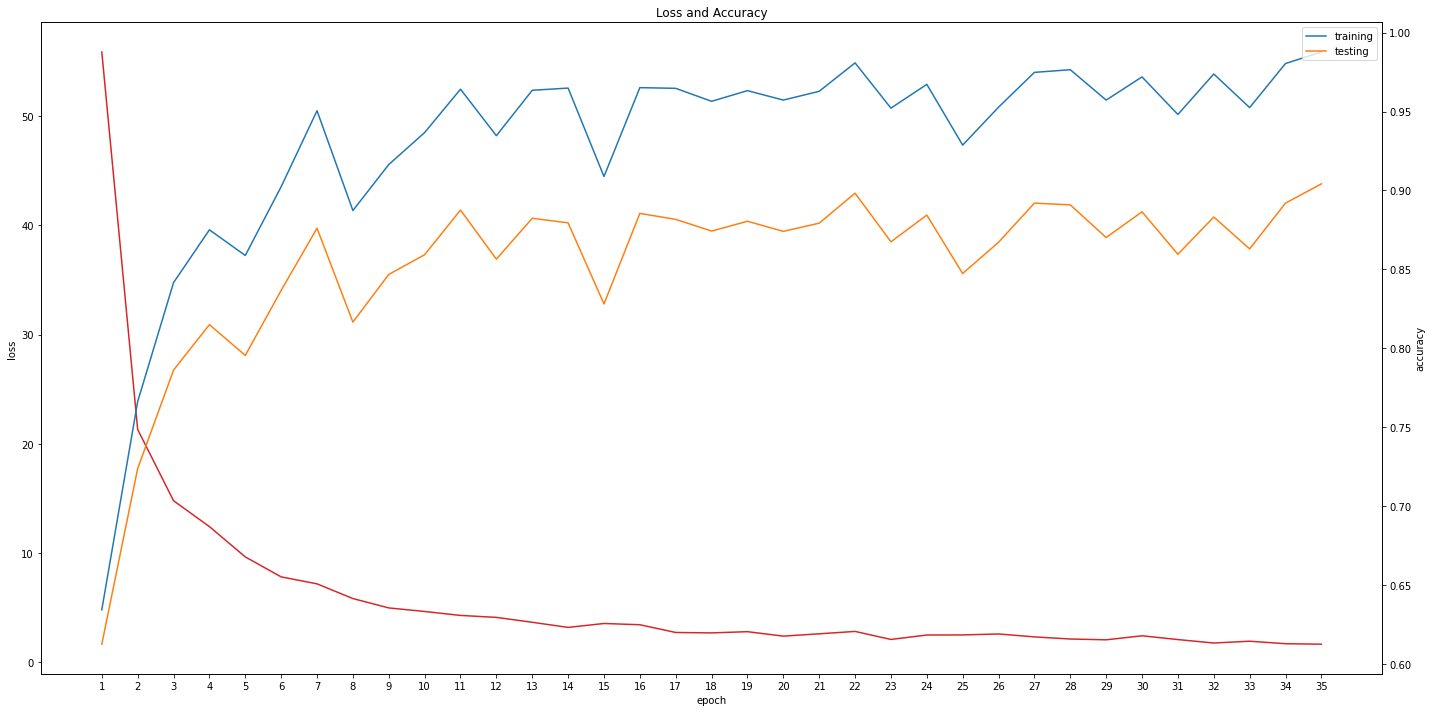

Run 2
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
Epoch #    1 / 1000  Batch loss: 0.3179968 Epoch loss: 56.05699 Training Accuracy: 0.68018 Testing Accuracy: 0.6664
Epoch #    2 / 1000  Batch loss: 0.19679849 Epoch loss: 21.953314 Training Accuracy: 0.78744 Testing Accuracy: 0.7488 Model Saved!
Epoch #    3 / 1000  Batch loss: 0.18358657 Epoch loss: 14.85207 Training Accuracy: 0.76342 Testing Accuracy: 0.7295
Learning Rate decreases from 0.001 to 0.0002
Epoch #    4 / 1000  Batch loss: 0.2323918 Epoch loss: 12.074377 Training Accuracy: 0.8477 Testing Accuracy: 0.7882 Model Saved!
Epoch #    5 / 1000  Batch loss: 0.06850949 Epoch loss: 9.953865 Training Accuracy: 0.76942 Testing Accuracy: 0.7207
Epoch #    6 / 1000  Batch loss: 0.061536975 Epoch loss: 7.681604 Training Accuracy: 0.92986 Testing Accuracy: 0.8518 Model Saved!
Epoch #    7 / 1000  Batch loss: 0.07466064 Epoch loss: 6.

Run 3
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
Epoch #    1 / 1000  Batch loss: 0.3326067 Epoch loss: 55.456112 Training Accuracy: 0.59736 Testing Accuracy: 0.5776
Epoch #    2 / 1000  Batch loss: 0.15189987 Epoch loss: 21.73857 Training Accuracy: 0.76136 Testing Accuracy: 0.7235 Model Saved!
Epoch #    3 / 1000  Batch loss: 0.08836013 Epoch loss: 14.385101 Training Accuracy: 0.78334 Testing Accuracy: 0.7333 Model Saved!
Learning Rate decreases from 0.001 to 0.0002
Epoch #    4 / 1000  Batch loss: 0.15035161 Epoch loss: 12.453748 Training Accuracy: 0.90804 Testing Accuracy: 0.8454 Model Saved!
Epoch #    5 / 1000  Batch loss: 0.07613188 Epoch loss: 9.12191 Training Accuracy: 0.91886 Testing Accuracy: 0.8538 Model Saved!
Epoch #    6 / 1000  Batch loss: 0.060864873 Epoch loss: 8.175778 Training Accuracy: 0.92746 Testing Accuracy: 0.8571 Model Saved!
Epoch #    7 / 1000  Batch los

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.9868533333333334
Average Testing  Accuracy: 0.9023333333333333


In [ ]:
X_train_path = "/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train.npy"
y_train_path = "/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train.npy"
X_test_path = "/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy"
y_test_path = "/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test.npy"

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_cifar10_run1 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_cifar10_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=1000)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_cifar10_run2 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_cifar10_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=1000)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_cifar10_run3 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_cifar10_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=1000)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

#### 4.1.1.2 2nd time - 3 runs with continued training target accuracy: 93%

Run 1
--------------------------------------------------------------------------------
X_train has a size: (50000, 64, 64, 3)
y_train has a size: (50000, 1)
X_test has a size: (10000, 64, 64, 3)
y_test has a size: (10000, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run1_1.h5 loaded. Continue training.
Epoch #    1 /  100  Batch loss: 0.0023697023 Epoch loss: 1.1245552 Training Accuracy: 0.99854 Testing Accuracy: 0.9214
Epoch #    2 /  100  Batch loss: 0.0023881204 Epoch loss: 0.48668203 Training Accuracy: 0.99966 Testing Accuracy: 0.9237 Model Saved!
Learning Rate fixed to 1e-08 when very close to the target
Epoch #    3 /  100  Batch loss: 0.0019000795 Epoch loss: 0.25908145 Training Accuracy: 0.99988 Testing Accuracy: 0.9244 Model Saved!
Learning Rate decreases from 1e-08 to 5e-09
Learning Rate adjusted to 1e-07
Learning Rate fixed to 1e-08 when very close to the target
E

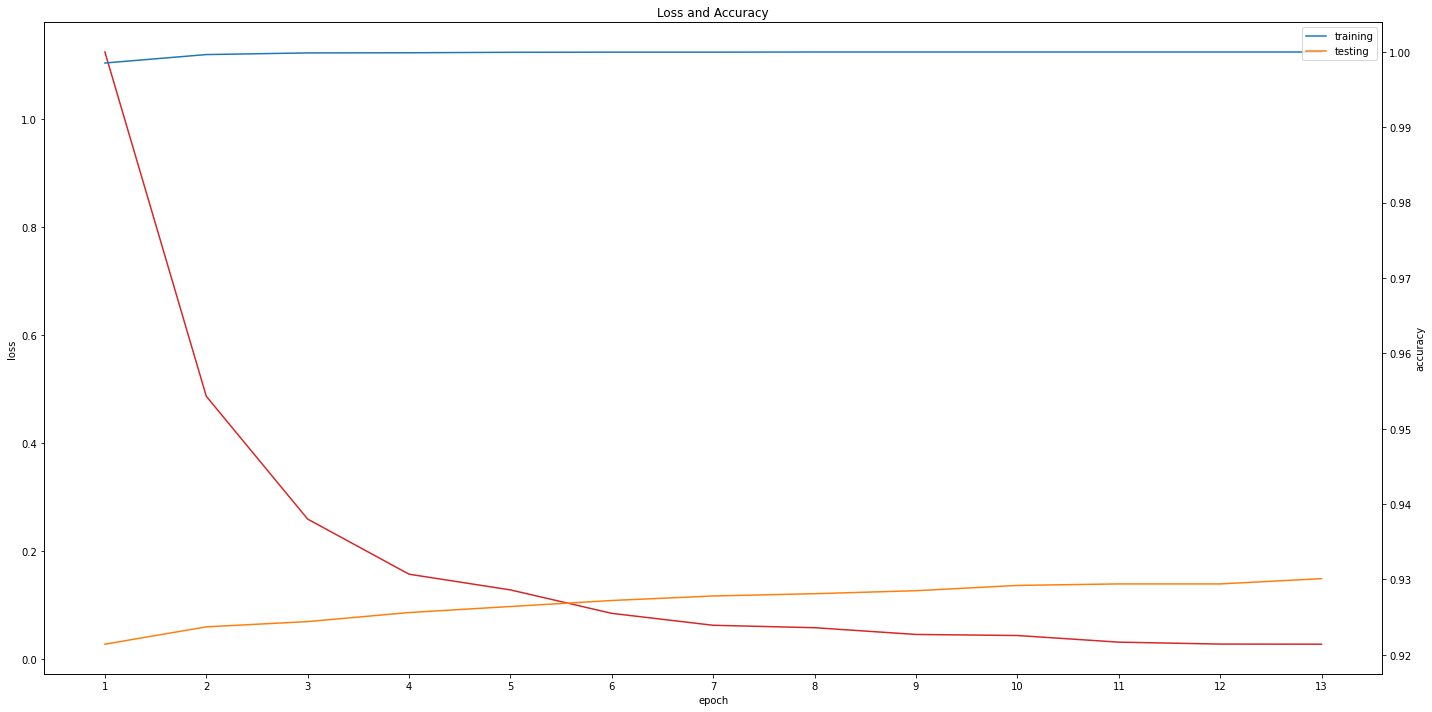

Run 2
--------------------------------------------------------------------------------
X_train has a size: (50000, 64, 64, 3)
y_train has a size: (50000, 1)
X_test has a size: (10000, 64, 64, 3)
y_test has a size: (10000, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run2_1.h5 loaded. Continue training.
Epoch #    1 /  100  Batch loss: 0.004207783 Epoch loss: 1.2768116 Training Accuracy: 0.99778 Testing Accuracy: 0.9204
Epoch #    2 /  100  Batch loss: 0.0022342843 Epoch loss: 0.5404482 Training Accuracy: 0.99958 Testing Accuracy: 0.9241 Model Saved!
Epoch #    3 /  100  Batch loss: 0.008024653 Epoch loss: 0.28533766 Training Accuracy: 0.99986 Testing Accuracy: 0.9262 Model Saved!
Learning Rate decreases from 1e-05 to 5e-06
Learning Rate fixed to 1e-08 when very close to the target
Epoch #    4 /  100  Batch loss: 0.0006639254 Epoch loss: 0.20019871 Training Accuracy: 1.0 Tes

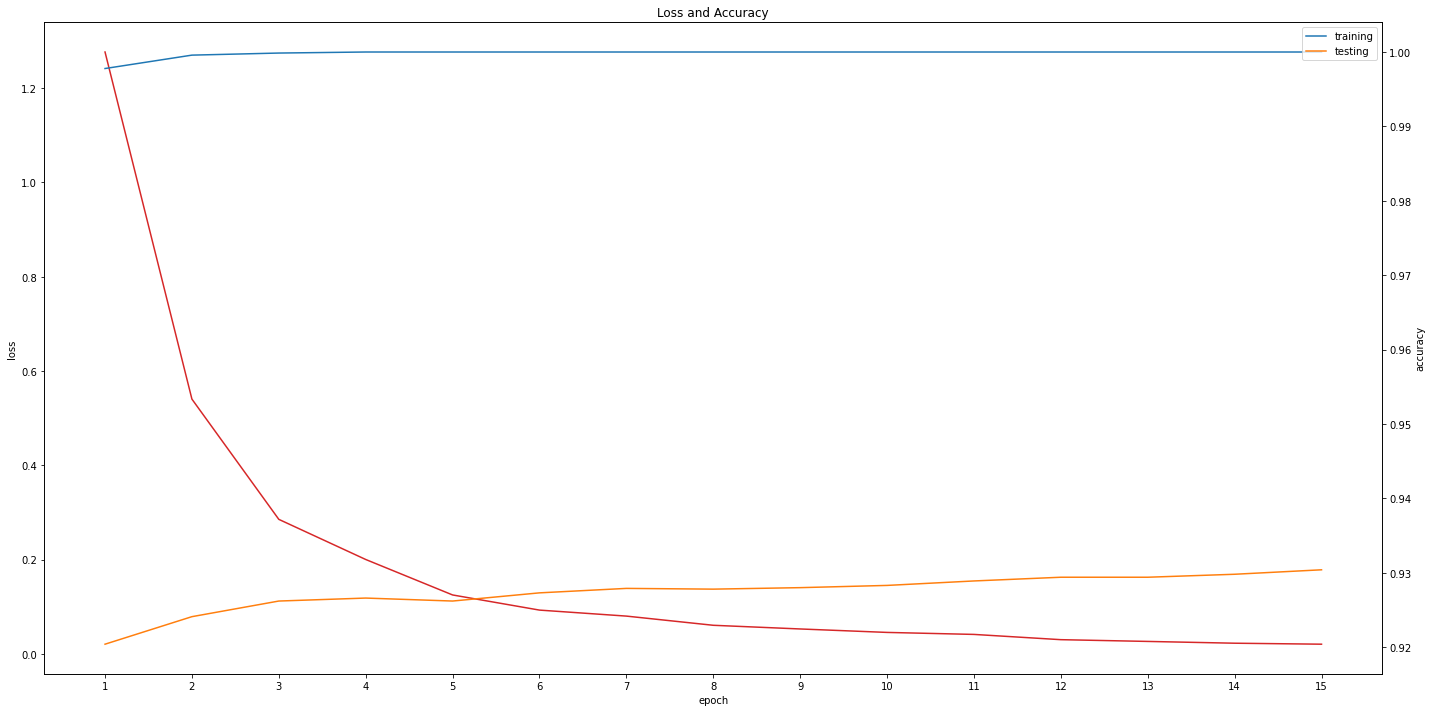

Run 3
--------------------------------------------------------------------------------
X_train has a size: (50000, 64, 64, 3)
y_train has a size: (50000, 1)
X_test has a size: (10000, 64, 64, 3)
y_test has a size: (10000, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run3_1.h5 loaded. Continue training.
Epoch #    1 /  100  Batch loss: 0.019998861 Epoch loss: 1.1569351 Training Accuracy: 0.99796 Testing Accuracy: 0.9187
Epoch #    2 /  100  Batch loss: 0.0044822227 Epoch loss: 0.5210863 Training Accuracy: 0.99944 Testing Accuracy: 0.9238 Model Saved!
Epoch #    3 /  100  Batch loss: 0.006872356 Epoch loss: 0.30533403 Training Accuracy: 0.9999 Testing Accuracy: 0.9244 Model Saved!
Learning Rate decreases from 1e-05 to 5e-06
Learning Rate fixed to 1e-08 when very close to the target
Epoch #    4 /  100  Batch loss: 0.0016935681 Epoch loss: 0.18425702 Training Accuracy: 1.0 Test

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 1.0
Average Testing  Accuracy: 0.9301666666666667


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_cifar10_run1 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_cifar10_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run1_2", lr=1e-5, acc_target=0.93, num_epoch=100)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_cifar10_run2 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_cifar10_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run2_2", lr=1e-5, acc_target=0.93, num_epoch=100)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_cifar10_run3 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_cifar10_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run3_2", lr=1e-5, acc_target=0.93, num_epoch=100)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

#### 4.1.1.3 3rd time - 3 runs, target accuracy: 93.3%

Run 1
--------------------------------------------------------------------------------
X_train has a size: (50000, 64, 64, 3)
y_train has a size: (50000, 1)
X_test has a size: (10000, 64, 64, 3)
y_test has a size: (10000, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run1_3.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 4.949267e-07 Epoch loss: 0.00013429494 Training Accuracy: 1.0 Testing Accuracy: 0.9331 Model Saved!
Training time:186.256342 seconds



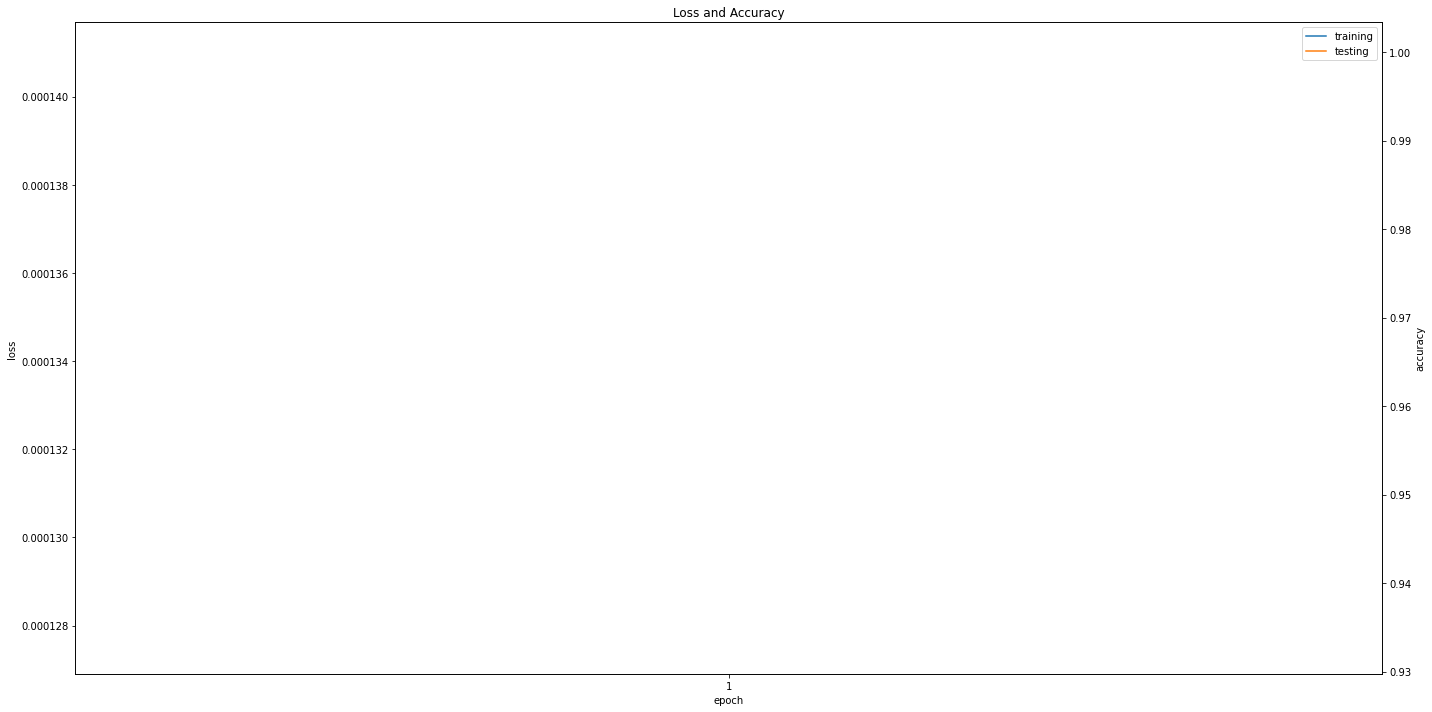

Run 2
--------------------------------------------------------------------------------
X_train has a size: (50000, 64, 64, 3)
y_train has a size: (50000, 1)
X_test has a size: (10000, 64, 64, 3)
y_test has a size: (10000, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run1_3.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 5.414029e-07 Epoch loss: 8.5317864e-05 Training Accuracy: 1.0 Testing Accuracy: 0.9331 Model Saved!
Training time:182.769161 seconds



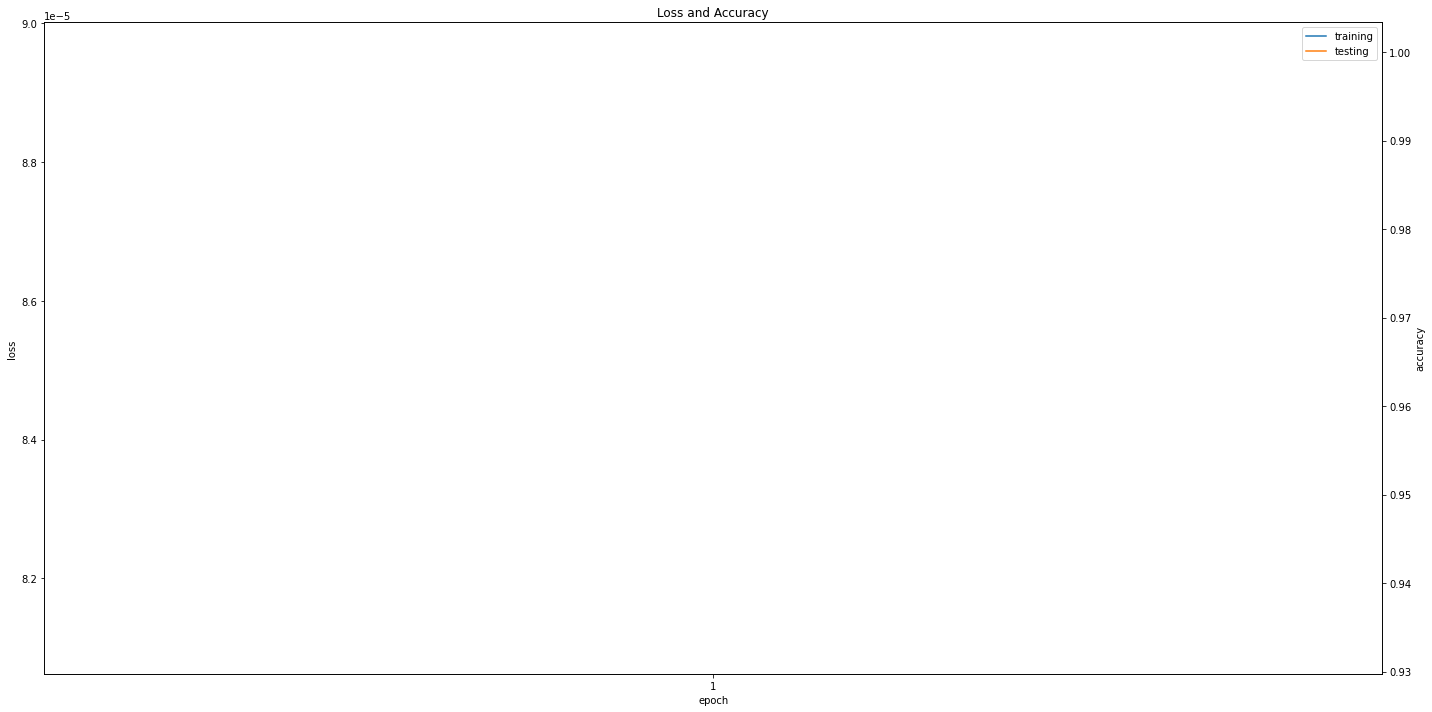

Run 3
--------------------------------------------------------------------------------
X_train has a size: (50000, 64, 64, 3)
y_train has a size: (50000, 1)
X_test has a size: (10000, 64, 64, 3)
y_test has a size: (10000, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run1_3.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 3.6578595e-07 Epoch loss: 8.428391e-05 Training Accuracy: 1.0 Testing Accuracy: 0.933 Model Saved!
Training time:182.447943 seconds



Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 1.0
Average Testing  Accuracy: 0.9330666666666666


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512,shuffle_by_row=False)
# get the model 
model_dense121_cifar10_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=False)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_cifar10_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run1_3", lr=1e-7, acc_target=0.933, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run1_3.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512,shuffle_by_row=False)
# get the model 
model_dense121_cifar10_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=False)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_cifar10_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run2_3", lr=1e-7, acc_target=0.933, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run1_3.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512,shuffle_by_row=False)
# get the model 
model_dense121_cifar10_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=False)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_cifar10_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run3_3", lr=1e-7, acc_target=0.933, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run1_3.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)


### 4.1.2 Caltech101 - original train set

#### 4.1.2.1 1st time - 3 runs target accuracy: 79%

Run 1
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 3060	Done!
Epoch #    1 / 1000  Batch loss: 3.1044183 Epoch loss: 24.2214 Training Accuracy: 0.19477124183006536 Testing Accuracy: 0.16055875102711586
Epoch #    2 / 1000  Batch loss: 1.4961936 Epoch loss: 11.181793 Training Accuracy: 0.19934640522875818 Testing Accuracy: 0.12341824157764995
Epoch #    3 / 1000  Batch loss: 0.62204254 Epoch loss: 4.3271933 Training Accuracy: 0.2088235294117647 Testing Accuracy: 0.12752670501232538
Learning Rate decreases from 0.001 to 0.0002
Epoch #    4 / 1000  Batch loss: 0.14760539 Epoch loss: 1.2259501 Training Accuracy: 0.2676470588235294 Testing Accuracy: 0.1829087921117502 Model Saved!
Learning Rate decreases from 0.0002 to 4e-05
Epoch #    5 / 1000  Batch loss: 0.061597005 Epoch loss: 0.34851134 Training Accuracy: 0.31666666666666665 Testing Accuracy: 0.19868529170090385 Model Saved!
Learning Rate decreases from 4e-05 to 8.00000000000

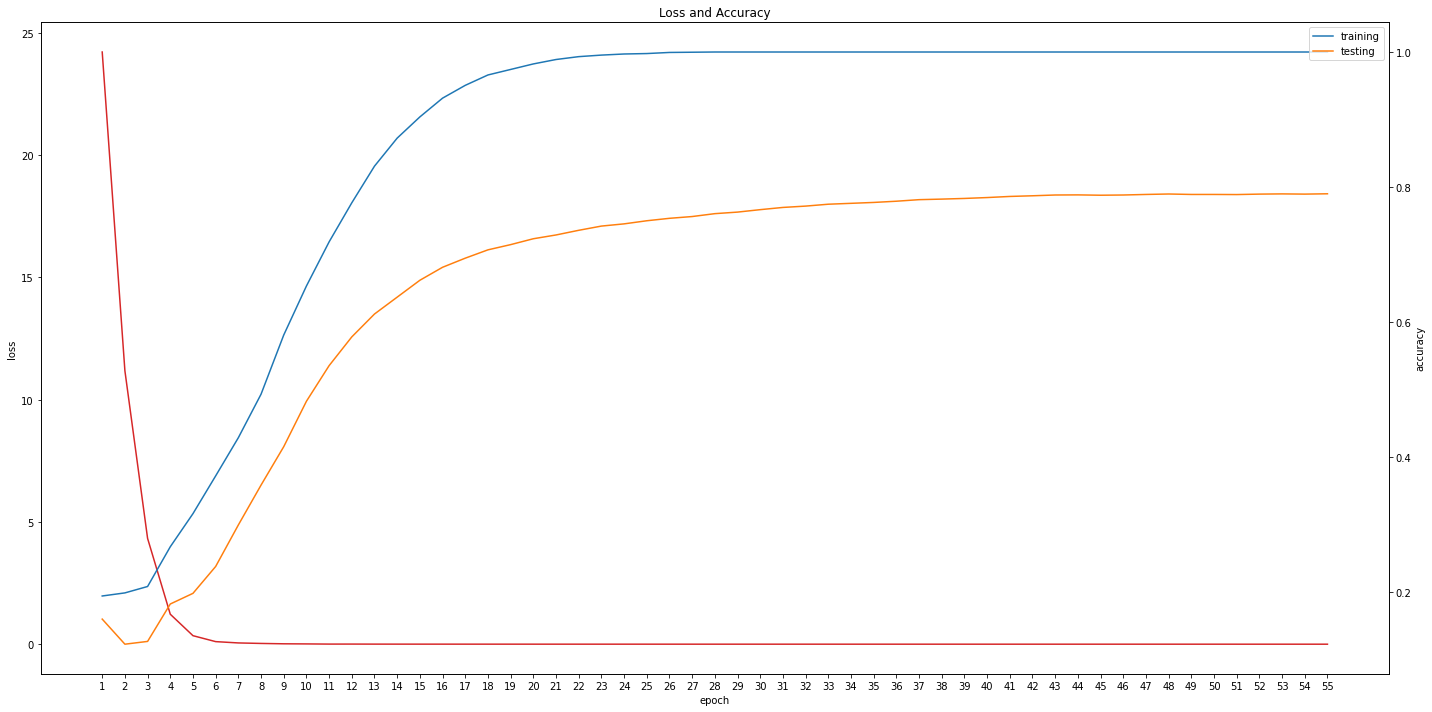

Run 2
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 3060	Done!
Epoch #    1 / 1000  Batch loss: 3.1508436 Epoch loss: 24.306011 Training Accuracy: 0.21862745098039216 Testing Accuracy: 0.2504519309778143
Epoch #    2 / 1000  Batch loss: 1.3111438 Epoch loss: 10.610858 Training Accuracy: 0.19215686274509805 Testing Accuracy: 0.20673788003286772
Epoch #    3 / 1000  Batch loss: 0.48456717 Epoch loss: 3.7958283 Training Accuracy: 0.17908496732026144 Testing Accuracy: 0.1962202136400986
Learning Rate decreases from 0.001 to 0.0002
Epoch #    4 / 1000  Batch loss: 0.0966743 Epoch loss: 0.81929064 Training Accuracy: 0.21862745098039216 Testing Accuracy: 0.2220213640098603
Learning Rate decreases from 0.0002 to 4e-05
Epoch #    5 / 1000  Batch loss: 0.019640809 Epoch loss: 0.17555368 Training Accuracy: 0.25 Testing Accuracy: 0.24716516023007395
Learning Rate decreases from 4e-05 to 8.000000000000001e-06
Epoch #    6 / 1000  Batch los

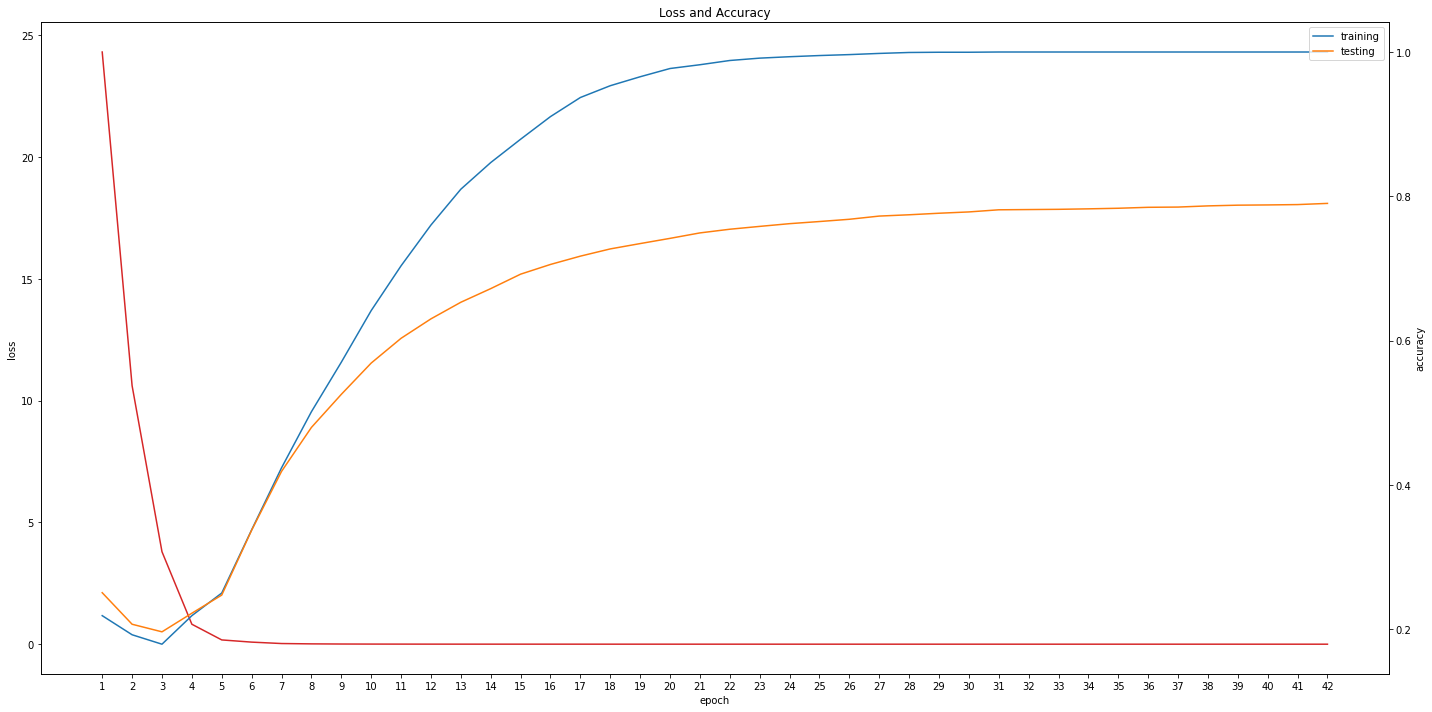

Run 3
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 3060	Done!
Epoch #    1 / 1000  Batch loss: 2.950209 Epoch loss: 23.601389 Training Accuracy: 0.17026143790849674 Testing Accuracy: 0.17304847986852917
Epoch #    2 / 1000  Batch loss: 1.2241305 Epoch loss: 10.2828 Training Accuracy: 0.27647058823529413 Testing Accuracy: 0.2621199671322925 Model Saved!
Epoch #    3 / 1000  Batch loss: 0.48027518 Epoch loss: 3.5021775 Training Accuracy: 0.3045751633986928 Testing Accuracy: 0.31733771569433034 Model Saved!
Learning Rate decreases from 0.001 to 0.0002
Epoch #    4 / 1000  Batch loss: 0.09480364 Epoch loss: 0.83052707 Training Accuracy: 0.24542483660130718 Testing Accuracy: 0.21002465078060806
Learning Rate decreases from 0.0002 to 4e-05
Epoch #    5 / 1000  Batch loss: 0.029200533 Epoch loss: 0.23988967 Training Accuracy: 0.23529411764705882 Testing Accuracy: 0.19852095316351684
Learning Rate decreases from 4e-05 to 8.0000000000

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 1.0
Average Testing  Accuracy: 0.790139687756779


In [ ]:
X_train_path = "/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy"
y_train_path = "/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy"
X_test_path = "/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"
y_test_path = "/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech101_run1 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run1_1", lr=1e-3, acc_target=0.79, num_epoch=1000)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech101_run2 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run2_1", lr=1e-3, acc_target=0.79, num_epoch=1000)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech101_run3 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run3_1", lr=1e-3, acc_target=0.79, num_epoch=1000)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

#### 4.1.2.2 2nd time - 3 runs target accuracy: 80.5%

Run 1
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 3060	Done!
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_run1_1.h5 loaded. Continue training.
Epoch #    1 /  500  Batch loss: 6.0478404e-05 Epoch loss: 0.00036221748 Training Accuracy: 1.0 Testing Accuracy: 0.7914543960558751
Epoch #    2 /  500  Batch loss: 3.613908e-05 Epoch loss: 0.00023418496 Training Accuracy: 1.0 Testing Accuracy: 0.7921117502054231 Model Saved!
Epoch #    3 /  500  Batch loss: 2.3817869e-05 Epoch loss: 0.00015443587 Training Accuracy: 1.0 Testing Accuracy: 0.7926047658175842 Model Saved!
Epoch #    4 /  500  Batch loss: 1.511024e-05 Epoch loss: 0.000110334746 Training Accuracy: 1.0 Testing Accuracy: 0.7942481511914544 Model Saved!
Epoch #    5 /  500  Batch loss: 1.08045315e-05

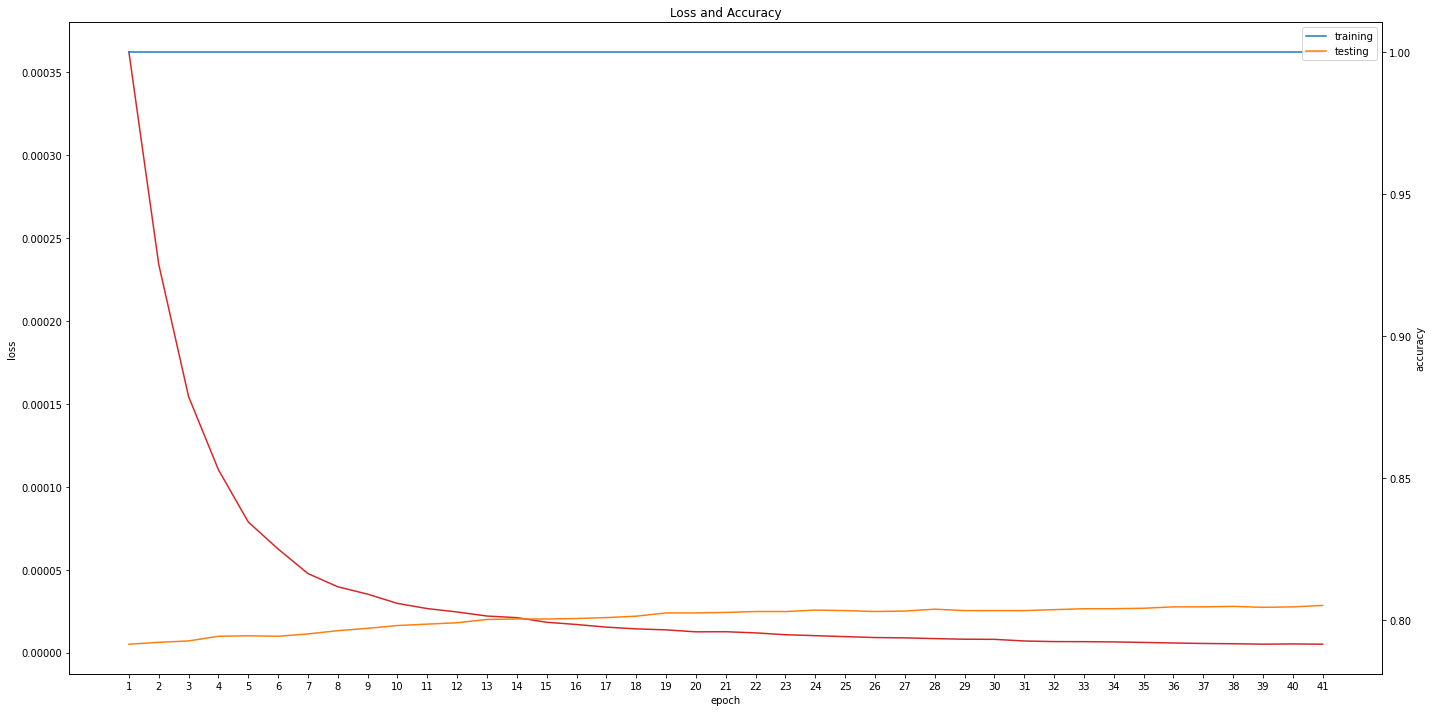

Run 2
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 3060	Done!
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_run2_1.h5 loaded. Continue training.
Epoch #    1 /  500  Batch loss: 7.978506e-05 Epoch loss: 0.00049045816 Training Accuracy: 1.0 Testing Accuracy: 0.790961380443714
Epoch #    2 /  500  Batch loss: 4.256994e-05 Epoch loss: 0.00028695754 Training Accuracy: 1.0 Testing Accuracy: 0.7926047658175842 Model Saved!
Epoch #    3 /  500  Batch loss: 2.3156532e-05 Epoch loss: 0.00017427713 Training Accuracy: 1.0 Testing Accuracy: 0.7937551355792933 Model Saved!
Epoch #    4 /  500  Batch loss: 1.5140286e-05 Epoch loss: 0.00012076567 Training Accuracy: 1.0 Testing Accuracy: 0.7952341824157765 Model Saved!
Learning Rate decreases from 0.0001 to 5e-05
Epoc

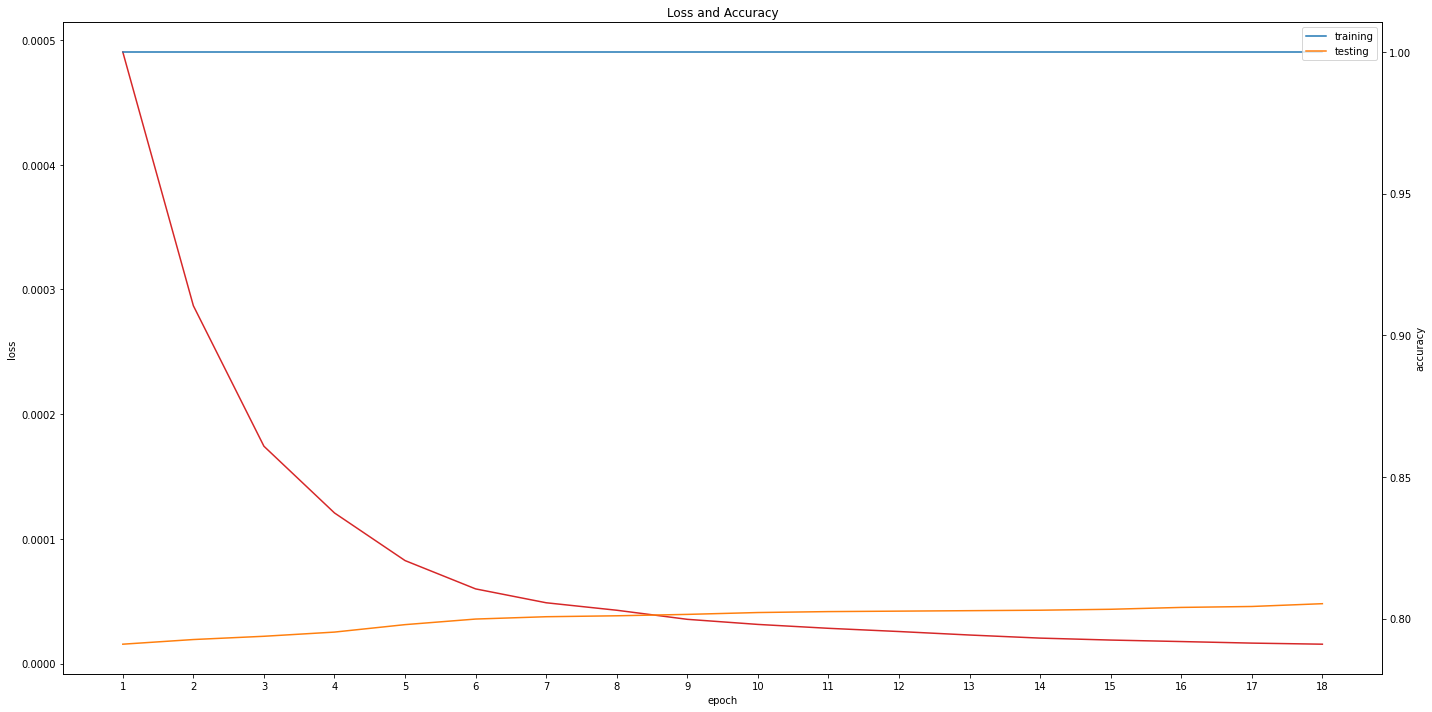

Run 3
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 3060	Done!
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_run3_1.h5 loaded. Continue training.
Epoch #    1 /  500  Batch loss: 6.028525e-05 Epoch loss: 0.00040399455 Training Accuracy: 1.0 Testing Accuracy: 0.7916187345932622
Epoch #    2 /  500  Batch loss: 3.24093e-05 Epoch loss: 0.00023874064 Training Accuracy: 1.0 Testing Accuracy: 0.7919474116680362 Model Saved!
Epoch #    3 /  500  Batch loss: 2.3262257e-05 Epoch loss: 0.00015201344 Training Accuracy: 1.0 Testing Accuracy: 0.7952341824157765 Model Saved!
Epoch #    4 /  500  Batch loss: 1.594178e-05 Epoch loss: 0.00010101094 Training Accuracy: 1.0 Testing Accuracy: 0.7970419063270336 Model Saved!
Learning Rate decreases from 0.0001 to 5e-05
Epoch

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 1.0
Average Testing  Accuracy: 0.8053683922213093


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech101_run1 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run1_2", lr=1e-4, acc_target=0.805, num_epoch=500)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech101_run2 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run2_2", lr=1e-4, acc_target=0.805, num_epoch=500)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech101_run3 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run3_2", lr=1e-4, acc_target=0.805, num_epoch=500)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.1.3 Caltech101 - original train set with resizing from 64x64 to 128x128

#### 4.1.3.1 1st time - 3 runs, no fixed target accuracy

Run 1
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
Epoch #    1 /   50  Batch loss: 2.3788185 Epoch loss: 142.18845 Training Accuracy: 0.12418300653594772 Testing Accuracy: 0.1372226787181594
Epoch #    2 /   50  Batch loss: 1.073429 Epoch loss: 51.300056 Training Accuracy: 0.4316993464052288 Testing Accuracy: 0.42892358258011504 Model Saved!
Epoch #    3 /   50  Batch loss: 0.43264055 Epoch loss: 25.530132 Training Accuracy: 0.568954248366013 Testing Accuracy: 0.42990961380443715 Model Saved!
Learning Rate decreases from 0.001 to 0.0005
Epoch #    4 /   50  Batch loss: 0.37658194 Epoch loss: 15.730077 Training Accuracy: 0.7457516339869281 Testing Accuracy: 0.5781429745275267 Model Saved!
Epoch #    5 /   50  Batch loss: 0.4933454 Epoch loss: 11.846032 Training Accuracy: 0.7068627450980393 Testing Accuracy: 0.646507806

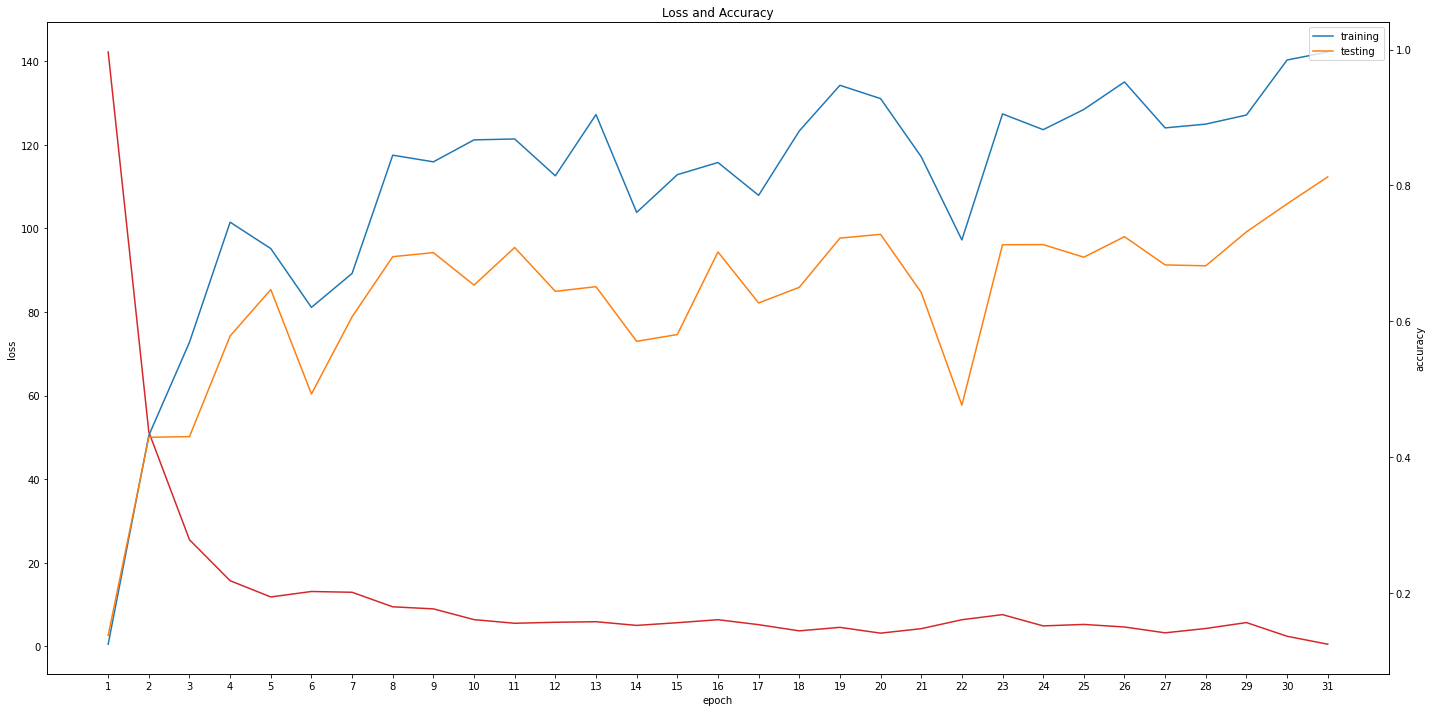

Run 2
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
Epoch #    1 /   50  Batch loss: 2.2171197 Epoch loss: 135.44157 Training Accuracy: 0.13431372549019607 Testing Accuracy: 0.22497945768282662
Epoch #    2 /   50  Batch loss: 0.713534 Epoch loss: 47.17676 Training Accuracy: 0.4166666666666667 Testing Accuracy: 0.3774856203779786 Model Saved!
Epoch #    3 /   50  Batch loss: 0.51840556 Epoch loss: 25.846985 Training Accuracy: 0.49836601307189543 Testing Accuracy: 0.4483155299917831 Model Saved!
Learning Rate decreases from 0.001 to 0.0005
Epoch #    4 /   50  Batch loss: 0.29900014 Epoch loss: 16.152803 Training Accuracy: 0.7562091503267974 Testing Accuracy: 0.68594905505341 Model Saved!
Epoch #    5 /   50  Batch loss: 0.21638921 Epoch loss: 11.508224 Training Accuracy: 0.7643790849673202 Testing Accuracy: 0.6660640920

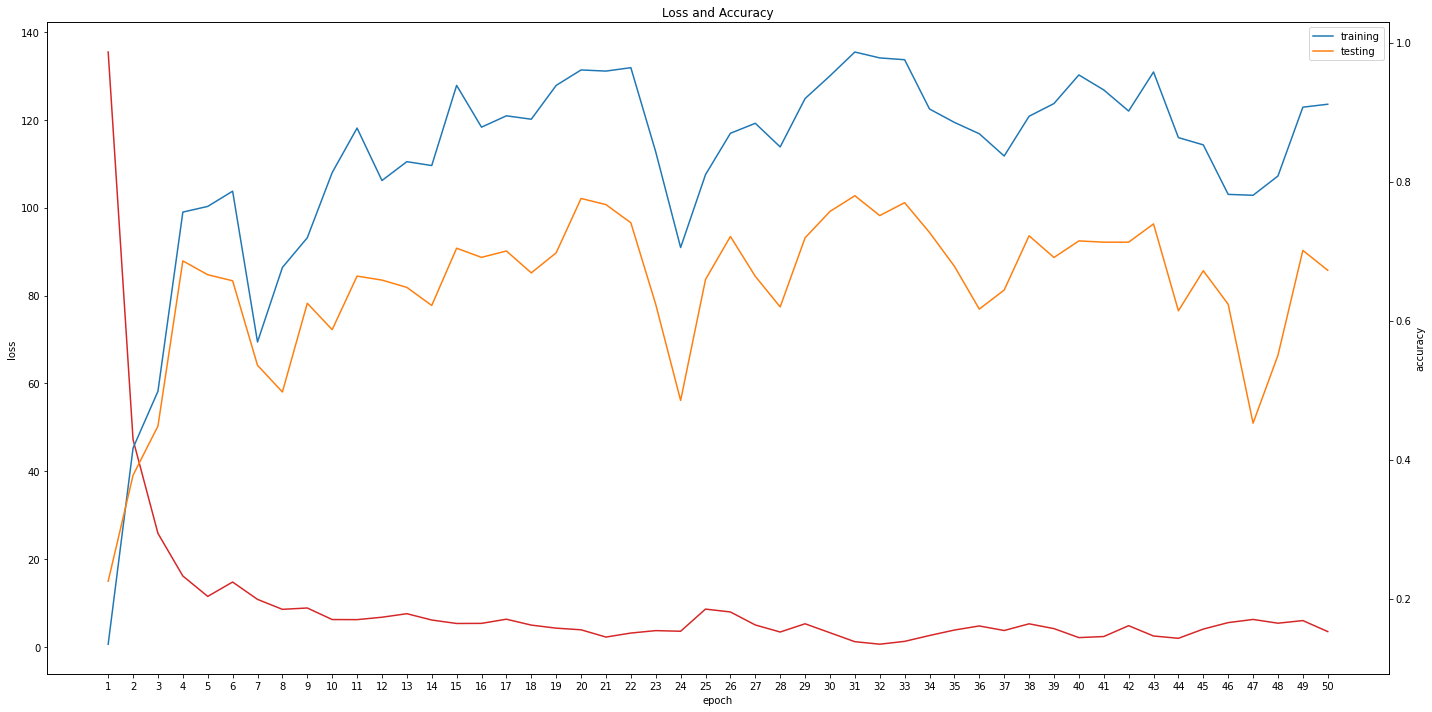

Run 3
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
Epoch #    1 /   50  Batch loss: 1.5217133 Epoch loss: 132.89827 Training Accuracy: 0.18790849673202614 Testing Accuracy: 0.11536565324568611
Epoch #    2 /   50  Batch loss: 0.45770568 Epoch loss: 50.092392 Training Accuracy: 0.30196078431372547 Testing Accuracy: 0.2198849630238291 Model Saved!
Epoch #    3 /   50  Batch loss: 0.46310824 Epoch loss: 24.168861 Training Accuracy: 0.5107843137254902 Testing Accuracy: 0.37551355792933444 Model Saved!
Learning Rate decreases from 0.001 to 0.0005
Epoch #    4 /   50  Batch loss: 0.2352574 Epoch loss: 15.092922 Training Accuracy: 0.5666666666666667 Testing Accuracy: 0.49465899753492193 Model Saved!
Epoch #    5 /   50  Batch loss: 0.49890077 Epoch loss: 15.01325 Training Accuracy: 0.6879084967320261 Testing Accuracy: 0.56318

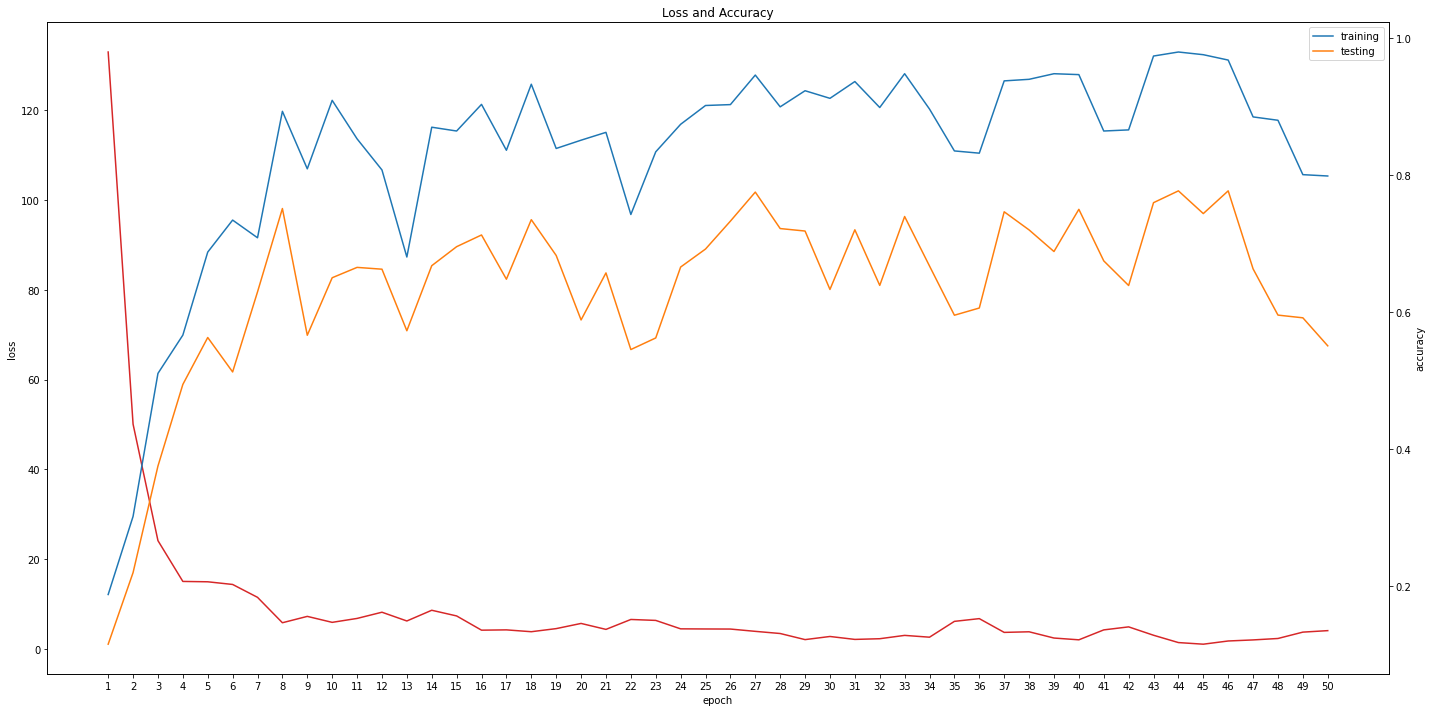

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.9022875816993464
Average Testing  Accuracy: 0.678663379895919


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run1_1", lr=1e-3, acc_target=0.81, num_epoch=50)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run2_1", lr=1e-3, acc_target=0.81, num_epoch=50)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run3_1", lr=1e-3, acc_target=0.81, num_epoch=50)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

#### 4.1.3.2 2nd time - 3 runs target accuracy: 85.5%

Run 1
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.0003936416 Epoch loss: 0.12676506 Training Accuracy: 1.0 Testing Accuracy: 0.8465078060805259 Model Saved!
Epoch #    2 /   20  Batch loss: 0.00011346372 Epoch loss: 0.010162554 Training Accuracy: 1.0 Testing Accuracy: 0.8519309778142975 Model Saved!
Learning Rate decreases from 0.0001 to 5e-05
Epoch #    3 /   20  Batch loss: 0.00019770785 Epoch loss: 0.010794833 Training Accuracy: 1.0 Testing Accuracy: 0.8527526705012325 Model Saved!
Epoch #    4 /   20  Batch loss: 0.00025133917 Epoch loss: 0.0058707343 Training Accuracy: 1.0 Testing Accuracy: 0.8471651602300739
Epoch #    5 /   20  Batch loss: 4.6287

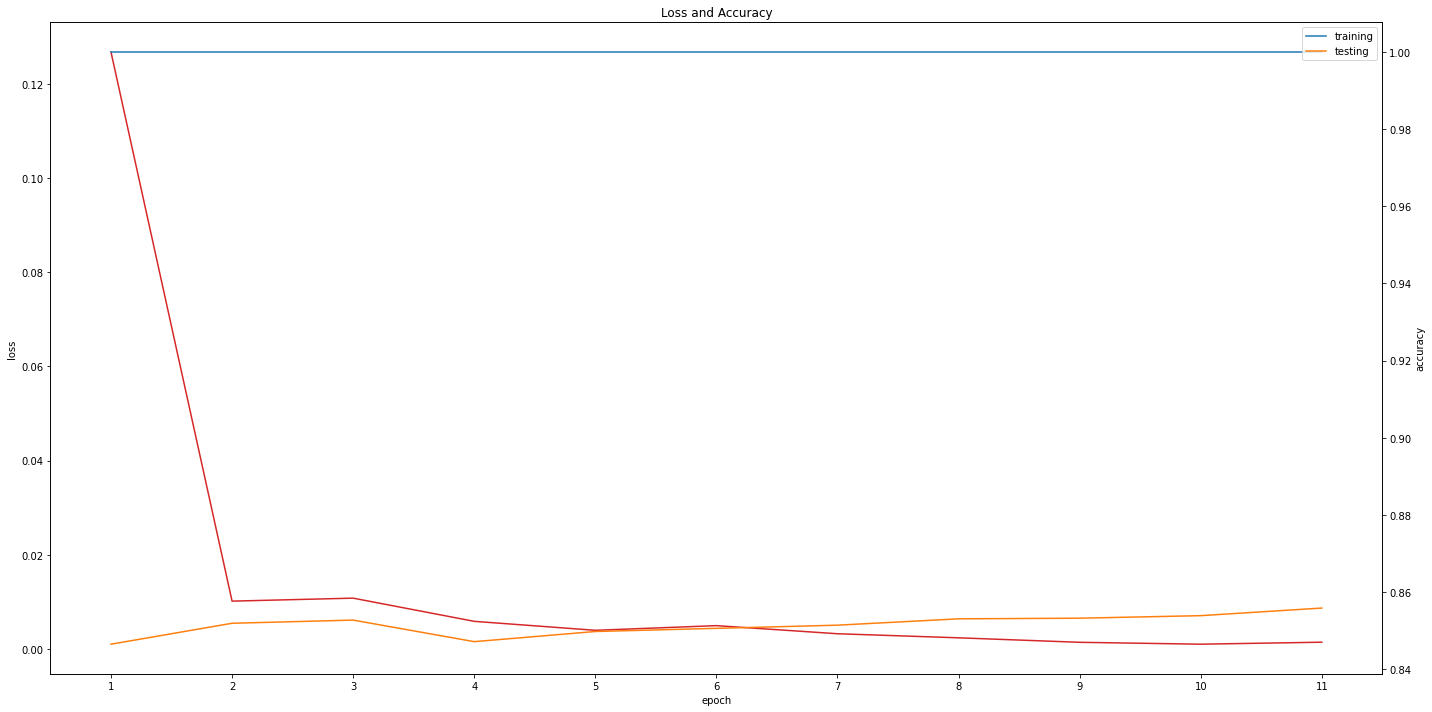

Run 2
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.00013331136 Epoch loss: 0.070854865 Training Accuracy: 1.0 Testing Accuracy: 0.8435497124075596 Model Saved!
Epoch #    2 /   20  Batch loss: 0.00011475928 Epoch loss: 0.01966357 Training Accuracy: 1.0 Testing Accuracy: 0.8491372226787182 Model Saved!
Learning Rate decreases from 0.0001 to 5e-05
Epoch #    3 /   20  Batch loss: 0.00017398426 Epoch loss: 0.014163619 Training Accuracy: 1.0 Testing Accuracy: 0.847658175842235
Epoch #    4 /   20  Batch loss: 0.00047615077 Epoch loss: 0.007669513 Training Accuracy: 1.0 Testing Accuracy: 0.8527526705012325 Model Saved!
Epoch #    5 /   20  Batch loss: 9.48317

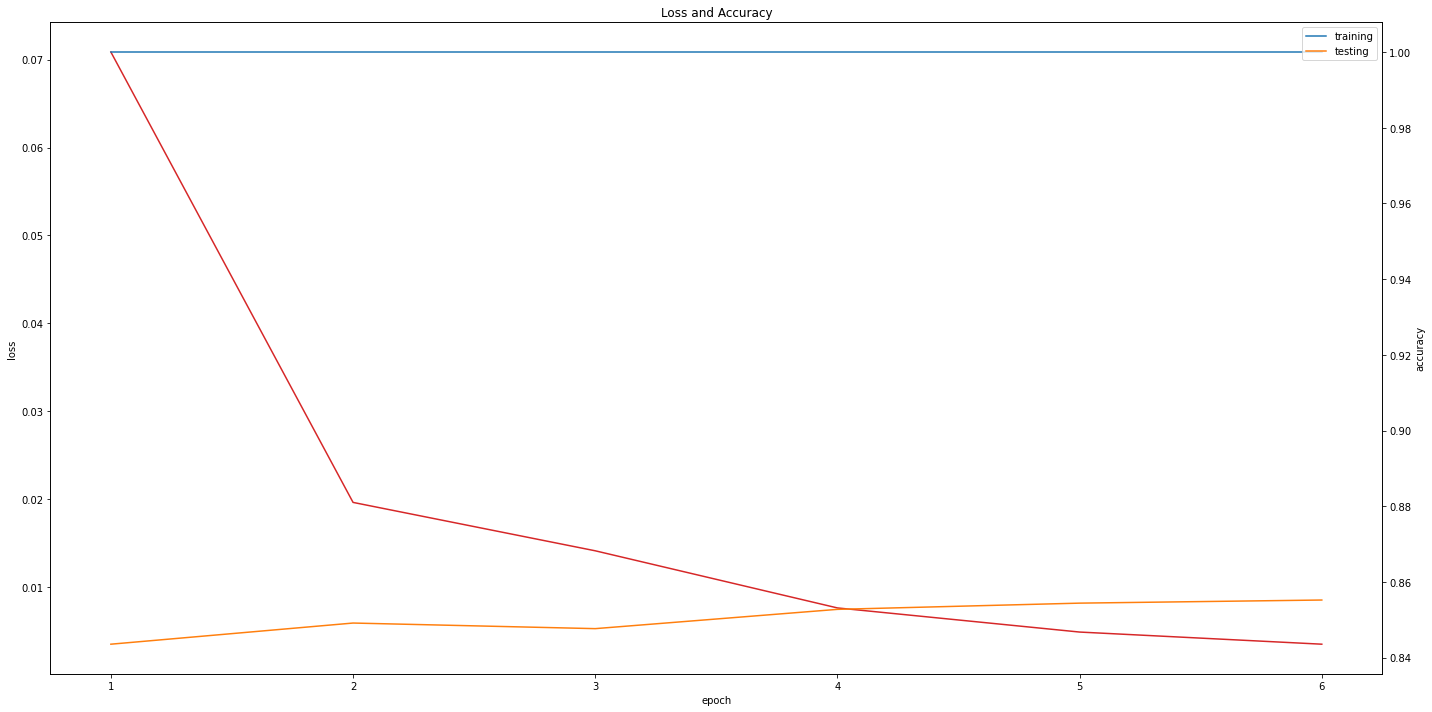

Run 3
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.00019682449 Epoch loss: 0.09581352 Training Accuracy: 1.0 Testing Accuracy: 0.8432210353327856 Model Saved!
Epoch #    2 /   20  Batch loss: 0.005661964 Epoch loss: 0.024553467 Training Accuracy: 1.0 Testing Accuracy: 0.847822514379622 Model Saved!
Learning Rate decreases from 0.0001 to 5e-05
Epoch #    3 /   20  Batch loss: 0.00014363363 Epoch loss: 0.011155791 Training Accuracy: 1.0 Testing Accuracy: 0.8519309778142975 Model Saved!
Epoch #    4 /   20  Batch loss: 0.000120284276 Epoch loss: 0.007216664 Training Accuracy: 1.0 Testing Accuracy: 0.8545603944124898 Model Saved!
Learning Rate decreases from

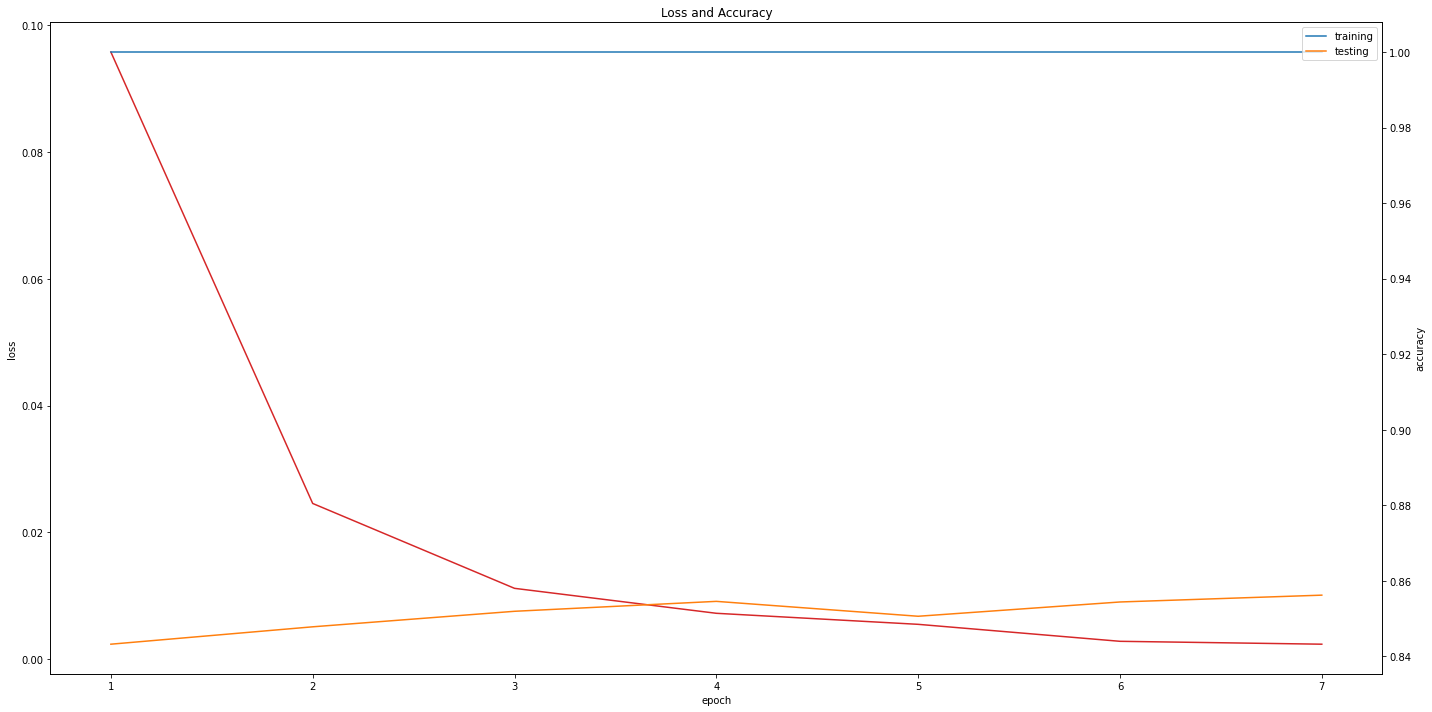

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 1.0
Average Testing  Accuracy: 0.8557655436866612


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run1_2", lr=1e-4, acc_target=0.855, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_1.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run2_2", lr=1e-4, acc_target=0.855, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_1.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run3_2", lr=1e-4, acc_target=0.855, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_1.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

#### 4.1.3.3 3rd time - 3 runs target accuracy: 86.2%

Run 1
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run3_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 2.5980224e-05 Epoch loss: 0.0031773977 Training Accuracy: 1.0 Testing Accuracy: 0.857682826622843 Model Saved!
Epoch #    2 /   20  Batch loss: 2.8863533e-05 Epoch loss: 0.001525355 Training Accuracy: 1.0 Testing Accuracy: 0.8589975349219392 Model Saved!
Epoch #    3 /   20  Batch loss: 3.5410925e-05 Epoch loss: 0.0015641167 Training Accuracy: 1.0 Testing Accuracy: 0.8589975349219392
Epoch #    4 /   20  Batch loss: 1.603616e-05 Epoch loss: 0.0011296804 Training Accuracy: 1.0 Testing Accuracy: 0.8591618734593263 Model Saved!
Epoch #    5 /   20  Batch loss: 5.5683295e-06 Epoch loss: 0.0011301575 Training A

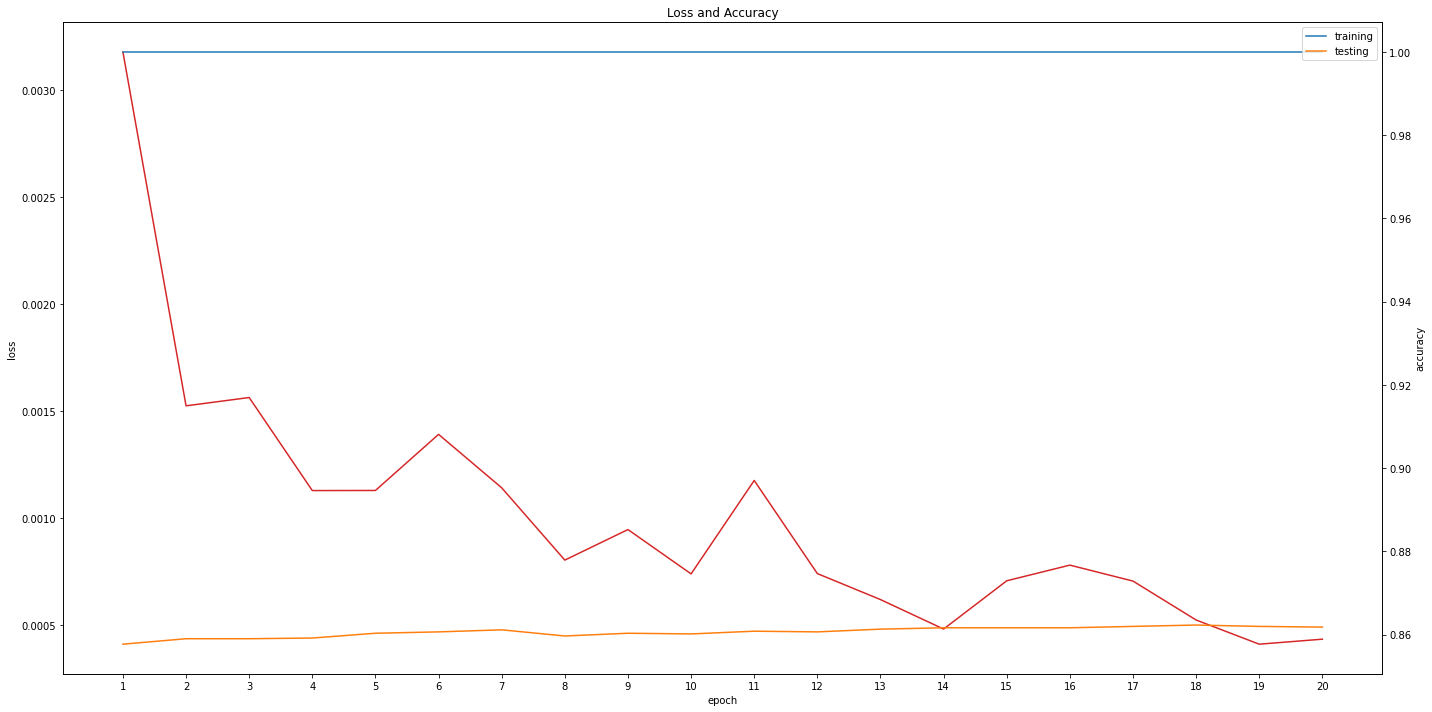

Run 2
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run3_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 5.251831e-05 Epoch loss: 0.0022613574 Training Accuracy: 1.0 Testing Accuracy: 0.856696795398521 Model Saved!
Epoch #    2 /   20  Batch loss: 4.9860387e-06 Epoch loss: 0.0020210368 Training Accuracy: 1.0 Testing Accuracy: 0.8585045193097781 Model Saved!
Epoch #    3 /   20  Batch loss: 1.0732803e-05 Epoch loss: 0.00091604306 Training Accuracy: 1.0 Testing Accuracy: 0.8578471651602301
Epoch #    4 /   20  Batch loss: 7.681915e-06 Epoch loss: 0.0010358868 Training Accuracy: 1.0 Testing Accuracy: 0.8588331963845521 Model Saved!
Epoch #    5 /   20  Batch loss: 1.3634273e-05 Epoch loss: 0.00077881315 Training

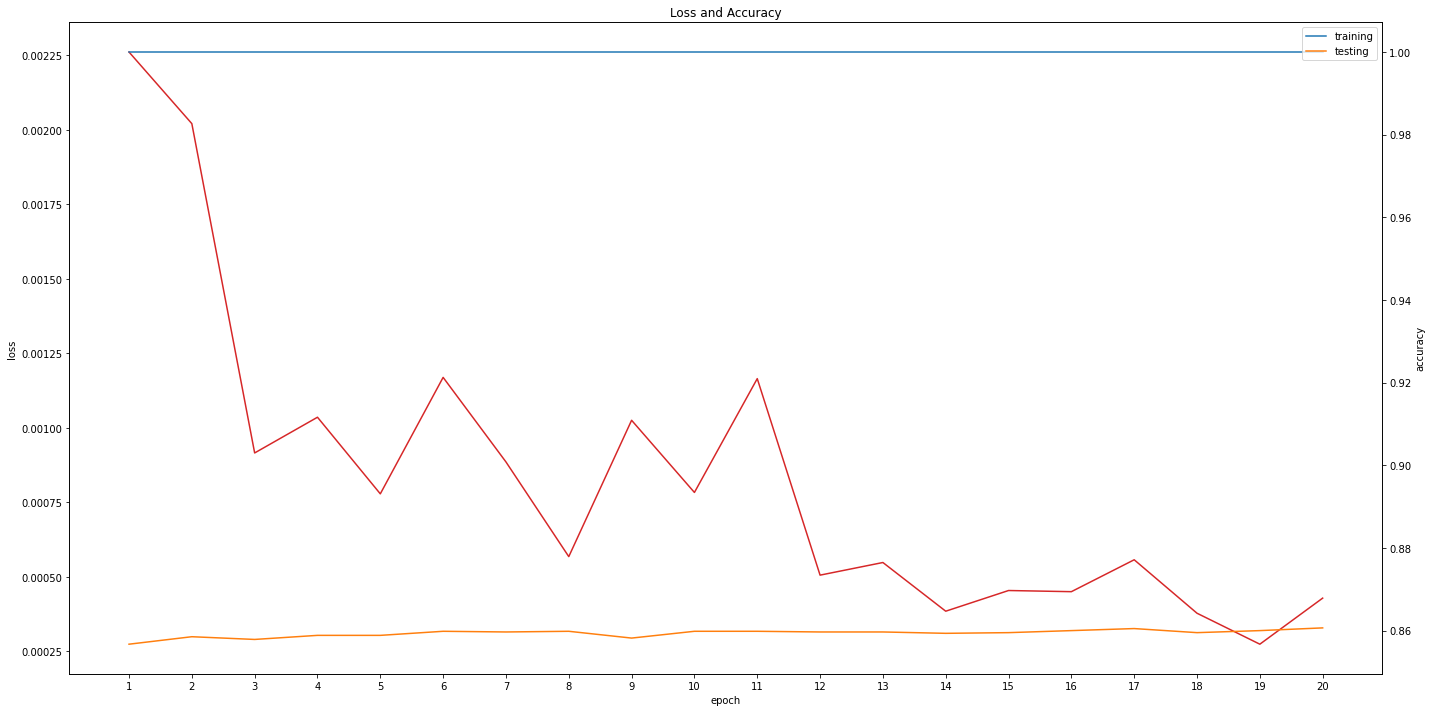

Run 3
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run3_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 1.9207568e-05 Epoch loss: 0.0020591205 Training Accuracy: 1.0 Testing Accuracy: 0.857682826622843 Model Saved!
Epoch #    2 /   20  Batch loss: 4.175179e-05 Epoch loss: 0.0033809503 Training Accuracy: 1.0 Testing Accuracy: 0.857354149548069
Epoch #    3 /   20  Batch loss: 4.3690365e-05 Epoch loss: 0.0013799141 Training Accuracy: 1.0 Testing Accuracy: 0.8578471651602301 Model Saved!
Epoch #    4 /   20  Batch loss: 3.180494e-05 Epoch loss: 0.0008293007 Training Accuracy: 1.0 Testing Accuracy: 0.8586688578471652 Model Saved!
Epoch #    5 /   20  Batch loss: 7.0377314e-06 Epoch loss: 0.0014410244 Training Ac

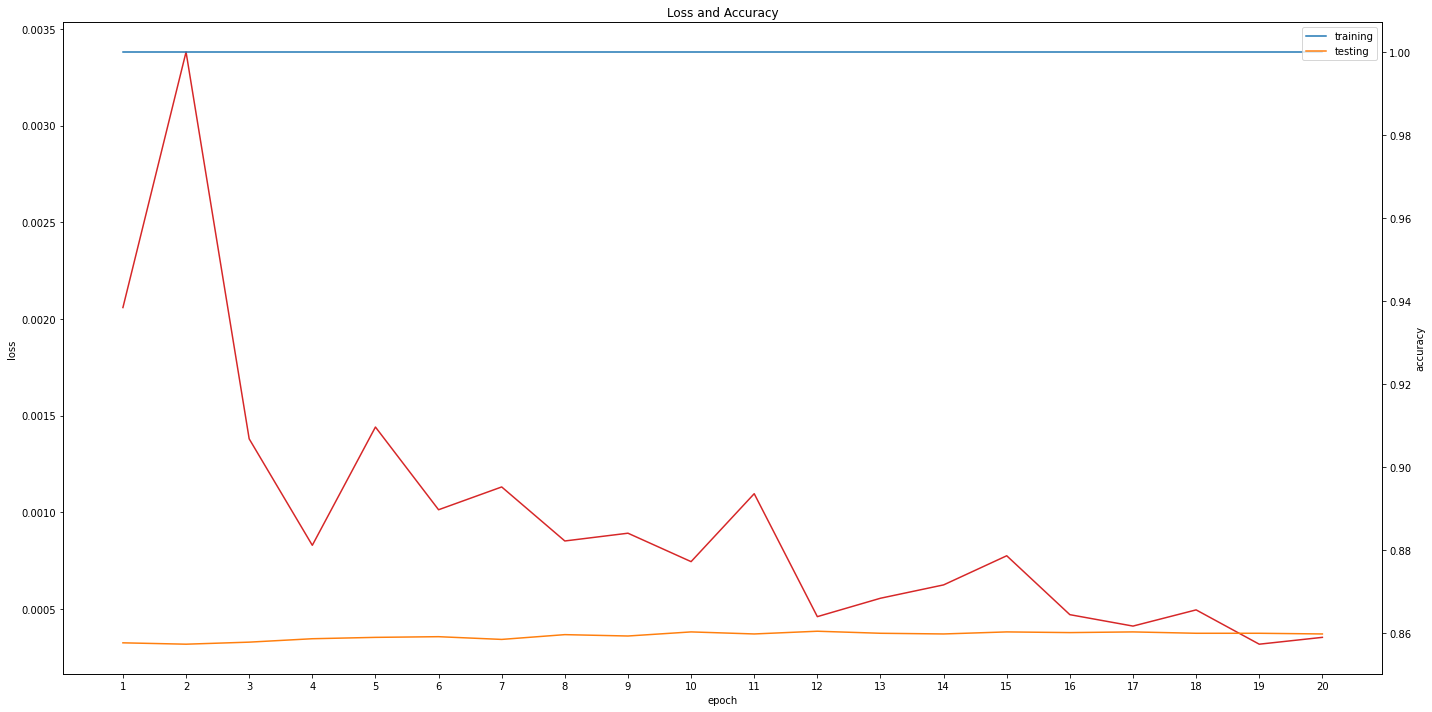

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 1.0
Average Testing  Accuracy: 0.8611339359079704


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run1_2", lr=1e-5, acc_target=0.865, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run3_2.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run2_2", lr=1e-5, acc_target=0.865, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run3_2.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run3_2", lr=1e-5, acc_target=0.865, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run3_2.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)


#### 4.1.3.4 4th time - 3 runs target accuracy: 86.3%

Run 1
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 4.8574775e-06 Epoch loss: 0.0003361804 Training Accuracy: 1.0 Testing Accuracy: 0.8635990139687757 Model Saved!
Training time:56.579401 seconds



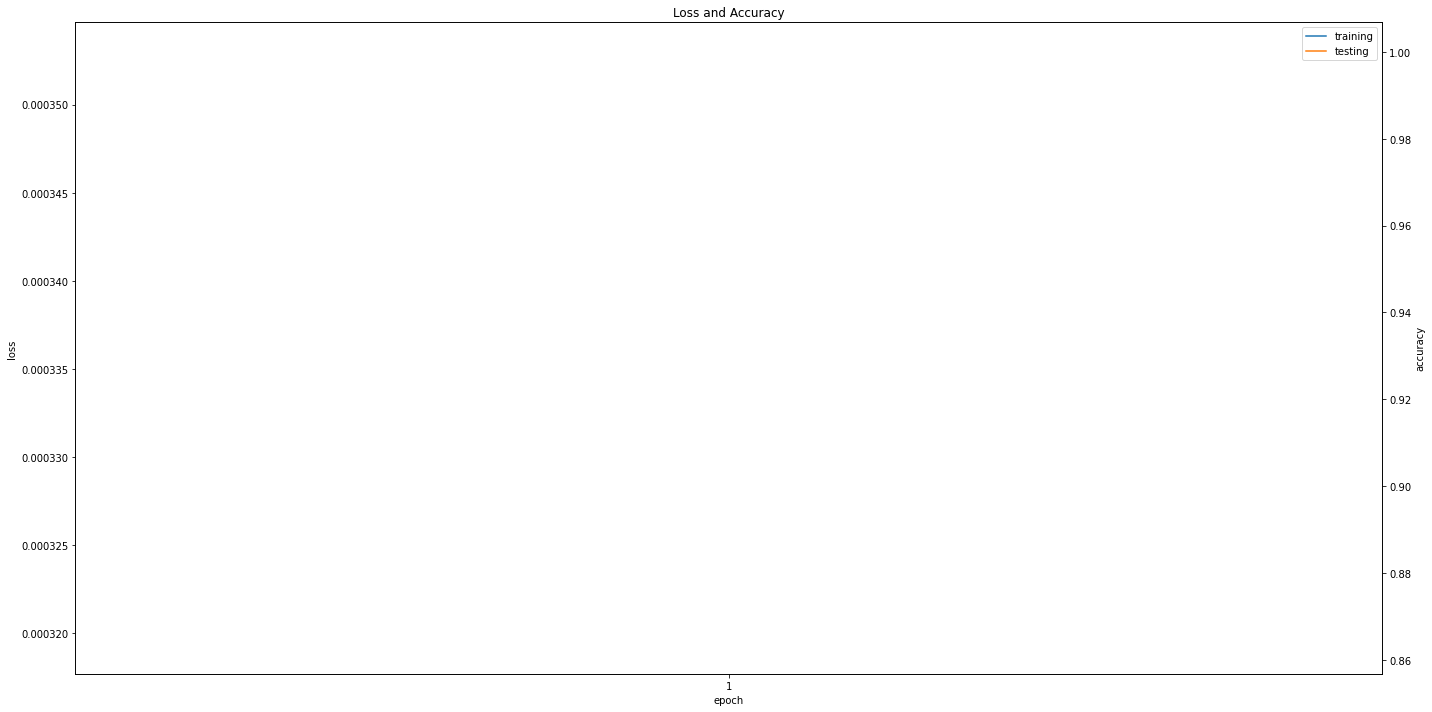

Run 2
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 3.3378187e-06 Epoch loss: 0.00036691056 Training Accuracy: 1.0 Testing Accuracy: 0.8626129827444535 Model Saved!
Epoch #    2 /   20  Batch loss: 4.098869e-06 Epoch loss: 0.00024984562 Training Accuracy: 1.0 Testing Accuracy: 0.8624486442070666
Epoch #    3 /   20  Batch loss: 2.977868e-06 Epoch loss: 0.0002810097 Training Accuracy: 1.0 Testing Accuracy: 0.8627773212818406 Model Saved!
Epoch #    4 /   20  Batch loss: 4.064458e-06 Epoch loss: 0.0005985648 Training Accuracy: 1.0 Testing Accuracy: 0.8624486442070666
Epoch #    5 /   20  Batch loss: 8.011604e-06 Epoch loss: 0.0003145039 Training Accuracy: 1.0

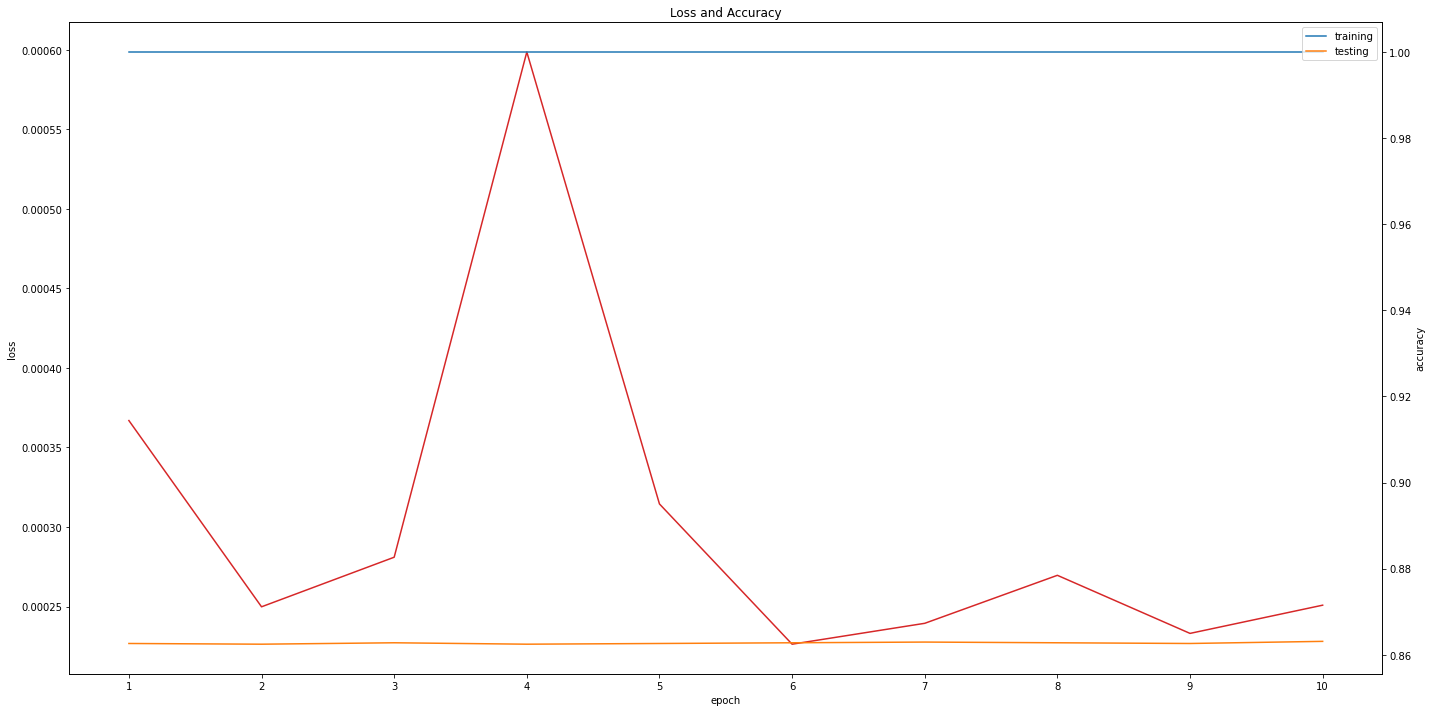

Run 3
--------------------------------------------------------------------------------
X_train has a size: (3060, 64, 64, 3)
y_train has a size: (3060, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 4.0163786e-06 Epoch loss: 0.00047969358 Training Accuracy: 1.0 Testing Accuracy: 0.8614626129827444 Model Saved!
Epoch #    2 /   20  Batch loss: 5.7262414e-06 Epoch loss: 0.000312342 Training Accuracy: 1.0 Testing Accuracy: 0.8619556285949055 Model Saved!
Epoch #    3 /   20  Batch loss: 4.53896e-06 Epoch loss: 0.00027708634 Training Accuracy: 1.0 Testing Accuracy: 0.8627773212818406 Model Saved!
Epoch #    4 /   20  Batch loss: 1.7514501e-06 Epoch loss: 0.00034730873 Training Accuracy: 1.0 Testing Accuracy: 0.8634346754313886 Model Saved!
Training time:218.576502 seconds



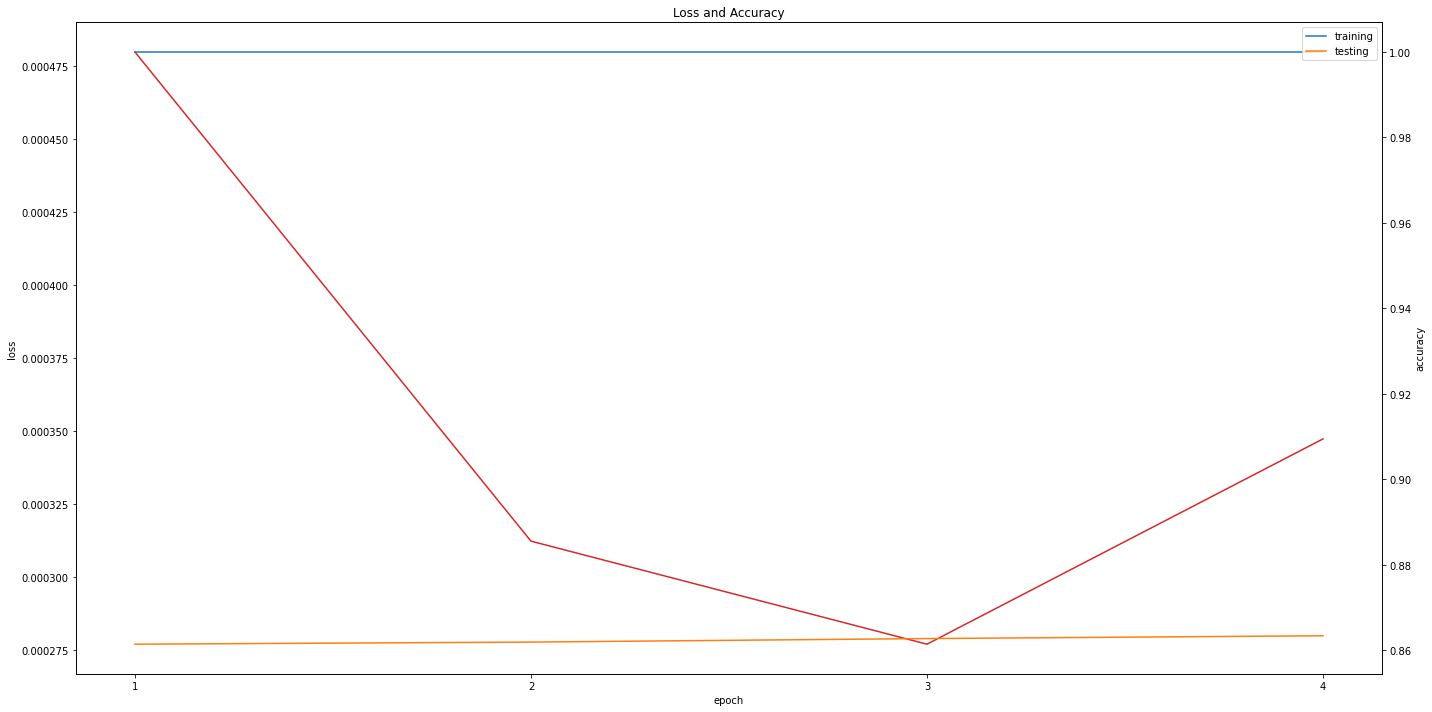

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 1.0
Average Testing  Accuracy: 0.8633798959189264


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run1_3", lr=1e-5, acc_target=0.863, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_2.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run2_3", lr=1e-5, acc_target=0.863, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_2.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize", sn_run="run3_3", lr=1e-5, acc_target=0.863, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_2.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)


### 4.1.4 Caltech101 - original train set with augmented data, based on 4.1.3 best saved model

#### 4.1.4.1 1st time - 3 runs, no fixed target

Run 1
--------------------------------------------------------------------------------
X_train has a size: (6120, 64, 64, 3)
y_train has a size: (6120, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.11077529 Epoch loss: 7.9150605 Training Accuracy: 0.923202614379085 Testing Accuracy: 0.7137222678718159 Model Saved!
Epoch #    2 /   20  Batch loss: 0.12257515 Epoch loss: 12.117013 Training Accuracy: 0.8176470588235294 Testing Accuracy: 0.6292522596548891
Epoch #    3 /   20  Batch loss: 0.015048836 Epoch loss: 11.476065 Training Accuracy: 0.9147058823529411 Testing Accuracy: 0.7112571898110107
Epoch #    4 /   20  Batch loss: 0.071905345 Epoch loss: 7.5607233 Training Accuracy: 0.9480392156862745 Testing Accuracy: 0.7533278553820871 Model Saved!
Epoch #    5 /   20  Batch loss: 0.01278474 Epoch l

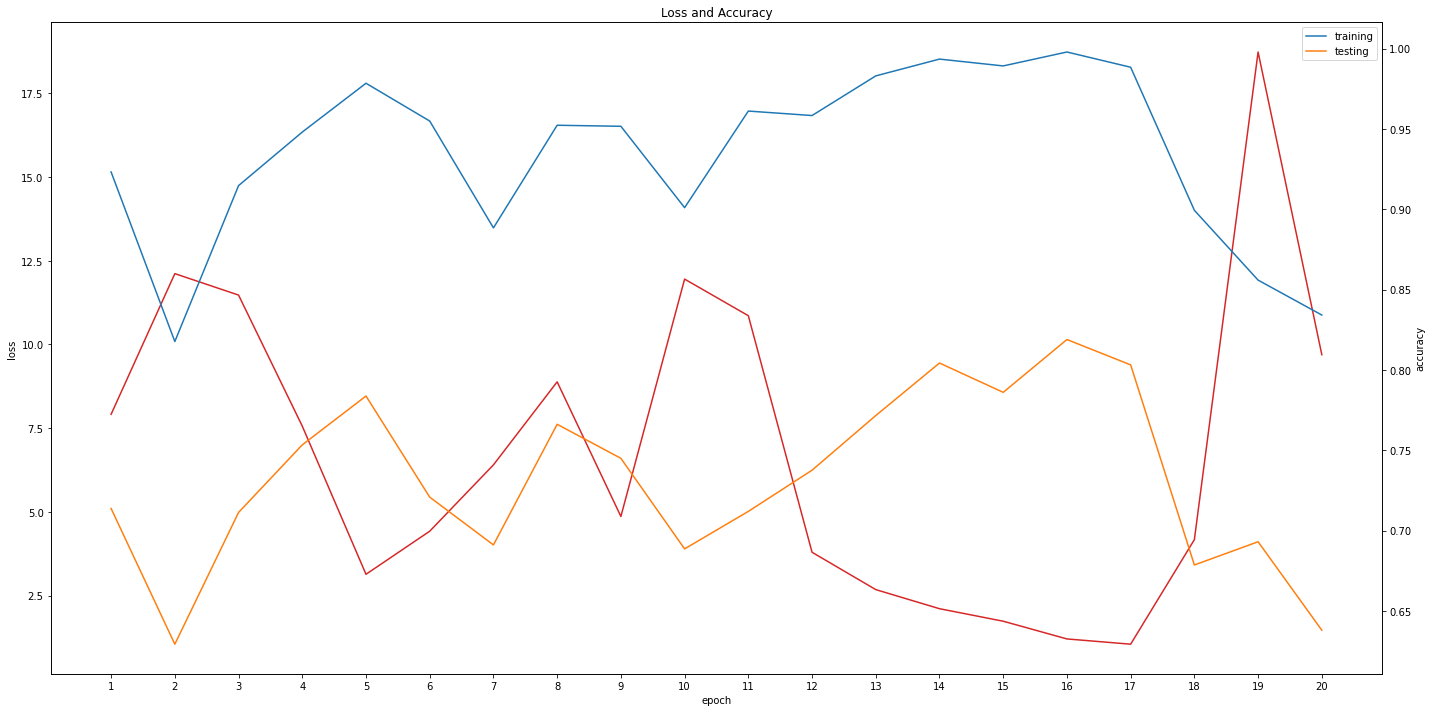

Run 2
--------------------------------------------------------------------------------
X_train has a size: (6120, 64, 64, 3)
y_train has a size: (6120, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.21065705 Epoch loss: 8.215309 Training Accuracy: 0.8511437908496732 Testing Accuracy: 0.6877567789646672 Model Saved!
Epoch #    2 /   20  Batch loss: 0.003071425 Epoch loss: 9.768628 Training Accuracy: 0.8962418300653595 Testing Accuracy: 0.6994248151191454 Model Saved!
Epoch #    3 /   20  Batch loss: 0.02204733 Epoch loss: 6.5453134 Training Accuracy: 0.9679738562091503 Testing Accuracy: 0.7520131470829909 Model Saved!
Epoch #    4 /   20  Batch loss: 0.06466313 Epoch loss: 6.6894794 Training Accuracy: 0.9640522875816994 Testing Accuracy: 0.7750205423171733 Model Saved!
Epoch #    5 /   20  Batch 

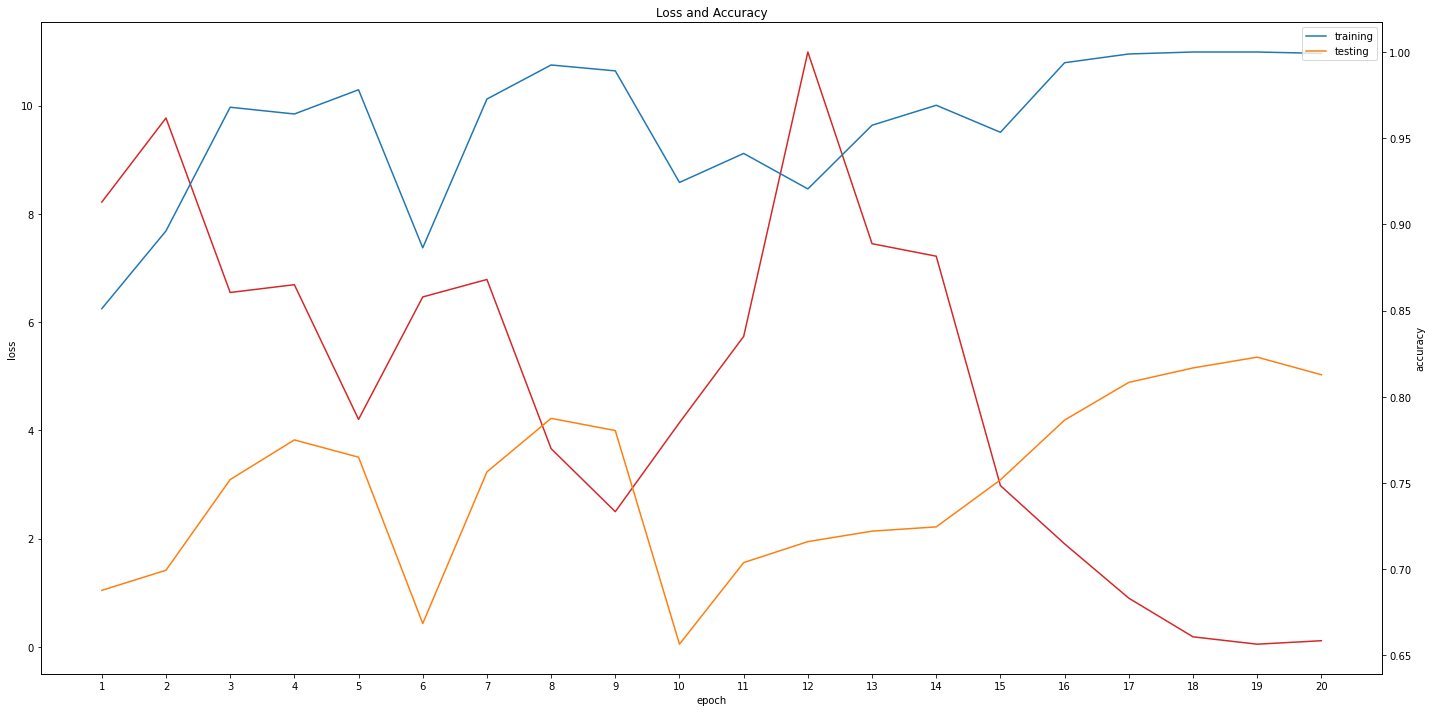

Run 3
--------------------------------------------------------------------------------
X_train has a size: (6120, 64, 64, 3)
y_train has a size: (6120, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.16693184 Epoch loss: 6.9822693 Training Accuracy: 0.9254901960784314 Testing Accuracy: 0.724239934264585 Model Saved!
Epoch #    2 /   20  Batch loss: 0.07033244 Epoch loss: 12.583083 Training Accuracy: 0.8874183006535947 Testing Accuracy: 0.6938373048479869
Epoch #    3 /   20  Batch loss: 0.19330111 Epoch loss: 7.81066 Training Accuracy: 0.951797385620915 Testing Accuracy: 0.7370583401807724 Model Saved!
Epoch #    4 /   20  Batch loss: 0.026042286 Epoch loss: 5.7759457 Training Accuracy: 0.9833333333333333 Testing Accuracy: 0.7930977814297453 Model Saved!
Epoch #    5 /   20  Batch loss: 0.0031339

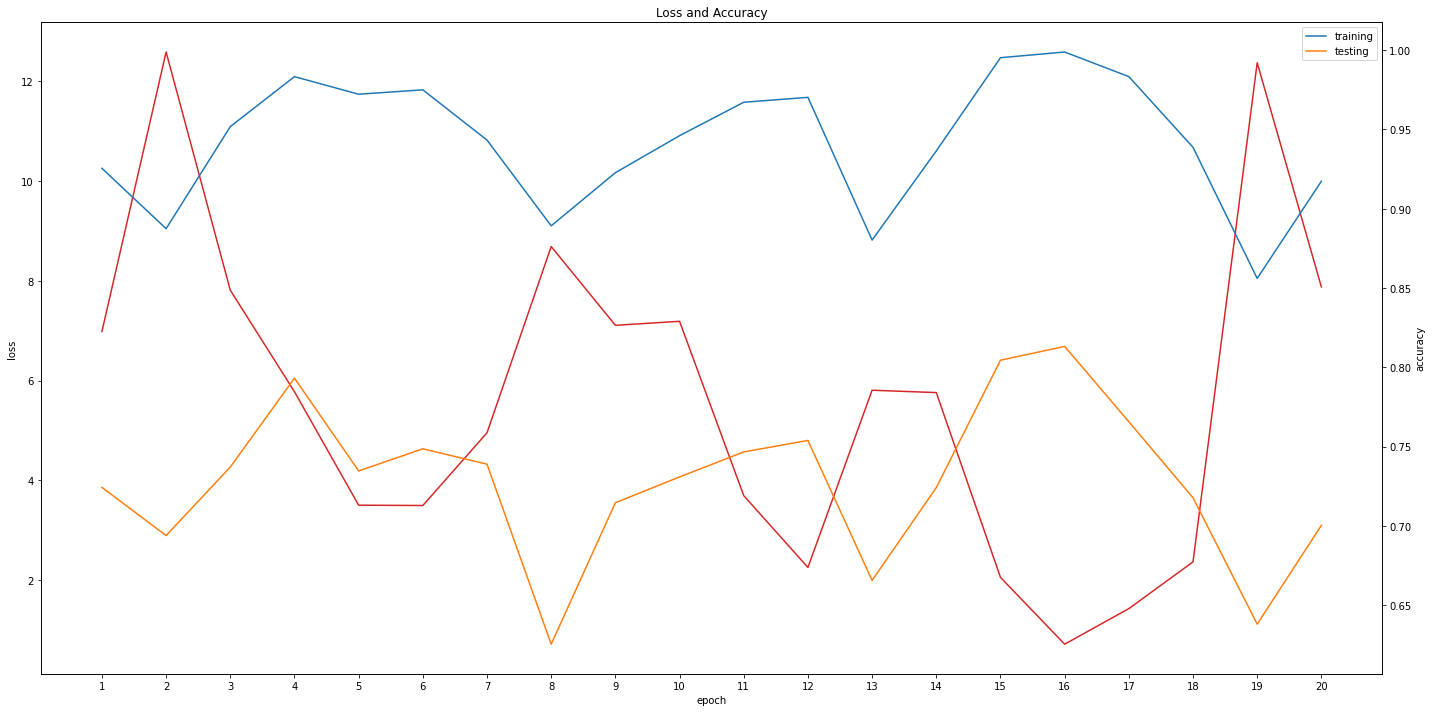

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 0.9989106753812637
Average Testing  Accuracy: 0.8183511366748837


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy","/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug_keras.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy","/content/drive/MyDrive/Deep Learning_Project/caltech101_y_aug_keras.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize_aug", sn_run="run1_1", lr=1e-3, acc_target=0.87, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_1.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize_aug", sn_run="run2_1", lr=1e-3, acc_target=0.87, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_1.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize_aug", sn_run="run3_1", lr=1e-3, acc_target=0.87, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_1.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

#### 4.1.4.2 2nd time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (6120, 64, 64, 3)
y_train has a size: (6120, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 8.7022056e-07 Epoch loss: 0.0025529591 Training Accuracy: 1.0 Testing Accuracy: 0.8323746918652424 Model Saved!
Epoch #    2 /   20  Batch loss: 9.4770223e-07 Epoch loss: 0.0040340633 Training Accuracy: 1.0 Testing Accuracy: 0.8297452752670501
Epoch #    3 /   20  Batch loss: 4.5895496e-07 Epoch loss: 0.00073969614 Training Accuracy: 1.0 Testing Accuracy: 0.8305669679539852
Learning Rate decreases from 0.0001 to 5e-05
Epoch #    4 /   20  Batch loss: 2.06526e-06 Epoch loss: 0.00088684197 Training Accuracy: 1.0 Testing Accuracy: 0.829252259654889
Epoch #    5 /   20  Batch loss: 1.1012748e-05 Epoch loss

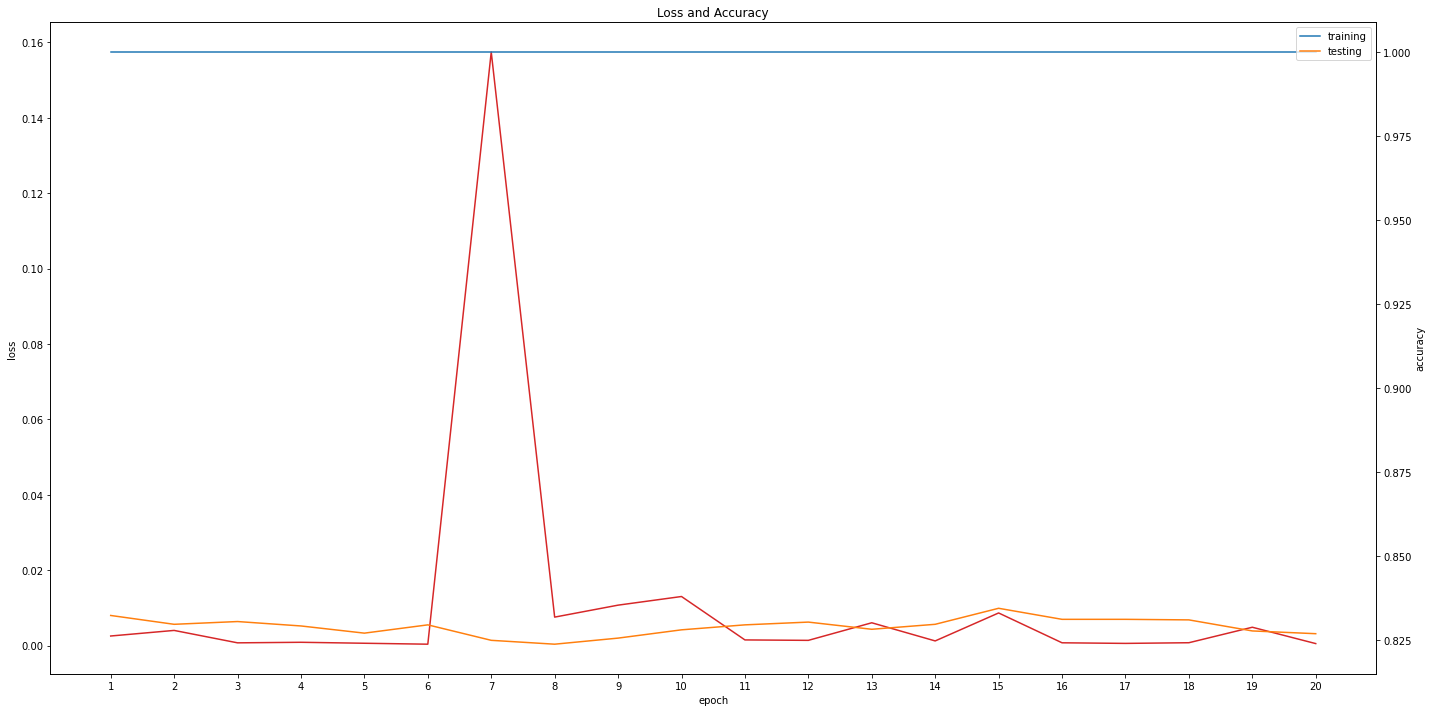

Run 2
--------------------------------------------------------------------------------
X_train has a size: (6120, 64, 64, 3)
y_train has a size: (6120, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 1.6391255e-07 Epoch loss: 0.0020108782 Training Accuracy: 1.0 Testing Accuracy: 0.8317173377156943 Model Saved!
Epoch #    2 /   20  Batch loss: 2.801408e-07 Epoch loss: 0.00052808074 Training Accuracy: 1.0 Testing Accuracy: 0.8341824157764995 Model Saved!
Learning Rate decreases from 0.0001 to 5e-05
Epoch #    3 /   20  Batch loss: 1.0430606e-06 Epoch loss: 0.00049539877 Training Accuracy: 1.0 Testing Accuracy: 0.8340180772391126
Epoch #    4 /   20  Batch loss: 1.2218935e-07 Epoch loss: 0.00025855823 Training Accuracy: 1.0 Testing Accuracy: 0.8335250616269515
Epoch #    5 /   20  Batch loss: 2.086162

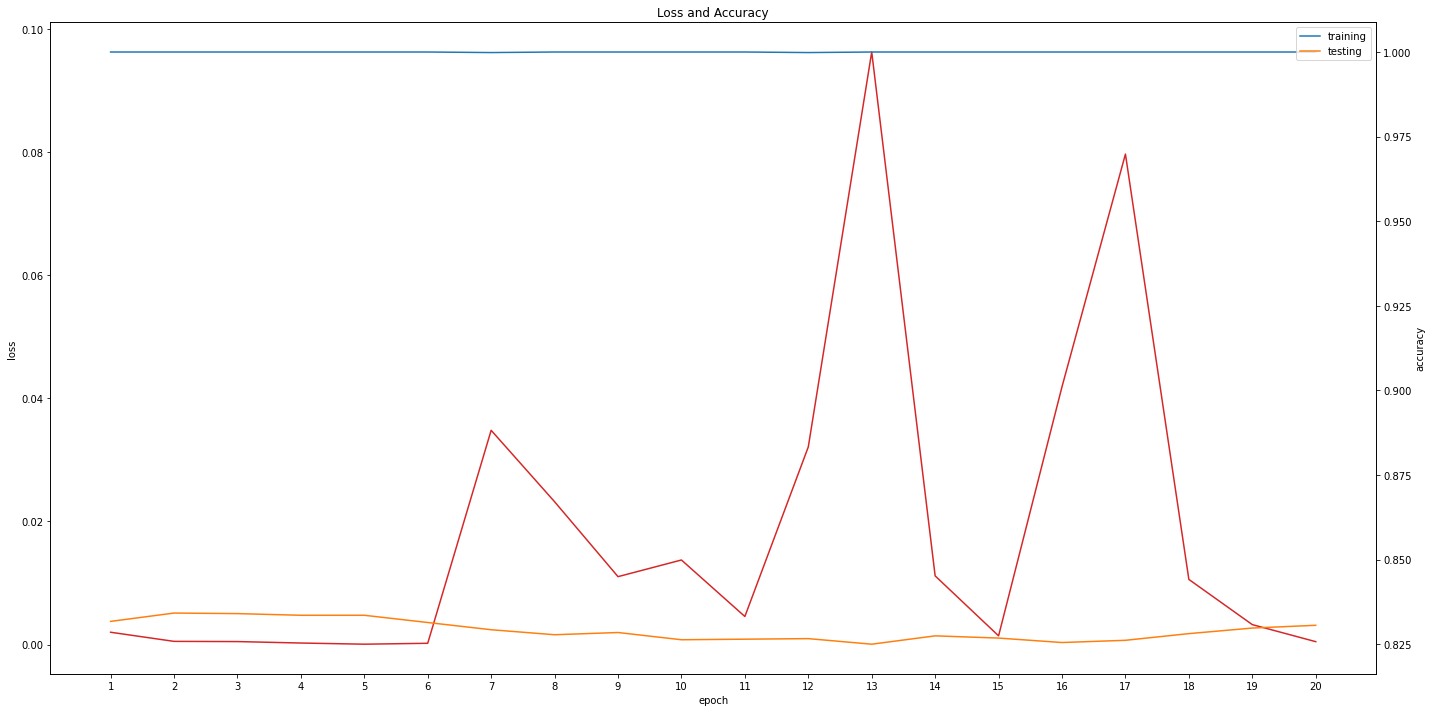

Run 3
--------------------------------------------------------------------------------
X_train has a size: (6120, 64, 64, 3)
y_train has a size: (6120, 1)
X_test has a size: (6085, 64, 64, 3)
y_test has a size: (6085, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 4.479178e-06 Epoch loss: 0.036260184 Training Accuracy: 1.0 Testing Accuracy: 0.8302382908792112 Model Saved!
Epoch #    2 /   20  Batch loss: 4.0529358e-06 Epoch loss: 0.00046633484 Training Accuracy: 1.0 Testing Accuracy: 0.8308956450287592 Model Saved!
Learning Rate decreases from 0.0001 to 5e-05
Epoch #    3 /   20 

In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy","/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug_keras.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy","/content/drive/MyDrive/Deep Learning_Project/caltech101_y_aug_keras.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize_aug", sn_run="run1_2", lr=1e-4, acc_target=0.87, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_2.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize_aug", sn_run="run2_2", lr=1e-4, acc_target=0.87, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_2.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech101_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_resize_aug", sn_run="run3_2", lr=1e-4, acc_target=0.87, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_aug_run1_2.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.1.5 Caltech256 - original train set

#### 4.1.5.1 1st time - 3 runs with target testing accuracy = 39%

Run 1
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 7710	Done!
29089792/29084464 [==============================] - 0s 0us/step
Epoch #    1 / 1000  Batch loss: 4.3558517 Epoch loss: 80.933495 Training Accuracy: 0.03748378728923476 Testing Accuracy: 0.026116958553522297
Epoch #    2 / 1000  Batch loss: 2.916885 Epoch loss: 53.49928 Training Accuracy: 0.08664072632944228 Testing Accuracy: 0.05393719701270909 Model Saved!
Epoch #    3 / 1000  Batch loss: 1.825914 Epoch loss: 34.455814 Training Accuracy: 0.16653696498054474 Testing Accuracy: 0.10756867711927327 Model Saved!
Epoch #    4 / 1000  Batch loss: 1.3053654 Epoch loss: 22.779623 Training Accuracy: 0.15214007782101166 Testing Accuracy: 0.08625584137659956
Learning Rate decreases from 0.001 to 0.0002
Epoch #    5 / 1000  Batch loss: 1.6240008 Epoch loss: 14.760969 Training Accuracy: 0.2773022049286641 Testing Accuracy: 0.1498449578547408 Model Saved!
Epoch #    6 / 1000  B

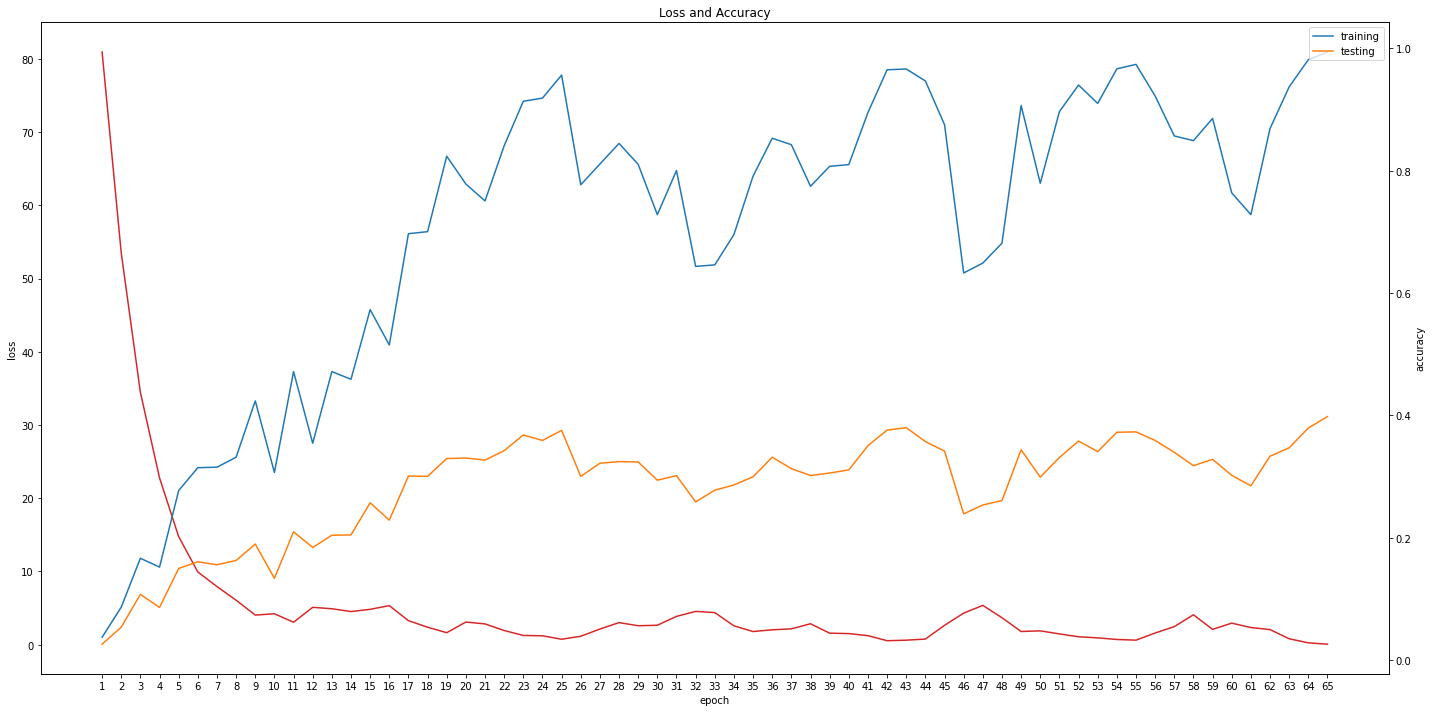

Run 2
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 7710	Done!
Epoch #    1 / 1000  Batch loss: 3.9995391 Epoch loss: 79.194176 Training Accuracy: 0.04928664072632944 Testing Accuracy: 0.028868410708826484
Epoch #    2 / 1000  Batch loss: 2.691254 Epoch loss: 48.473763 Training Accuracy: 0.11634241245136187 Testing Accuracy: 0.06786915316416998 Model Saved!
Epoch #    3 / 1000  Batch loss: 1.5295771 Epoch loss: 28.841919 Training Accuracy: 0.20830090791180286 Testing Accuracy: 0.13543258942219505 Model Saved!
Epoch #    4 / 1000  Batch loss: 1.0748347 Epoch loss: 17.82985 Training Accuracy: 0.2569390402075227 Testing Accuracy: 0.16133117875704242 Model Saved!
Learning Rate decreases from 0.001 to 0.0002
Epoch #    5 / 1000  Batch loss: 0.7183703 Epoch loss: 11.290401 Training Accuracy: 0.29559014267185474 Testing Accuracy: 0.18268768834345112 Model Saved!
Epoch #    6 / 1000  Batch loss: 0.52888215 Epoch loss: 7.57432 Training

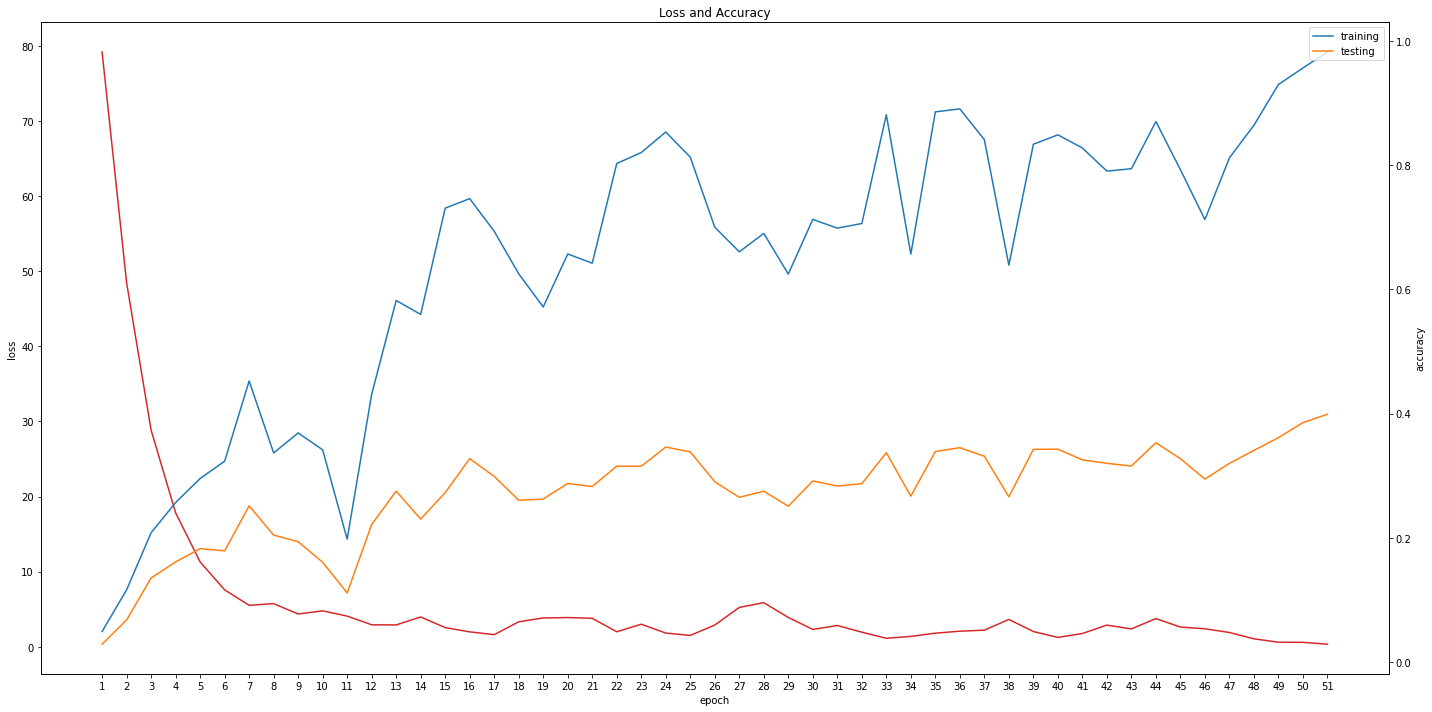

Run 3
--------------------------------------------------------------------------------
Shuffling dataset:   0 > 7710	Done!
Epoch #    1 / 1000  Batch loss: 4.090171 Epoch loss: 80.79871 Training Accuracy: 0.03735408560311284 Testing Accuracy: 0.023540201773158055
Epoch #    2 / 1000  Batch loss: 3.1216915 Epoch loss: 51.436935 Training Accuracy: 0.12918287937743192 Testing Accuracy: 0.07935537406647158 Model Saved!
Epoch #    3 / 1000  Batch loss: 2.6406617 Epoch loss: 32.847004 Training Accuracy: 0.13929961089494164 Testing Accuracy: 0.10315761890203957 Model Saved!
Epoch #    4 / 1000  Batch loss: 1.3298246 Epoch loss: 20.878199 Training Accuracy: 0.12088197146562905 Testing Accuracy: 0.07970476481635148
Learning Rate decreases from 0.001 to 0.0002
Epoch #    5 / 1000  Batch loss: 0.9437024 Epoch loss: 13.422835 Training Accuracy: 0.2814526588845655 Testing Accuracy: 0.16364589247499672 Model Saved!
Epoch #    6 / 1000  Batch loss: 0.5228124 Epoch loss: 7.785549 Training Accuracy: 0.

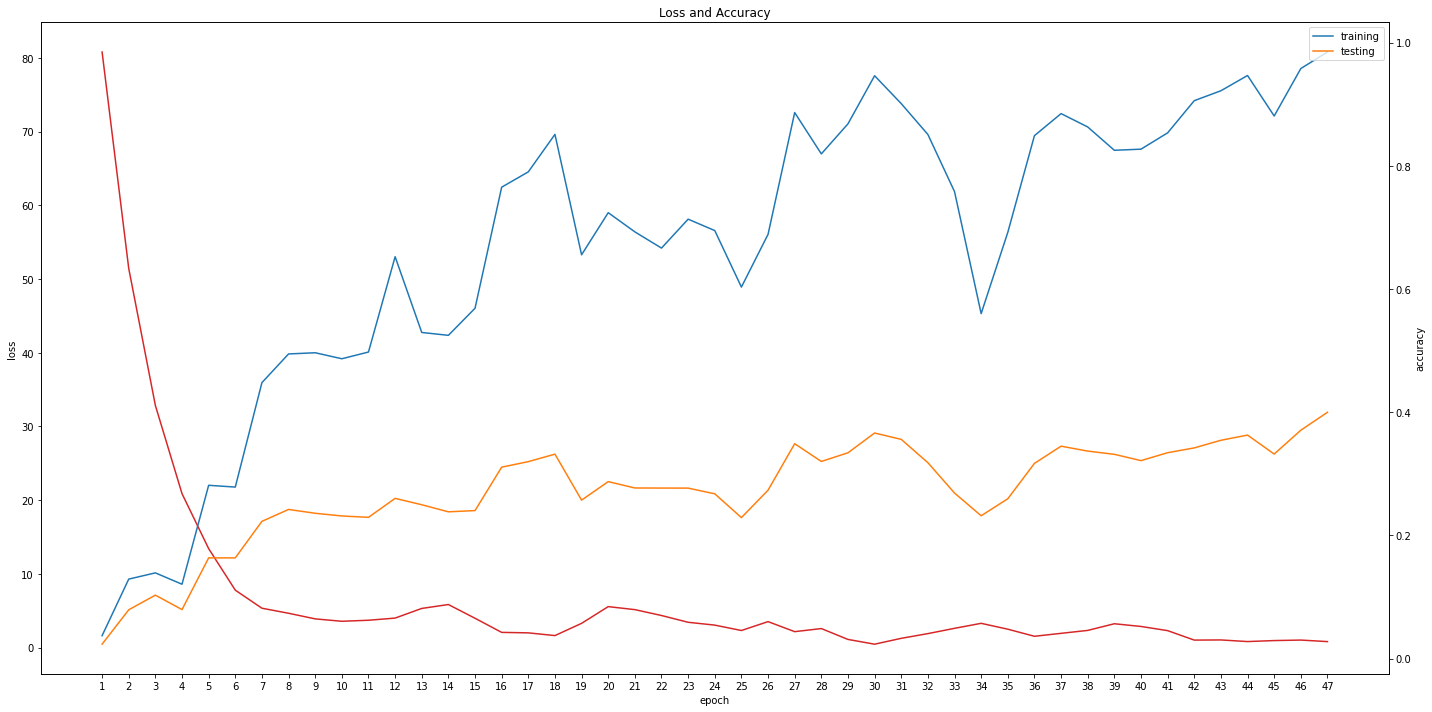

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.9870730652831821
Average Testing  Accuracy: 0.39909158405031225


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train.npy", ""]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech256_run1 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech256_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256", sn_run="run1_1", lr=1e-3, acc_target=0.39, num_epoch=1000)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech256_run2 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech256_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256", sn_run="run2_1", lr=1e-3, acc_target=0.39, num_epoch=1000)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=512)
# get the model 
model_dense121_caltech256_run3 = get_model_transfer_learning_dense121(np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech256_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256", sn_run="run3_1", lr=1e-3, acc_target=0.39, num_epoch=1000)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.1.6 Caltech256 - original train set with resizing from 64x64 to 128x128

#### 4.1.6.1 1st time - 3 runs, no fixed target accuracy

Run 1
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
Epoch #    1 /   20  Batch loss: 4.2013836 Epoch loss: 579.7184 Training Accuracy: 0.08352788586251621 Testing Accuracy: 0.07546840197405774 Model Saved!
Epoch #    2 /   20  Batch loss: 3.0180054 Epoch loss: 394.85013 Training Accuracy: 0.20415045395590142 Testing Accuracy: 0.14429837970039744 Model Saved!
Epoch #    3 /   20  Batch loss: 2.0074513 Epoch loss: 287.60342 Training Accuracy: 0.3743190661478599 Testing Accuracy: 0.2369742761060401 Model Saved!
Epoch #    4 /   20  Batch loss: 1.3078822 Epoch loss: 207.22446 Training Accuracy: 0.4085603112840467 Testing Accuracy: 0.2308162641394069
Epoch #    5 /   20  Batch loss: 1.0706958 Epoch loss: 153.48671 Training Accuracy: 0.5431906614785992 Testing Accuracy: 0.2900379962440494 Model Saved!
Learning Rate decrease

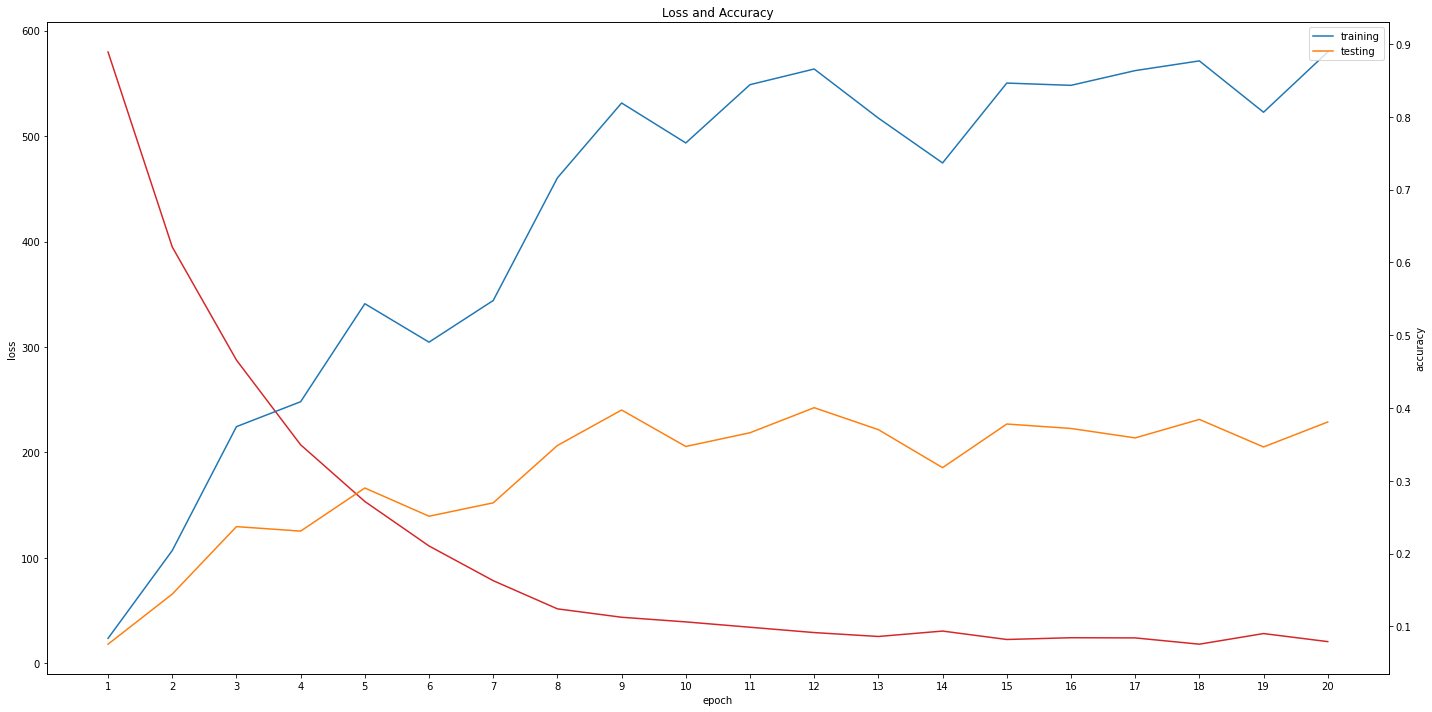

Run 2
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
Epoch #    1 /   20  Batch loss: 4.054903 Epoch loss: 563.087 Training Accuracy: 0.06316472114137484 Testing Accuracy: 0.05454863082499891 Model Saved!
Epoch #    2 /   20  Batch loss: 2.6753747 Epoch loss: 377.75864 Training Accuracy: 0.1345006485084306 Testing Accuracy: 0.11556099052277591 Model Saved!
Epoch #    3 /   20  Batch loss: 1.7343222 Epoch loss: 269.75467 Training Accuracy: 0.4037613488975357 Testing Accuracy: 0.2663667729396864 Model Saved!
Epoch #    4 /   20  Batch loss: 1.123157 Epoch loss: 194.56474 Training Accuracy: 0.47587548638132293 Testing Accuracy: 0.29309516530549856 Model Saved!
Epoch #    5 /   20  Batch loss: 0.9950778 Epoch loss: 137.55324 Training Accuracy: 0.6588845654993515 Testing Accuracy: 0.37699261912040877 Model Saved!
Learning R

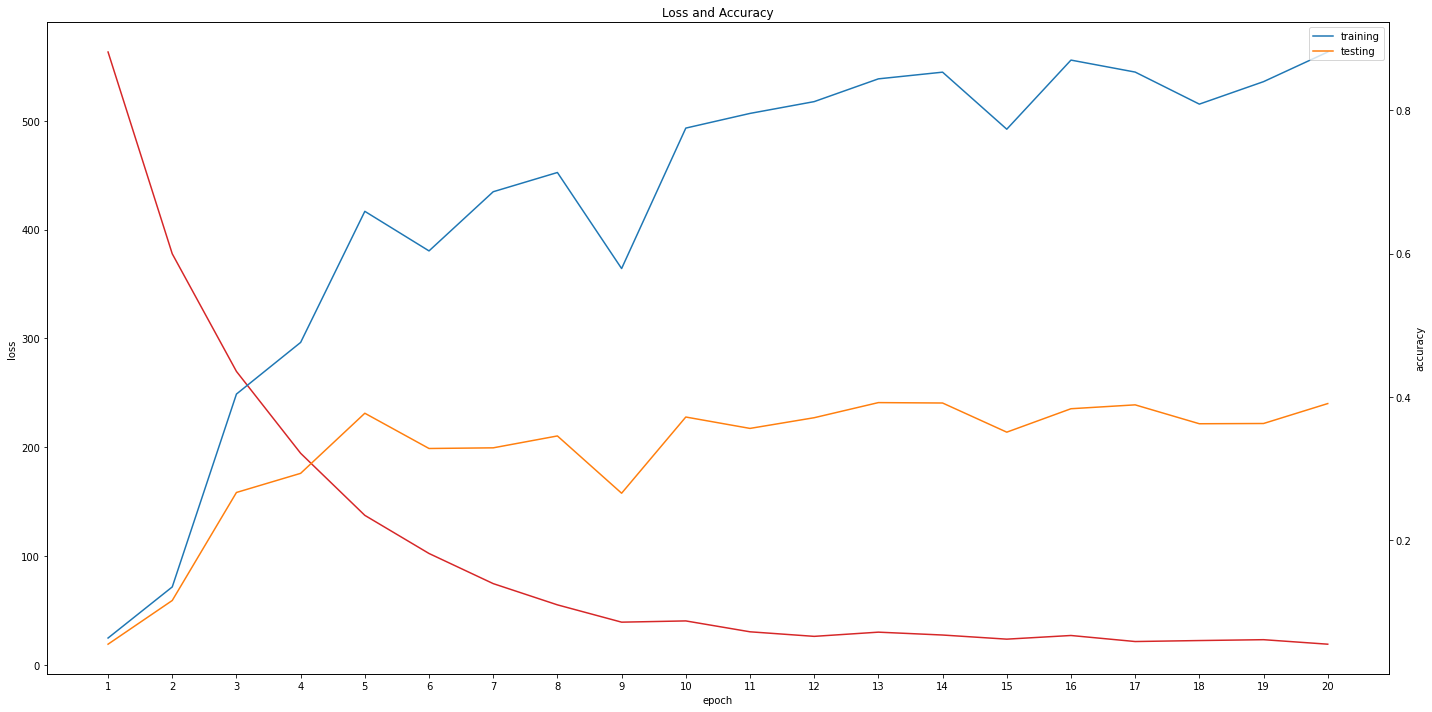

Run 3
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
Epoch #    1 /   20  Batch loss: 4.1873374 Epoch loss: 552.9495 Training Accuracy: 0.08975356679636835 Testing Accuracy: 0.06703935013320522 Model Saved!
Epoch #    2 /   20  Batch loss: 2.1143618 Epoch loss: 361.49258 Training Accuracy: 0.27146562905317767 Testing Accuracy: 0.20932873302179325 Model Saved!
Epoch #    3 /   20  Batch loss: 2.0166545 Epoch loss: 258.30804 Training Accuracy: 0.37029831387808043 Testing Accuracy: 0.22395947067301394 Model Saved!
Epoch #    4 /   20  Batch loss: 1.382059 Epoch loss: 183.82559 Training Accuracy: 0.38352788586251624 Testing Accuracy: 0.23815346988688474 Model Saved!
Epoch #    5 /   20  Batch loss: 1.4349681 Epoch loss: 131.6425 Training Accuracy: 0.6106355382619975 Testing Accuracy: 0.31833864698432107 Model Saved!
Learni

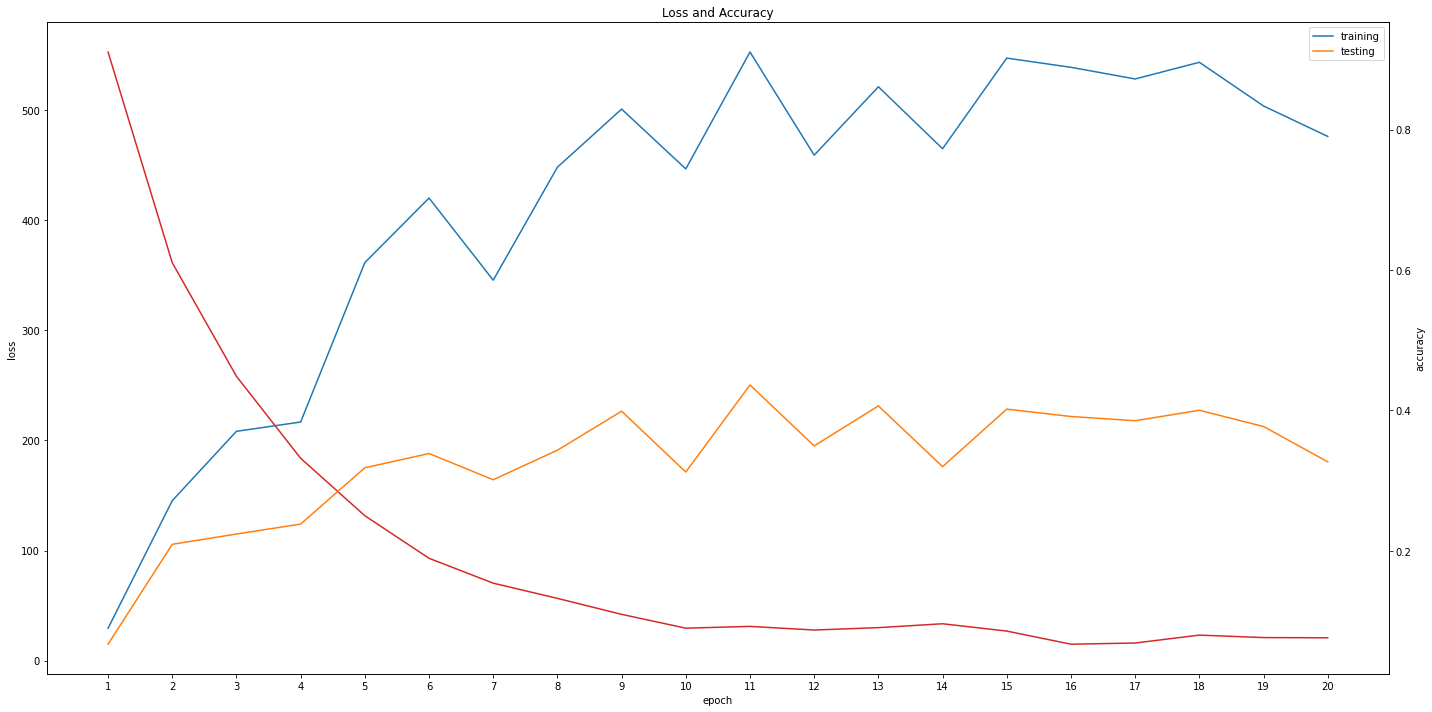

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.8733679204496325
Average Testing  Accuracy: 0.4095150747550625


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech256_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=20)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech256_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=20)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech256_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=20)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

#### 4.1.6.2 2nd time - 3 runs target accuracy:48%

Run 1
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.0016547942 Epoch loss: 4.122511 Training Accuracy: 0.9998702983138781 Testing Accuracy: 0.4810237148971481 Model Saved!
Training time:152.855426 seconds



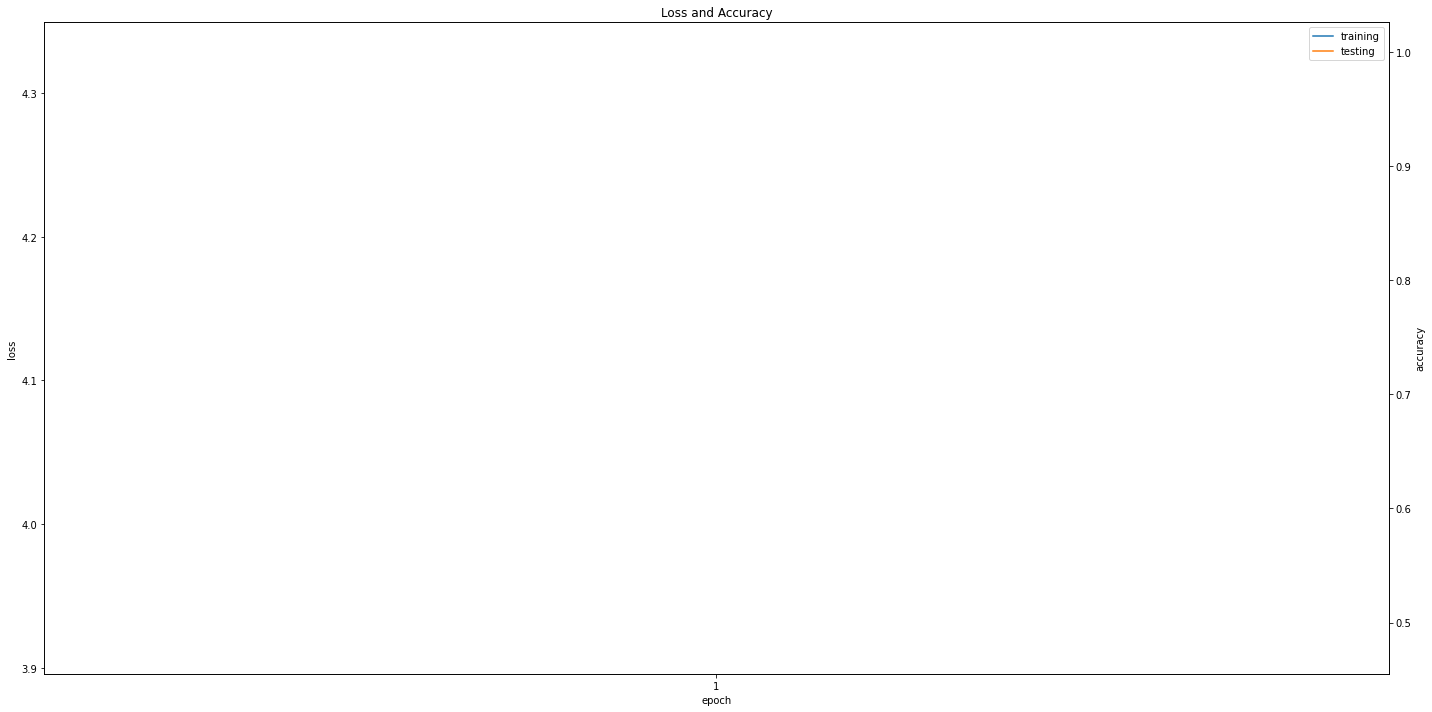

Run 2
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.009702954 Epoch loss: 0.45375383 Training Accuracy: 0.9998702983138781 Testing Accuracy: 0.4877494868323361 Model Saved!
Training time:155.472715 seconds



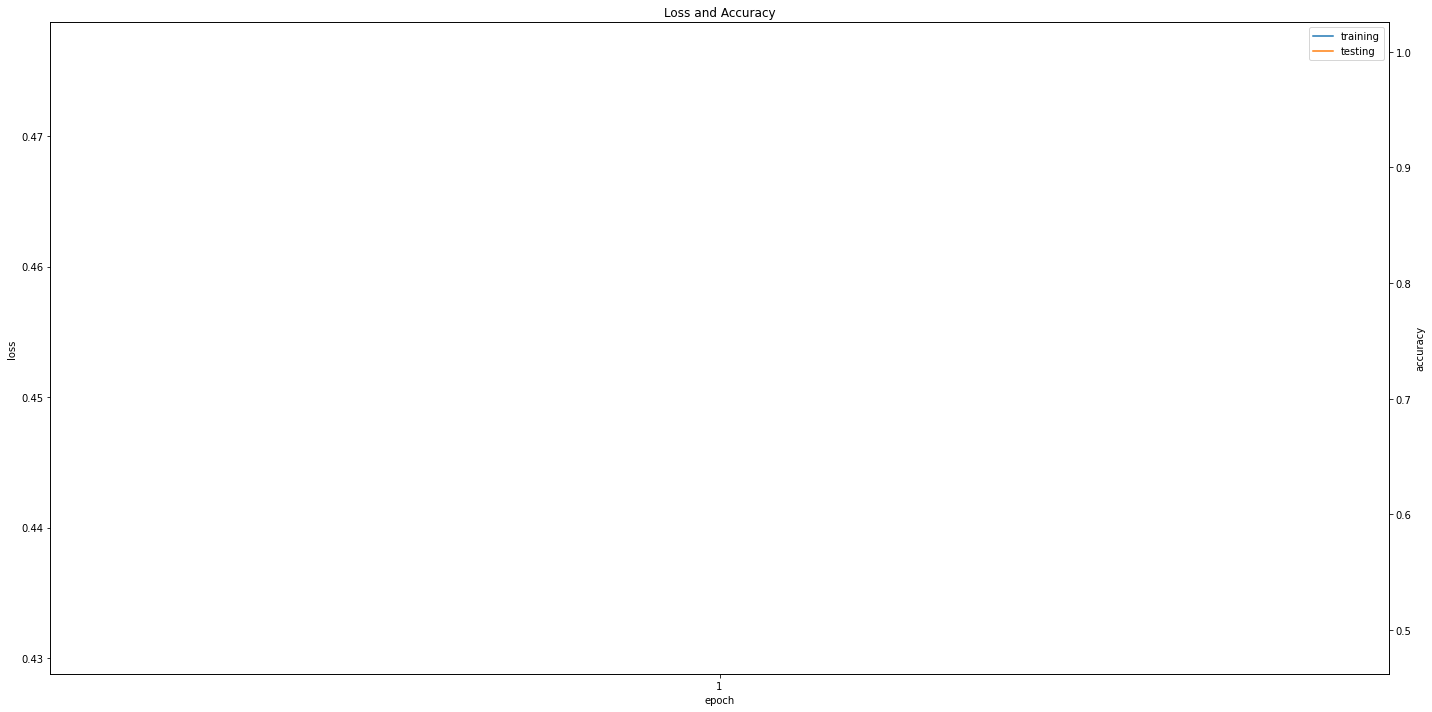

Run 3
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_2.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.00019257222 Epoch loss: 0.47956488 Training Accuracy: 0.9998702983138781 Testing Accuracy: 0.48857928986330085 Model Saved!
Training time:153.164700 seconds



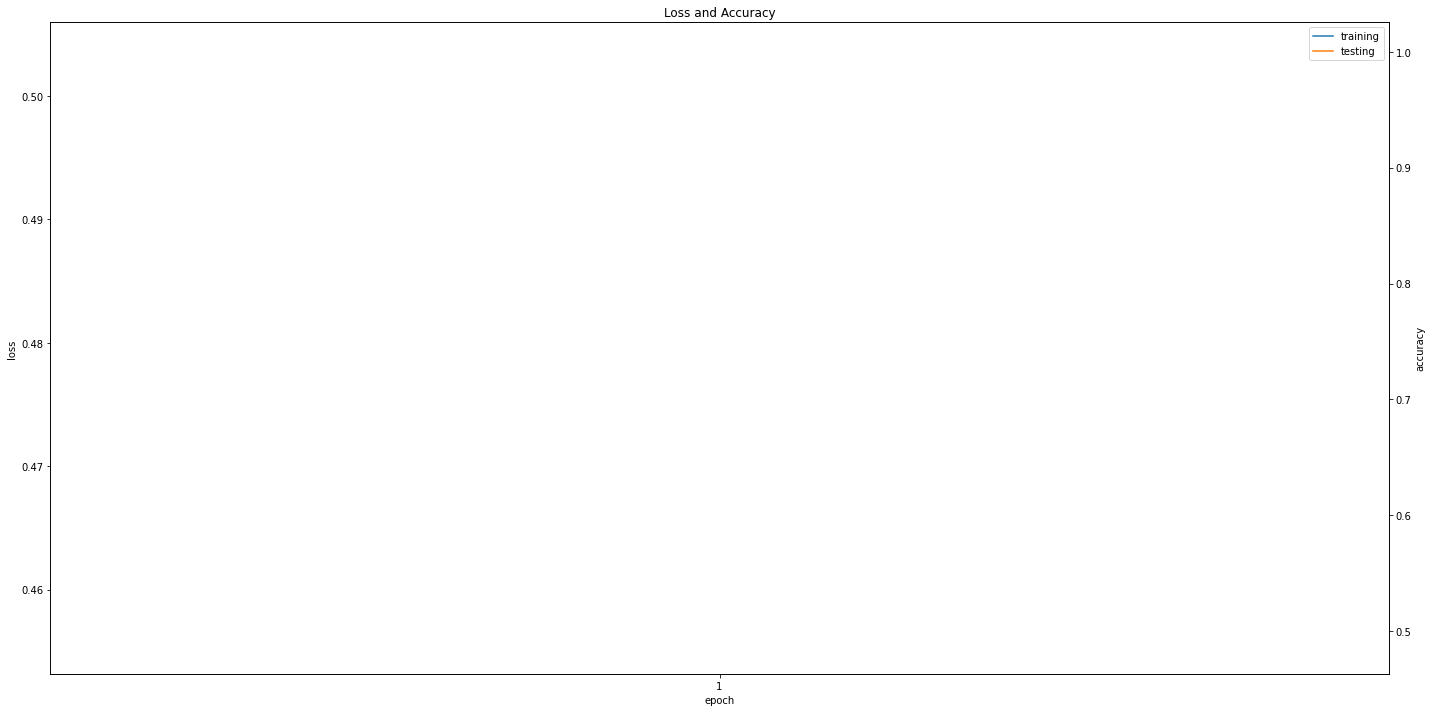

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 0.9998702983138781
Average Testing  Accuracy: 0.4857841638642617


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech256_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run1_2", lr=1e-4, acc_target=0.44, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_2.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech256_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run2_2", lr=1e-4, acc_target=0.44, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_2.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech256_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run3_2", lr=1e-4, acc_target=0.44, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_2.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

#### 4.1.6.3 3rd time - 3 runs target accuracy: 50.5%

Run 1
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_3.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 1.3080242e-05 Epoch loss: 0.071588576 Training Accuracy: 0.9998702983138781 Testing Accuracy: 0.5080578241691052 Model Saved!
Training time:153.301189 seconds



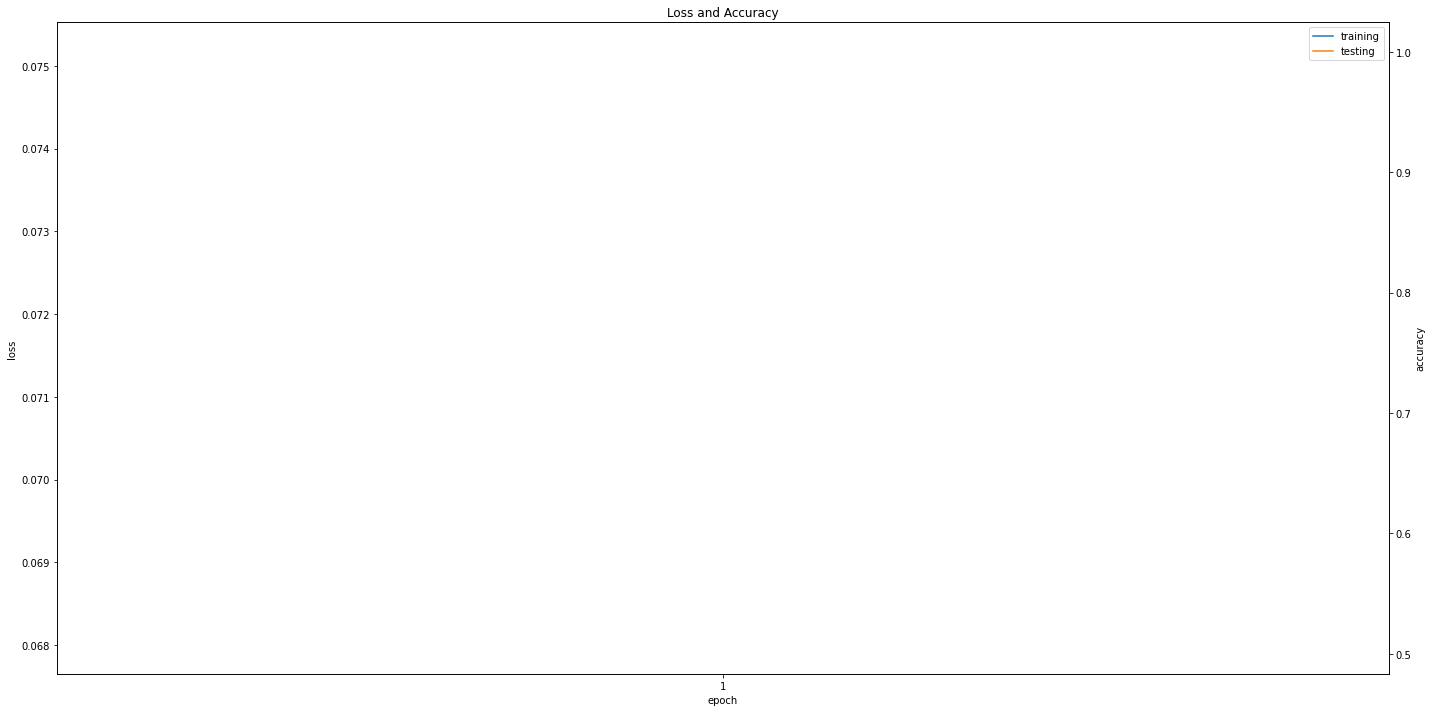

Run 2
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_3.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 2.4018234e-05 Epoch loss: 0.076227404 Training Accuracy: 0.9998702983138781 Testing Accuracy: 0.5063545442634406 Model Saved!
Training time:154.100344 seconds



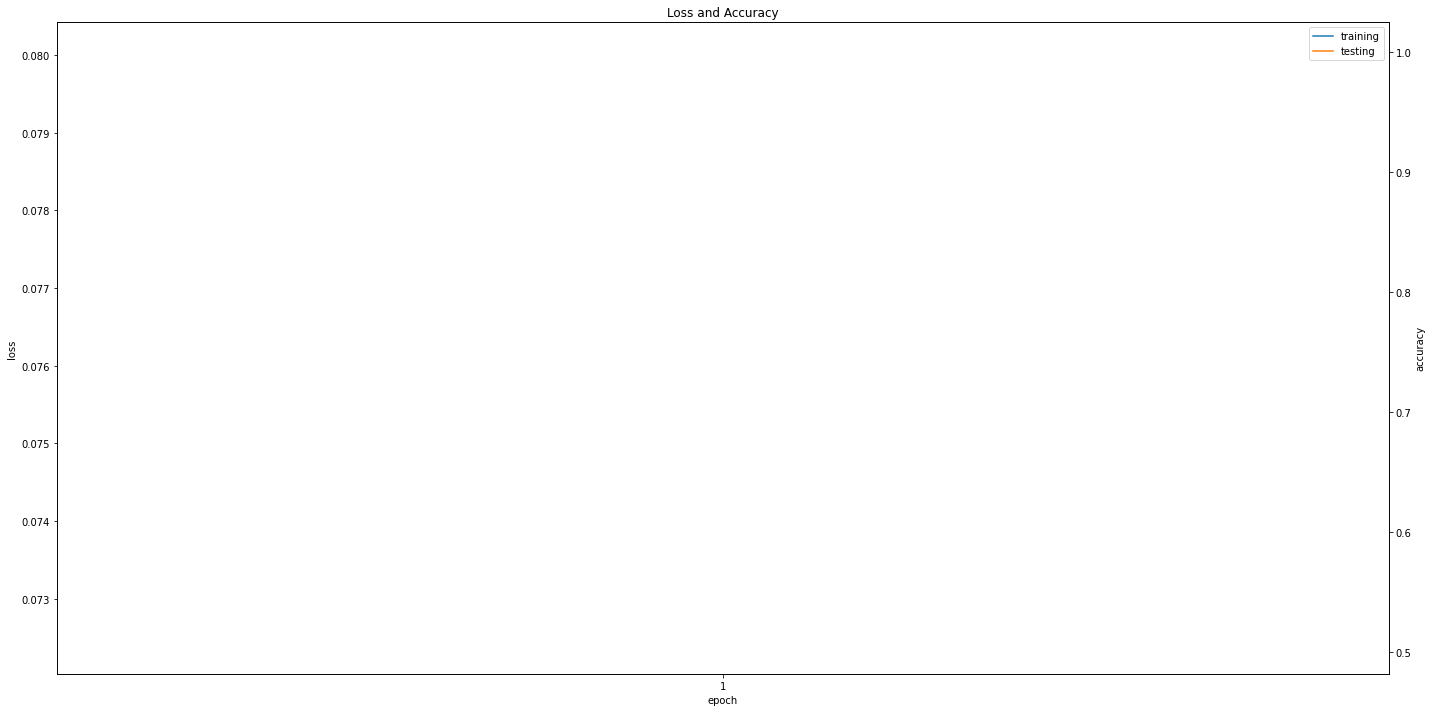

Run 3
--------------------------------------------------------------------------------
X_train has a size: (7710, 64, 64, 3)
y_train has a size: (7710, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_3.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.00021689576 Epoch loss: 0.092959024 Training Accuracy: 0.9998702983138781 Testing Accuracy: 0.5039088090142814 Model Saved!
Epoch #    2 /   20  Batch loss: 0.0070628477 Epoch loss: 0.06098588 Training Accuracy: 0.9998702983138781 Testing Accuracy: 0.5055684150762109 Model Saved!
Training time:306.186635 seconds



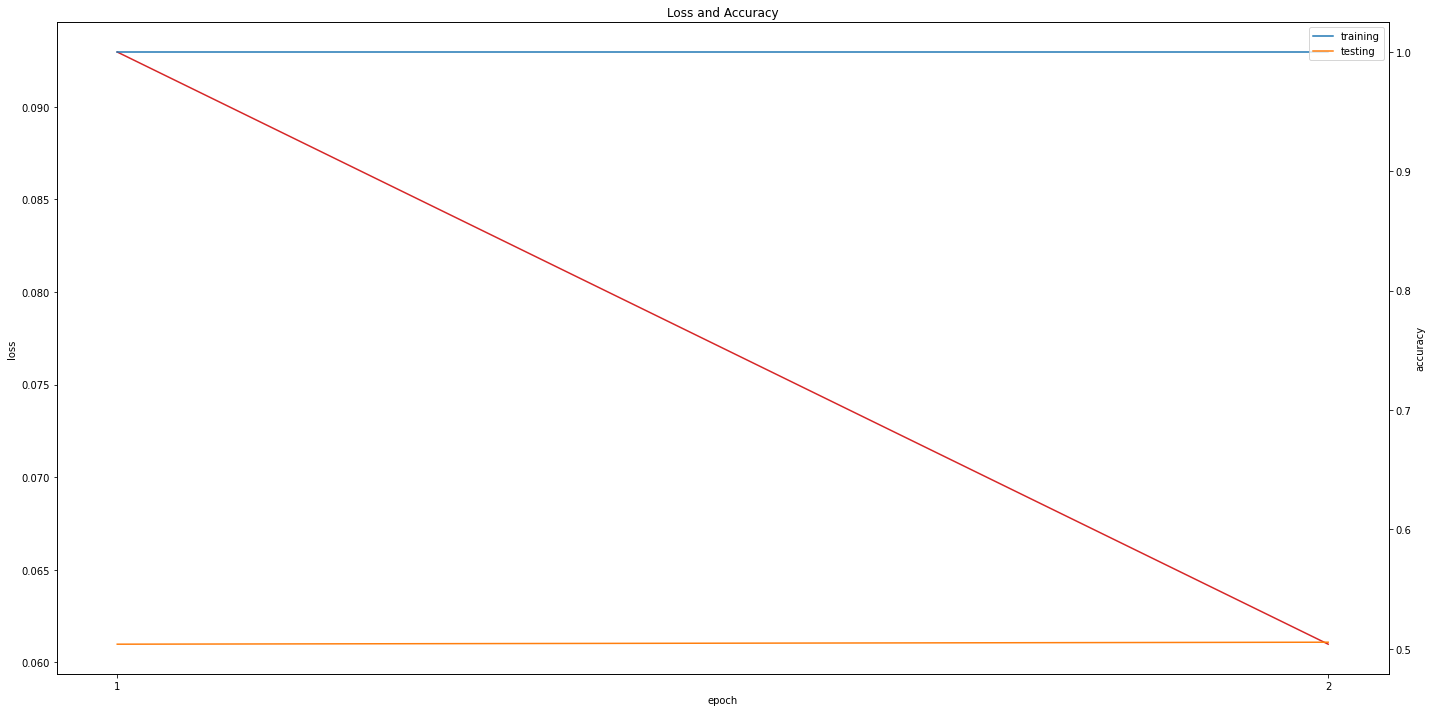

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 0.9998702983138781
Average Testing  Accuracy: 0.5066602611695856


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech256_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run1_3", lr=1e-4, acc_target=0.505, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_3.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech256_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run2_3", lr=1e-4, acc_target=0.505, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_3.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech256_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize", sn_run="run3_3", lr=1e-4, acc_target=0.505, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_3.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.1.7 Caltech256 - original train set with augmented data by Keras, based on 4.1.6 best saved model

#### 4.1.7.1 1st time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (15420, 64, 64, 3)
y_train has a size: (15420, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
29089792/29084464 [==============================] - 0s 0us/step
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_aug_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.29153413 Epoch loss: 25.176888 Training Accuracy: 0.9479896238651102 Testing Accuracy: 0.44180460322312964 Model Saved!
Epoch #    2 /   20  Batch loss: 0.0855927 Epoch loss: 26.813322 Training Accuracy: 0.9527885862516212 Testing Accuracy: 0.4362580250687863
Epoch #    3 /   20  Batch loss: 0.18412536 Epoch loss: 25.11656 Training Accuracy: 0.9722438391699092 Testing Accuracy: 0.43551556972529154
Epoch #    4 /   20  Batch loss: 0.09559271 Epoch loss: 15.908365 Training Accuracy: 0.9669909208819715 Testing Accuracy: 0.4381360003493

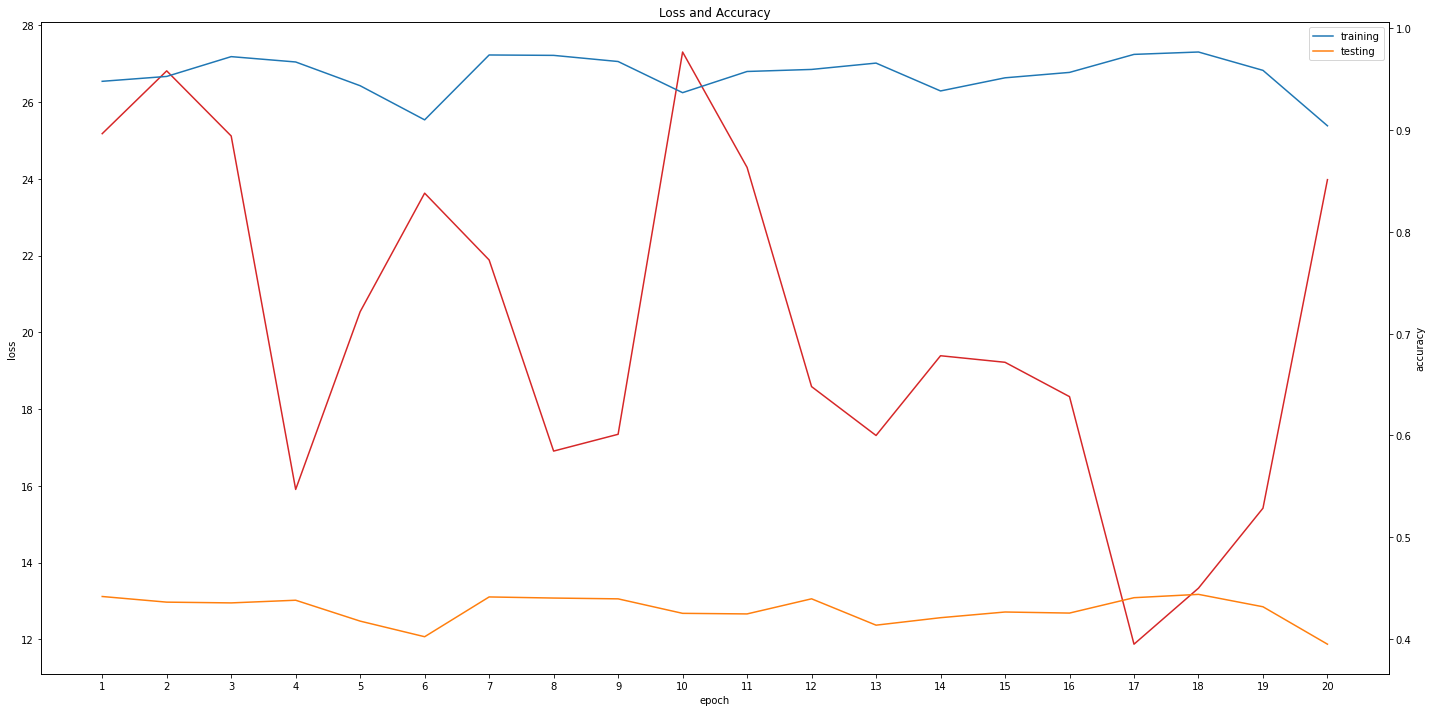

Run 2
--------------------------------------------------------------------------------
X_train has a size: (15420, 64, 64, 3)
y_train has a size: (15420, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_aug_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.40441015 Epoch loss: 19.912626 Training Accuracy: 0.9180285343709468 Testing Accuracy: 0.3982617810193475 Model Saved!
Epoch #    2 /   20  Batch loss: 0.11372661 Epoch loss: 22.719097 Training Accuracy: 0.9309987029831388 Testing Accuracy: 0.41774031532515177 Model Saved!
Epoch #    3 /   20  Batch loss: 0.04699928 Epoch loss: 16.72198 Training Accuracy: 0.9525291828793774 Testing Accuracy: 0.42822203782154866 Model Saved!
Epoch #    4 /   20  Batch loss: 0.15349434 Epoch loss: 18.267094 Training Accuracy: 0.9513618677042801 Testing Accuracy: 0.4213215705114207
Epoch #    5 /   20  Batch loss: 0

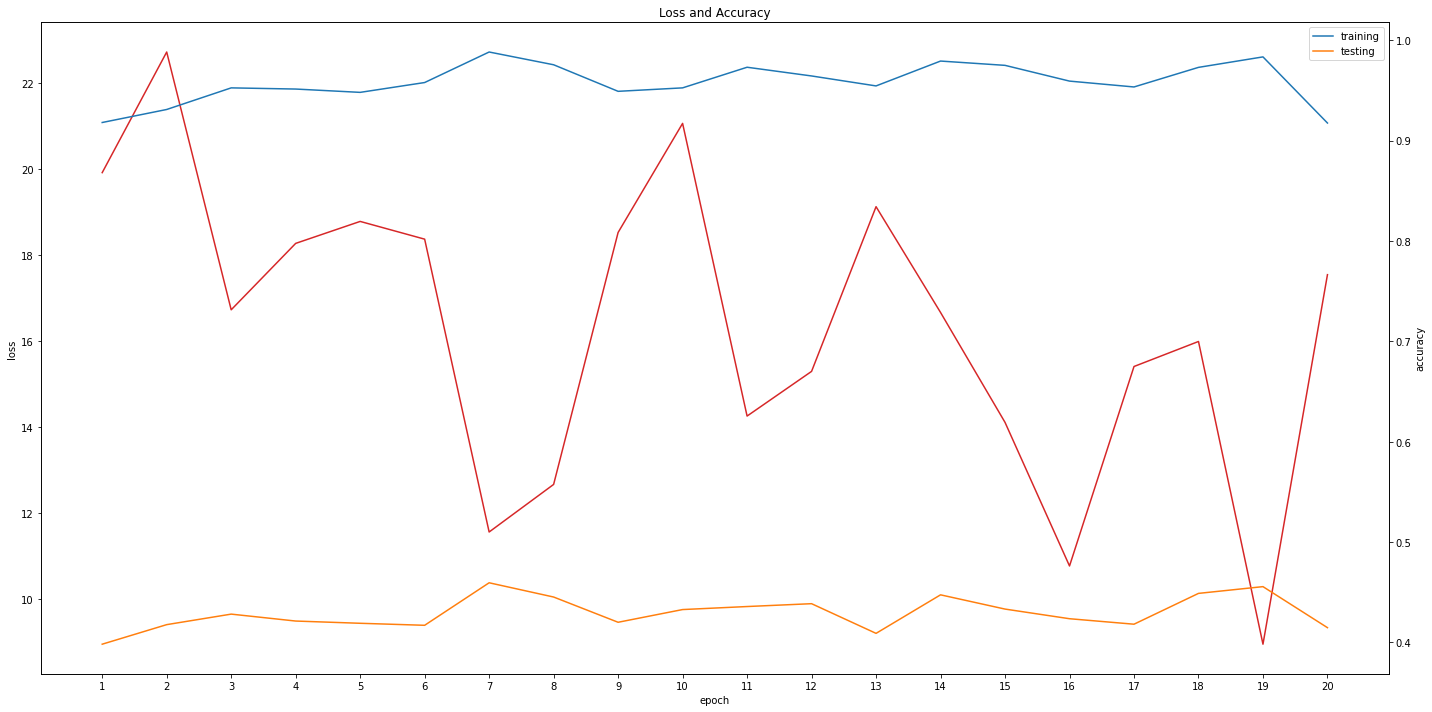

Run 3
--------------------------------------------------------------------------------
X_train has a size: (15420, 64, 64, 3)
y_train has a size: (15420, 1)
X_test has a size: (22897, 64, 64, 3)
y_test has a size: (22897, 1)
/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_aug_run1_1.h5 loaded. Continue training.
Epoch #    1 /   20  Batch loss: 0.15699524 Epoch loss: 24.465025 Training Accuracy: 0.943450064850843 Testing Accuracy: 0.4273485609468489 Model Saved!
Epoch #    2 /   20  Batch loss: 0.017876757 Epoch loss: 20.554043 Training Accuracy: 0.9760700389105058 Testing Accuracy: 0.43874743416168055 Model Saved!
Epoch #    3 /   20  Batch loss: 0.04602621 Epoch loss: 12.295177 Training Accuracy: 0.9603112840466926 Testing Accuracy: 0.4294885792898633
Epoch #    4 /   20  Batch loss: 0.14750071 Epoch loss: 13.889024 Training Accuracy: 0.9763294422827496 Testing Accuracy: 0.4482246582521728 Model Saved!
Epoch #    5 /   20  Batch loss: 0

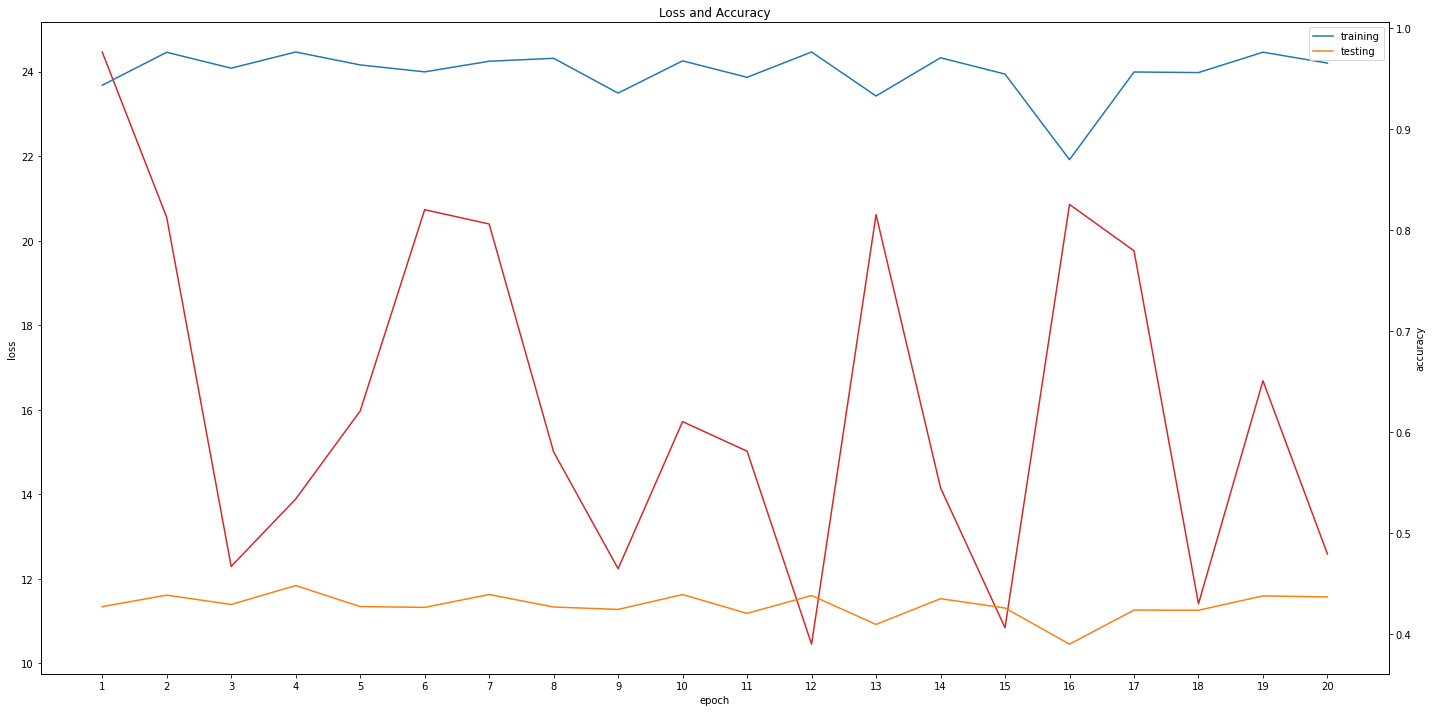

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 0.9804582792909642
Average Testing  Accuracy: 0.4505248140222154


In [9]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train.npy","/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug_keras.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy","/content/drive/MyDrive/Deep Learning_Project/caltech256_y_aug_keras.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run1 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_transfer_learning(model_dense121_caltech256_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize_aug", sn_run="run1_1", lr=1e-3, acc_target=0.7, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_aug_run1_1.h5")

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run2 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_transfer_learning(model_dense121_caltech256_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize_aug", sn_run="run2_1", lr=1e-3, acc_target=0.7, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_aug_run1_1.h5")

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=64,shuffle_by_row=False)
# get the model 
model_dense121_caltech256_run3 = get_model_transfer_learning_dense121(X_train.shape[1:],np.unique(y_train).shape[0],resize=True)
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_transfer_learning(model_dense121_caltech256_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_resize_aug", sn_run="run3_1", lr=1e-3, acc_target=0.7, num_epoch=20, \
                                                              best_model_path="/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_aug_run1_1.h5")

print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

## 4.2 Feature Extraction by VGG16 + NN classifier

In [ ]:
# method to get the model for train and test
def get_model_nn(input_shape,num_category):
  model = Sequential()
  model.add(Dense(64, input_dim = input_shape, activation='relu'))
  model.add(Dense(32, activation='relu'))
  # model.add(Dense(32, activation='relu'))
  model.add(Dense(num_category, activation='softmax'))
  model.summary()
  return model

# load the saved datasets
def prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path, batch_size=256,shuffle_by_row=True):
  X_train = np.load(X_train_path[0]) if len(X_train_path) == 1 else np.vstack((np.load(X_train_path[0]),np.load(X_train_path[1])))
  y_train = np.load(y_train_path[0]) if len(y_train_path) == 1 else np.vstack((np.load(y_train_path[0]),np.load(y_train_path[1])))
  X_test = np.load(X_test_path[0]) if len(X_test_path) == 1 else np.vstack((np.load(X_test_path[0]),np.load(X_test_path[1])))  
  y_test = np.load(y_test_path[0]) if len(y_test_path) == 1 else np.vstack((np.load(y_test_path[0]),np.load(y_test_path[1])))
  print("X_train has a size:",X_train.shape)
  print("y_train has a size:",y_train.shape)
  print("X_test has a size:",X_test.shape)
  print("y_test has a size:",y_test.shape)

  # shuffle the train dataset
  if shuffle_by_row == True:
    X_train, y_train = shuffle_by_row(X_train, y_train)
  else:
    np.random.seed(1234)
    np.random.shuffle(X_train)
    np.random.seed(1234)
    np.random.shuffle(y_train)

  # Prepare the training dataset.
  train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
  train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

  return train_dataset, X_train, y_train, X_test, y_test

# method to shuffle X and y 
def shuffle_by_row(X,y):
  import random
  row_num = [i for i in range(X.shape[0])]

  X_ = np.zeros_like(X)
  y_ = np.zeros_like(y)

  print("Shuffling dataset: ",end="")

  r_n = 0
  while len(row_num)>0:
    r_idx = random.randint(0, len(row_num)-1)
    X_[r_n] = X[row_num[r_idx]]
    y_[r_n] = y[row_num[r_idx]]
    row_num.remove(row_num[r_idx])
    if r_n % 10000 == 0:
      if r_n == 0:
        print("  %d"%(r_n), end="")
      else:
        print(" > %d"%(r_n), end="")
    r_n += 1
  print(" > %d\tDone!"%(r_n))
  return X_, y_

# plot loss and accuracies
def plot_loss_acc(acc_tr,acc_te,loss,fig_w,fig_h):
  ep = [i for i in range(1,len(acc_tr)+1,1)]
  
  fig, ax1 = plt.subplots(figsize=(fig_w, fig_h))
  ax1.plot(ep, loss, color='tab:red')
  ax1.set_title('Loss and Accuracy')
  ax1.set_xticks(ep)
  ax1.set_xlabel('epoch')
  ax1.set_ylabel('loss')
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
  ax2.plot(ep, acc_tr)
  ax2.plot(ep, acc_te)
  ax2.set_ylabel('accuracy')  # we already handled the x-label with ax1
  ax2.legend(['training', 'testing'], loc='upper right')
  ax2.tick_params(axis='y')

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

# train the model and save loss and accuracies
def train_and_test_nn(model, train_dataset, x_train, y_train, X_test, y_test, dataset_type="cifar10", sn_run="run1", lr=1e-3, acc_target=0.9, num_epoch=1000):
  loss = []
  acc_tr = []
  acc_te = []
  acc_tr_best = 0
  acc_te_best = 0

  # lr = 1e-3     # initial learning rate
  num_cnt = 0   # counter to update learning rate

  # if the previous model is saved, load it
  if os.path.exists("/content/drive/MyDrive/Deep Learning_Project/model_nn_"+dataset_type+"_"+sn_run[0:-1]+str(int(sn_run[-1])-1)+".h5"):
    model = load_model("/content/drive/MyDrive/Deep Learning_Project/model_nn_"+dataset_type+"_"+sn_run[0:-1]+str(int(sn_run[-1])-1)+".h5")
    print("/content/drive/MyDrive/Deep Learning_Project/model_nn_"+dataset_type+"_"+sn_run[0:-1]+str(int(sn_run[-1])-1)+".h5 loaded. Continue training.")

  time_st = time.time()

  # Instantiate an optimizer.
  optimizer = keras.optimizers.Adam(learning_rate=lr)

  # Instantiate a loss function.
  loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

  for epoch in range(num_epoch):
      epoch_loss = 0
      print("Epoch # {:4d} / {:4d} ".format(epoch+1,num_epoch),end="")
      
      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

          # Open a GradientTape to record the operations run during the forward pass, which enables auto-differentiation.
          with tf.GradientTape(persistent=True) as tape:

              # Run the forward pass of the layer. The operations that the layer applies to its inputs are going to be recorded on the GradientTape.
              logits = model(x_batch_train, training=True)  # Logits for this minibatch

              # Compute the loss value for this minibatch.
              loss_value = loss_fn(y_batch_train, logits)
          
          # update epoch loss
          epoch_loss += loss_value
          
          # Use the gradient tape to automatically retrieve the gradients of the trainable variables with respect to the loss.
          grads = tape.gradient(loss_value, model.trainable_weights)

          # update weights
          optimizer.apply_gradients(zip(grads, model.trainable_weights))

      loss.append(epoch_loss)

      # output the current training, validation, testing accuracies
      y_pred = model.predict(x_train)
      y_pred_classes = [np.argmax(y_p) for y_p in y_pred]
      train_accuracy = accuracy_score(y_train, y_pred_classes)
      acc_tr.append(train_accuracy)
      
      y_pred = model.predict(X_test)
      y_pred_classes = [np.argmax(y_p) for y_p in y_pred]
      test_accuracy = accuracy_score(y_test, y_pred_classes)
      acc_te.append(test_accuracy)
      
       # temporarily store the log content
      print(" Batch loss: " + str(loss_value.numpy()) + \
            " Epoch loss: " + str(epoch_loss.numpy()) + \
            " Training Accuracy: " + str(train_accuracy) + \
            " Testing Accuracy: " + str(test_accuracy), end="")

      # save the trained model at best testing accuracy
      if acc_te_best < test_accuracy:
        if acc_te_best != 0:
          model.save("/content/drive/MyDrive/Deep Learning_Project/model_nn_"+dataset_type+"_"+sn_run+".h5")
          print(" Model Saved!", end="")
        acc_te_best = test_accuracy
        acc_tr_best = train_accuracy
      print()     
      
      # stop the training if test_accuracy is better than 85%
      if test_accuracy >= acc_target:
        break
      
      if epoch == 0:
        pre_loss = epoch_loss

      if epoch_loss < 0.3*pre_loss:  # if the loss value becomes 0.3 times of the previous recorded value
        print("Learning Rate decreases from " + str(lr),end="")
        lr *= 0.5 
        pre_loss = epoch_loss
        num_cnt = 0
        print(" to " + str(lr))
      
      if epoch_loss > 1.5*pre_loss:  # if the loss value is larger than 0.5 times of 'pre_loss' for 3 epochs
        if num_cnt == 10:
          print("Learning Rate increases from " + str(lr),end="")
          lr *= 2
          pre_loss = epoch_loss
          num_cnt = 0
          print(" to " + str(lr))
        else:
          num_cnt += 1
      
      # try to fix the learning rate when the testing accuracy comes close to the target
      if lr < 1e-7:
        lr = 1e-7
        print("Learning Rate adjusted to " + str(lr))
      if epoch_loss < 0.5 and train_accuracy > 0.99 and test_accuracy > 0.9:
        lr = 1e-8
        # print("Learning Rate fixed to %0.9f when very close to the target"%(lr))
        print("Learning Rate fixed to " + str(lr) + " when very close to the target") 
      
  print("Training time:%f seconds\n"%(time.time()-time_st))

  # plot the loss and accuracies during training
  plot_loss_acc(acc_tr,acc_te,loss,20,10)
  
  return acc_tr_best, acc_te_best


### 4.2.1 Cifar10 - original train set

#### 4.2.1.1 1st time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (50000, 4096)
y_train has a size: (50000, 1)
X_test has a size: (10000, 4096)
y_test has a size: (10000, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                330       
Total params: 264,618
Trainable params: 264,618
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 2.266703 Epoch loss: 58.500736 Training Accuracy: 0.153 Test

Run 2
--------------------------------------------------------------------------------
X_train has a size: (50000, 4096)
y_train has a size: (50000, 1)
X_test has a size: (10000, 4096)
y_test has a size: (10000, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                330       
Total params: 264,618
Trainable params: 264,618
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 2.2387455 Epoch loss: 57.450703 Training Accuracy: 0.16674 T

Run 3
--------------------------------------------------------------------------------
X_train has a size: (50000, 4096)
y_train has a size: (50000, 1)
X_test has a size: (10000, 4096)
y_test has a size: (10000, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000	Done!
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                330       
Total params: 264,618
Trainable params: 264,618
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 2.266271 Epoch loss: 59.231514 Training Accuracy: 0.18782 Te

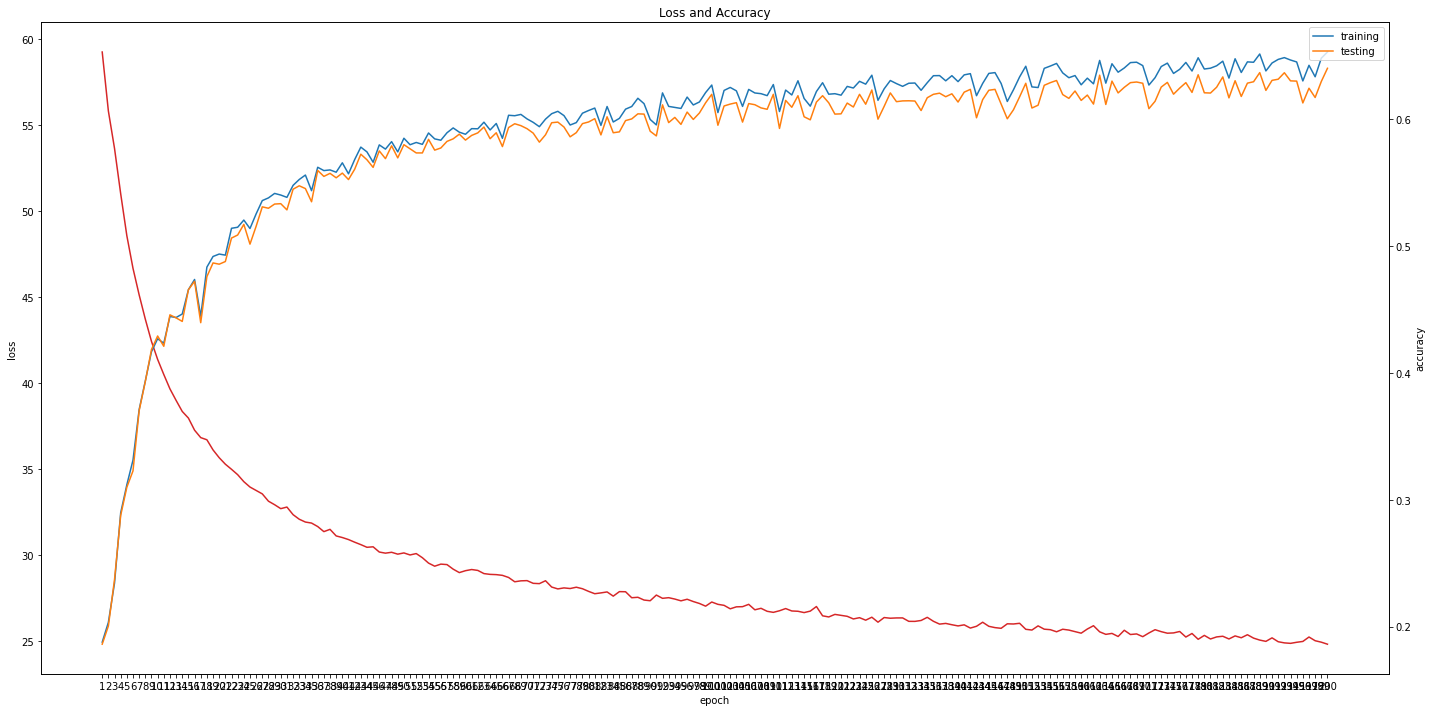

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.6516466666666667
Average Testing  Accuracy: 0.6364666666666666


In [ ]:
X_train_path = ["/content/drive/MyDrive/Colab Notebooks/data/dl_a3_dataset_p1/dl_a3_X_train_extracted_p1.npy"]
y_train_path = ["/content/drive/MyDrive/Colab Notebooks/data/dl_a2_dataset_p1/dl_a2_y_train_p2.npy"]
X_test_path = ["/content/drive/MyDrive/Colab Notebooks/data/dl_a3_dataset_p1/dl_a3_X_test_extracted_p1.npy"]
y_test_path = ["/content/drive/MyDrive/Colab Notebooks/data/dl_a2_dataset_p1/dl_a2_y_test_p2.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_cifar10_run1 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_nn(model_nn_cifar10_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_cifar10_run2 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_nn(model_nn_cifar10_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_cifar10_run3 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_nn(model_nn_cifar10_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="cifar10", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.2.2 Caltech101 - original train set

#### 4.2.2.1 1st time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (3060, 4096)
y_train has a size: (3060, 1)
X_test has a size: (6085, 4096)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 3060	Done!
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 102)               3366      
Total params: 267,654
Trainable params: 267,654
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 4.685436 Epoch loss: 9.403083 Training Accuracy: 0.00980392156862745 Testing Accuracy: 0.00755957

Run 2
--------------------------------------------------------------------------------
X_train has a size: (3060, 4096)
y_train has a size: (3060, 1)
X_test has a size: (6085, 4096)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 3060	Done!
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 102)               3366      
Total params: 267,654
Trainable params: 267,654
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 4.687479 Epoch loss: 9.392255 Training Accuracy: 0.012091503267973857 Testing Accuracy: 0.0085456

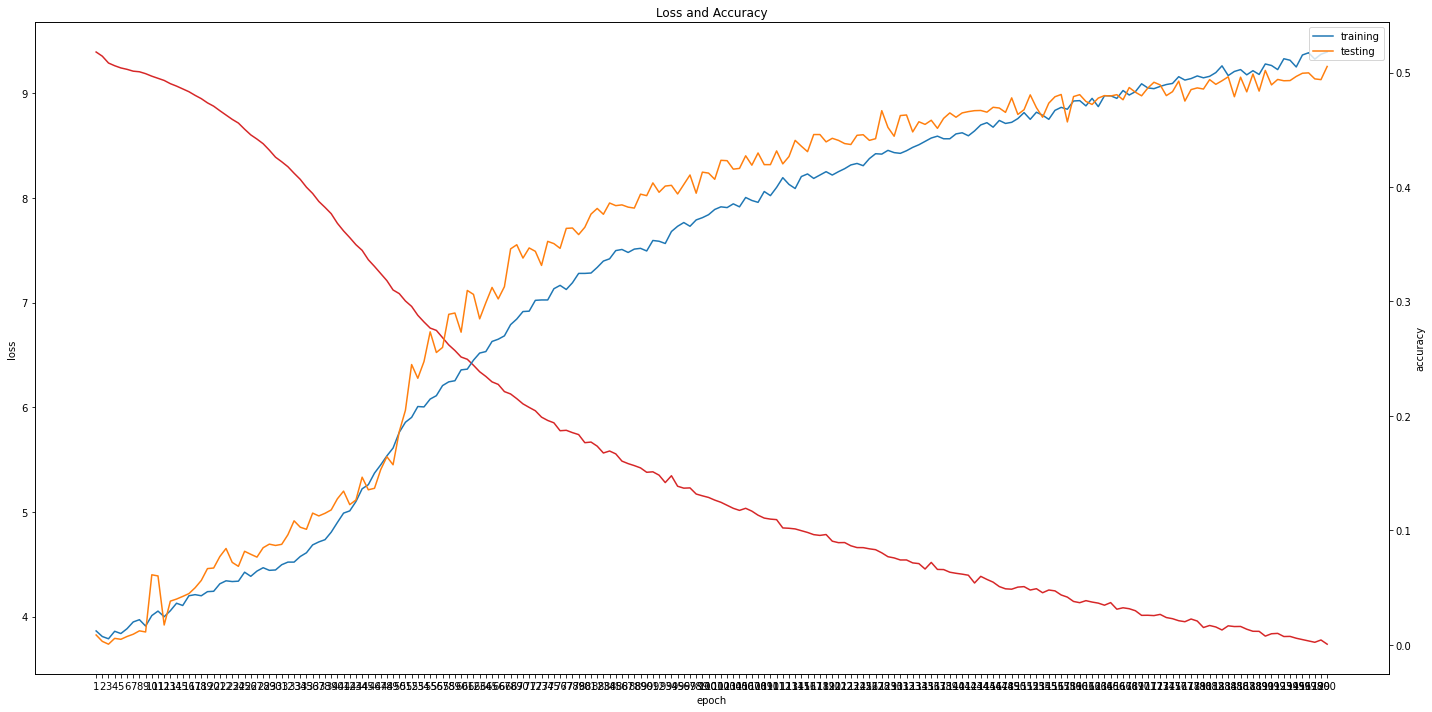

Run 3
--------------------------------------------------------------------------------
X_train has a size: (3060, 4096)
y_train has a size: (3060, 1)
X_test has a size: (6085, 4096)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 3060	Done!
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_60 (Dense)             (None, 102)               3366      
Total params: 267,654
Trainable params: 267,654
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 4.6990314 Epoch loss: 9.368642 Training Accuracy: 0.013398692810457516 Testing Accuracy: 0.005258

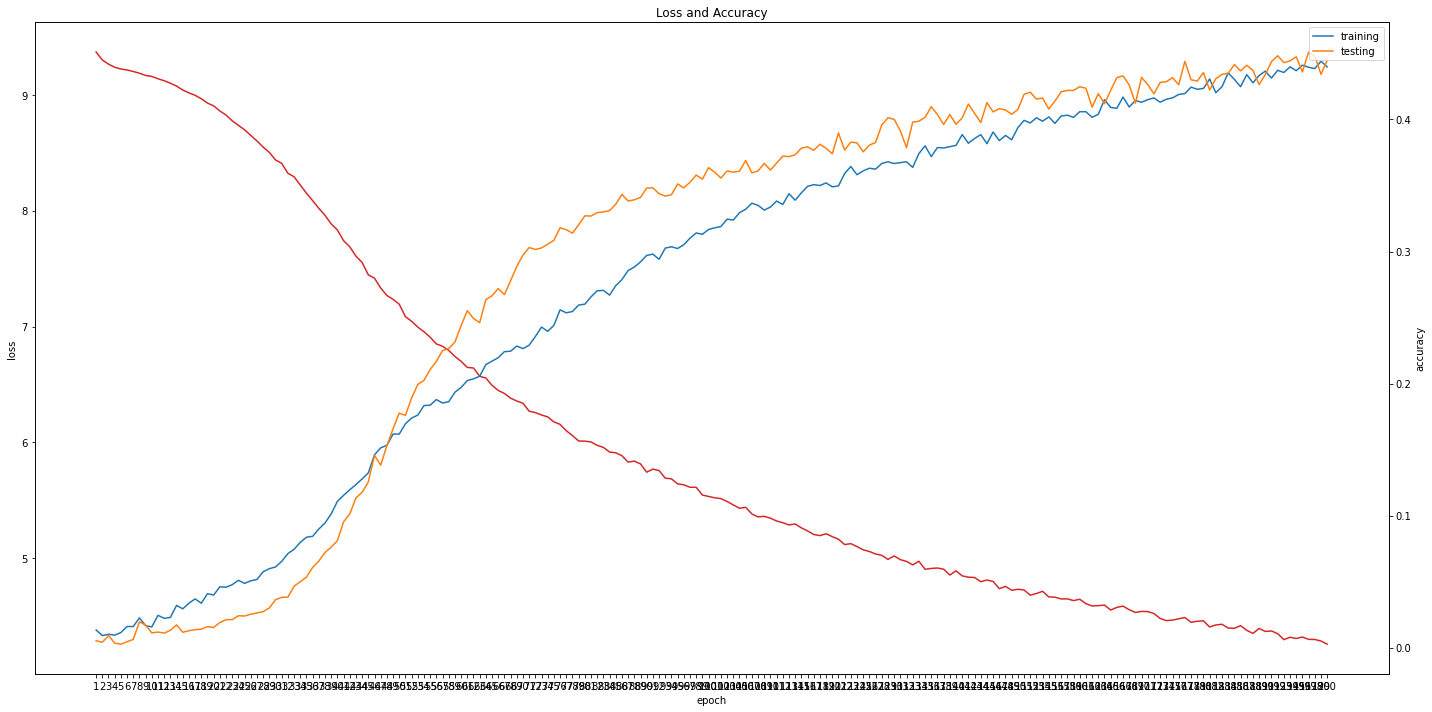

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.487037037037037
Average Testing  Accuracy: 0.5001369487811559


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train_extracted.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test_extracted.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech101_run1 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_nn(model_nn_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech101_run2 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_nn(model_nn_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech101_run3 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_nn(model_nn_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.2.3 Caltech101 - original train set and augmentation set

#### 4.2.3.1 1st time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (21420, 4096)
y_train has a size: (21420, 1)
X_test has a size: (6085, 4096)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 10000 > 20000 > 21420	Done!
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_62 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_63 (Dense)             (None, 102)               3366      
Total params: 267,654
Trainable params: 267,654
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 4.618942 Epoch loss: 51.24118 Training Accuracy: 0.011204481792717087 Testing 

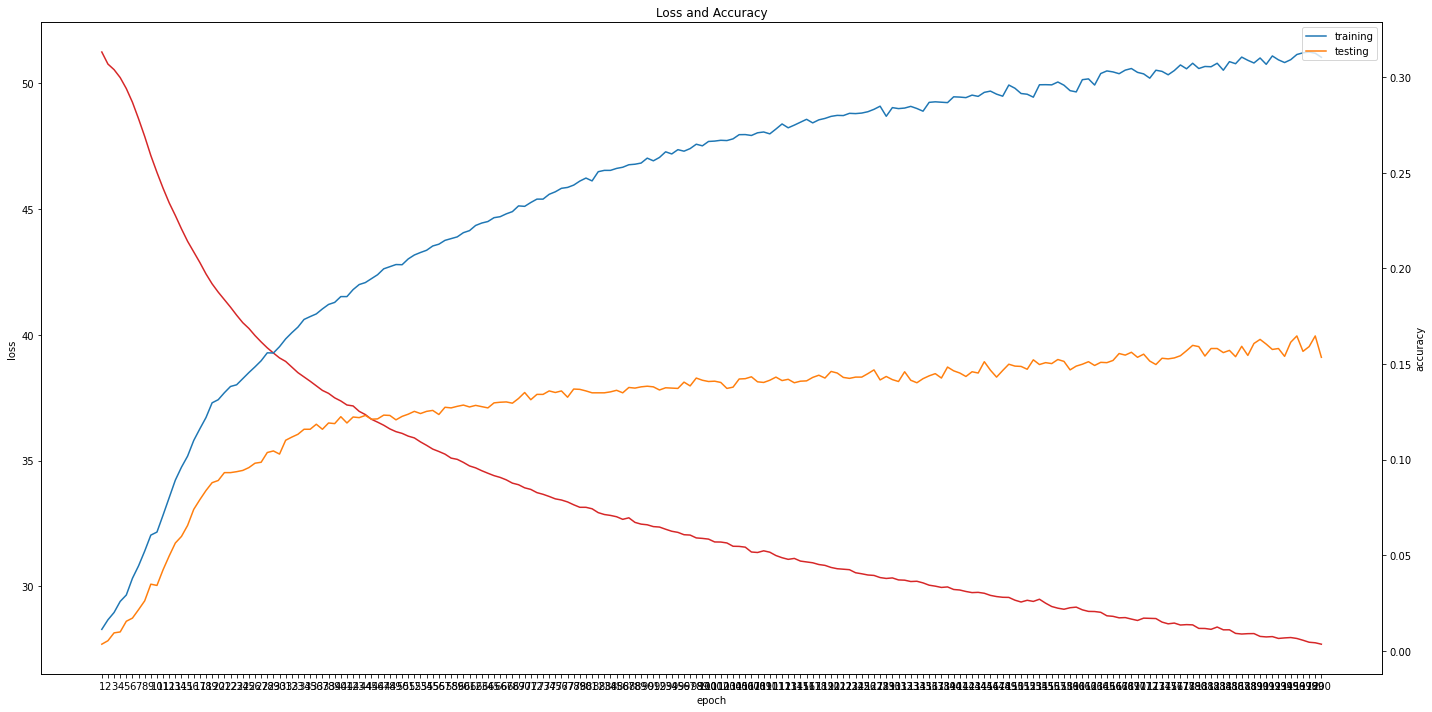

Run 2
--------------------------------------------------------------------------------
X_train has a size: (21420, 4096)
y_train has a size: (21420, 1)
X_test has a size: (6085, 4096)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 10000 > 20000 > 21420	Done!
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_65 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_66 (Dense)             (None, 102)               3366      
Total params: 267,654
Trainable params: 267,654
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 4.611583 Epoch loss: 50.92725 Training Accuracy: 0.00980392156862745 Testing A

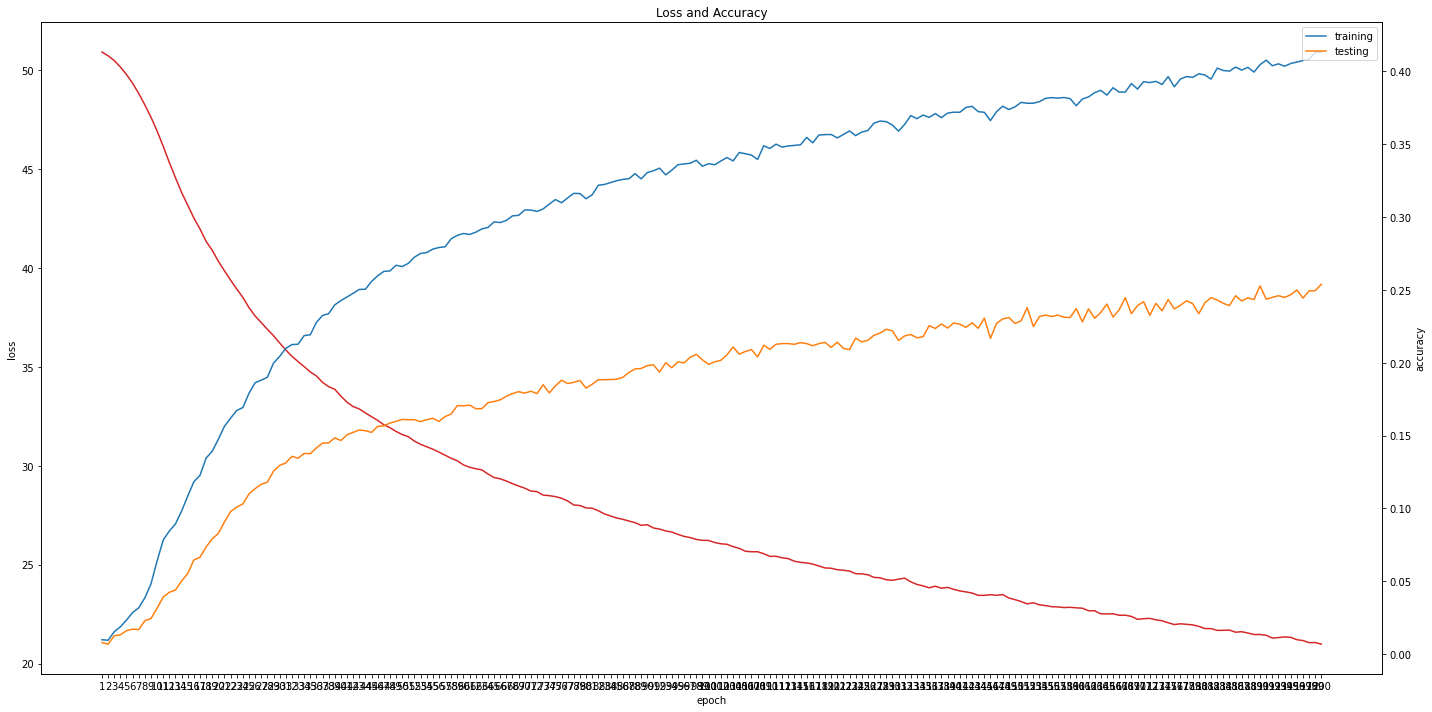

Run 3
--------------------------------------------------------------------------------
X_train has a size: (21420, 4096)
y_train has a size: (21420, 1)
X_test has a size: (6085, 4096)
y_test has a size: (6085, 1)
Shuffling dataset:   0 > 10000 > 20000 > 21420	Done!
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_68 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_69 (Dense)             (None, 102)               3366      
Total params: 267,654
Trainable params: 267,654
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 4.624969 Epoch loss: 51.256485 Training Accuracy: 0.01069094304388422 Testing 

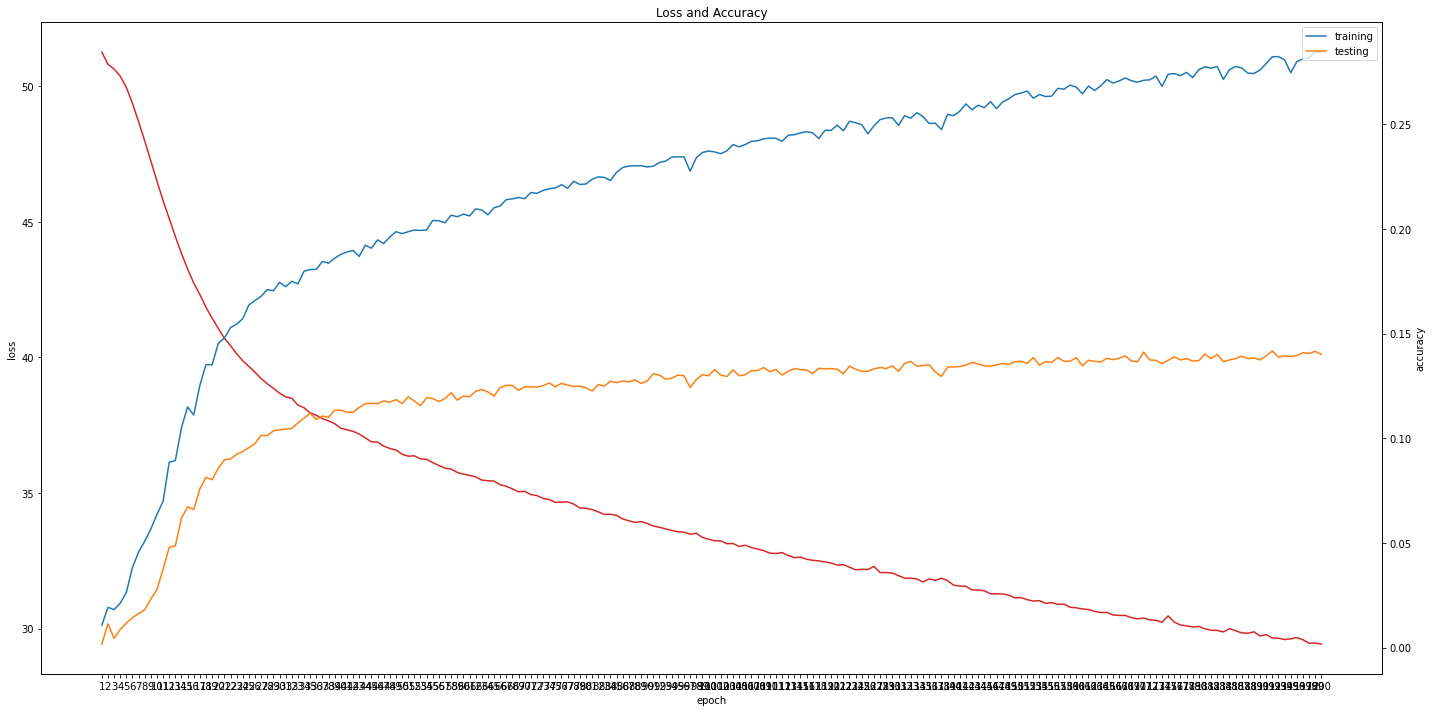

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.3360566448801743
Average Testing  Accuracy: 0.1824705560120515


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train_extracted.npy","/content/drive/MyDrive/Deep Learning_Project/caltech101_X_aug_extracted.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train.npy","/content/drive/MyDrive/Deep Learning_Project/caltech101_y_aug.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test_extracted.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech101_run1 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_nn(model_nn_caltech101_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_with_aug", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech101_run2 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_nn(model_nn_caltech101_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_with_aug", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech101_run3 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_nn(model_nn_caltech101_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech101_with_aug", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.2.4 Caltech256 - original train set

#### 4.2.4.1 1st time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (7710, 4096)
y_train has a size: (7710, 1)
X_test has a size: (22897, 4096)
y_test has a size: (22897, 1)
Shuffling dataset:   0 > 7710	Done!
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_71 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_72 (Dense)             (None, 257)               8481      
Total params: 272,769
Trainable params: 272,769
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.5564203 Epoch loss: 22.302483 Training Accuracy: 0.005058365758754864 Testing Accuracy: 0.003

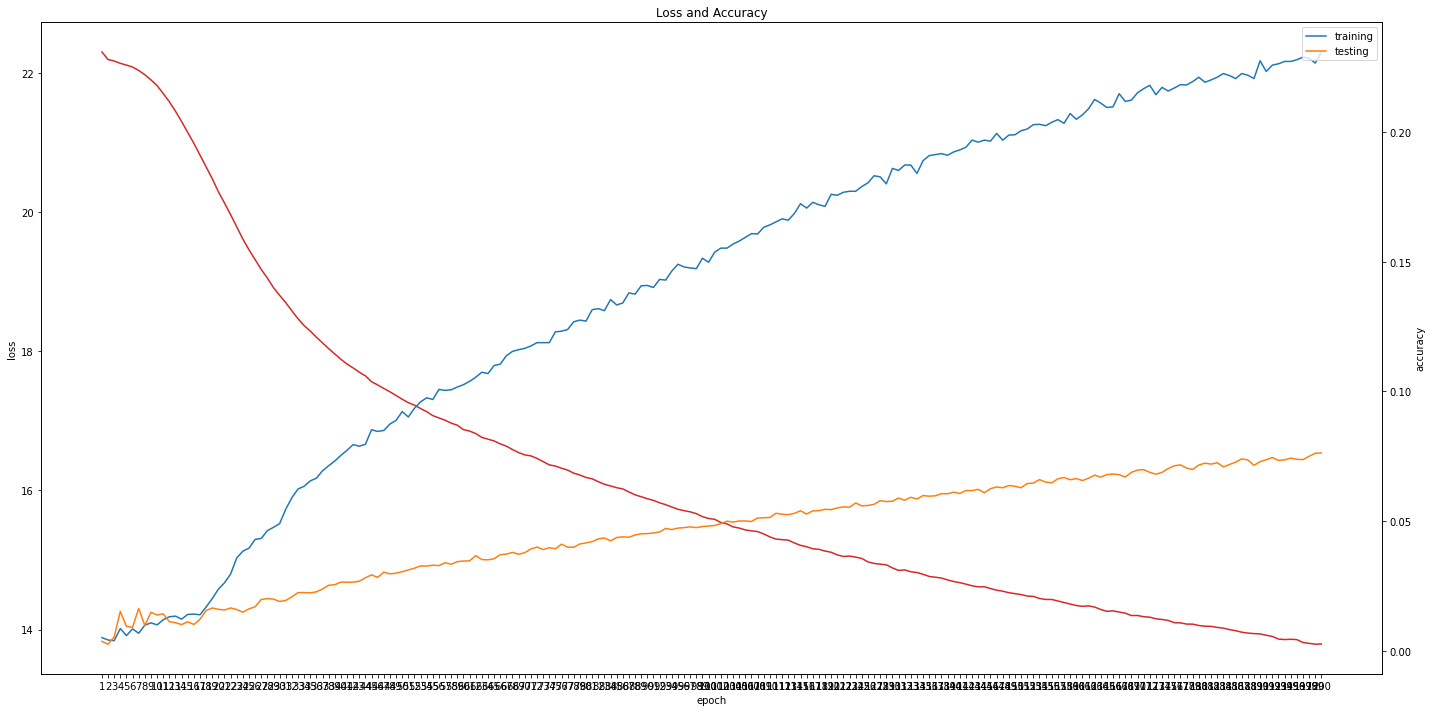

Run 2
--------------------------------------------------------------------------------
X_train has a size: (7710, 4096)
y_train has a size: (7710, 1)
X_test has a size: (22897, 4096)
y_test has a size: (22897, 1)
Shuffling dataset:   0 > 7710	Done!
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_75 (Dense)             (None, 257)               8481      
Total params: 272,769
Trainable params: 272,769
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.5602713 Epoch loss: 22.264805 Training Accuracy: 0.0036316472114137485 Testing Accuracy: 0.00

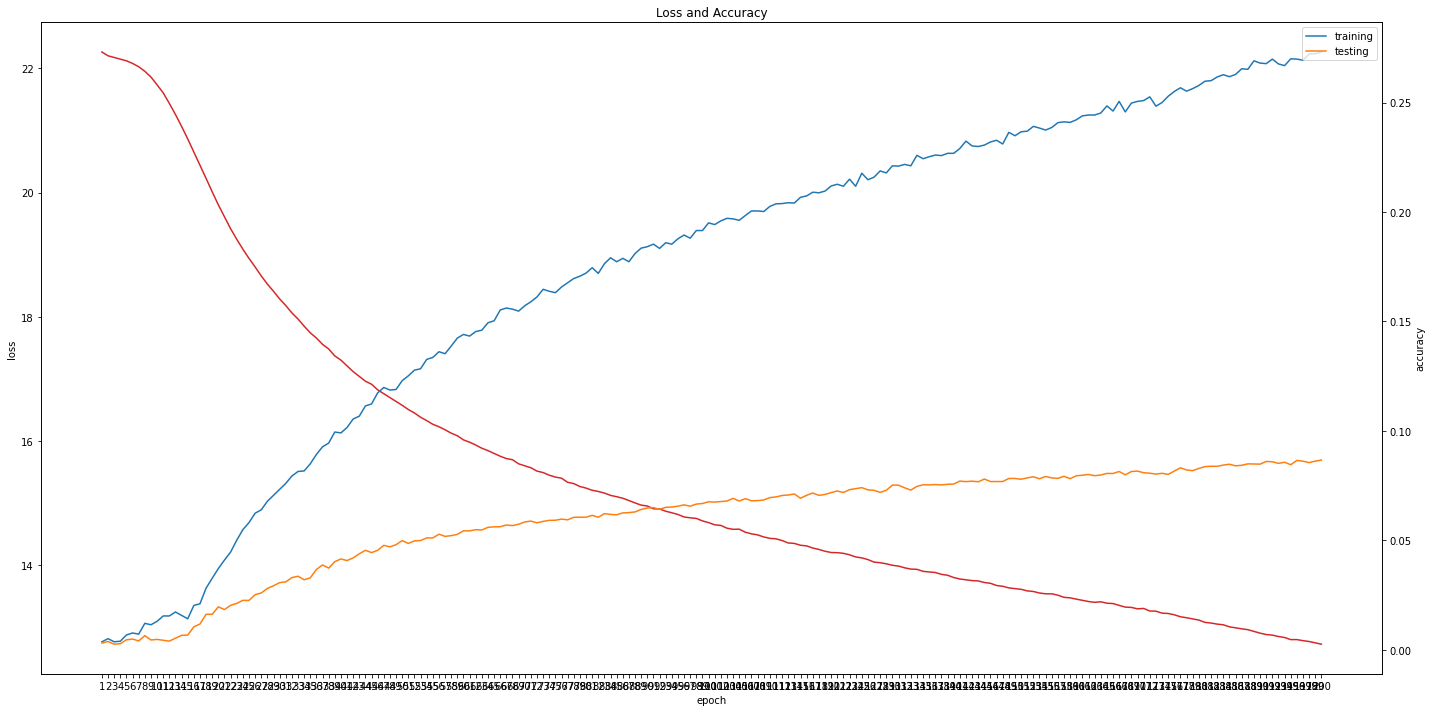

Run 3
--------------------------------------------------------------------------------
X_train has a size: (7710, 4096)
y_train has a size: (7710, 1)
X_test has a size: (22897, 4096)
y_test has a size: (22897, 1)
Shuffling dataset:   0 > 7710	Done!
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_77 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_78 (Dense)             (None, 257)               8481      
Total params: 272,769
Trainable params: 272,769
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.5555706 Epoch loss: 22.28985 Training Accuracy: 0.004798962386511025 Testing Accuracy: 0.0083

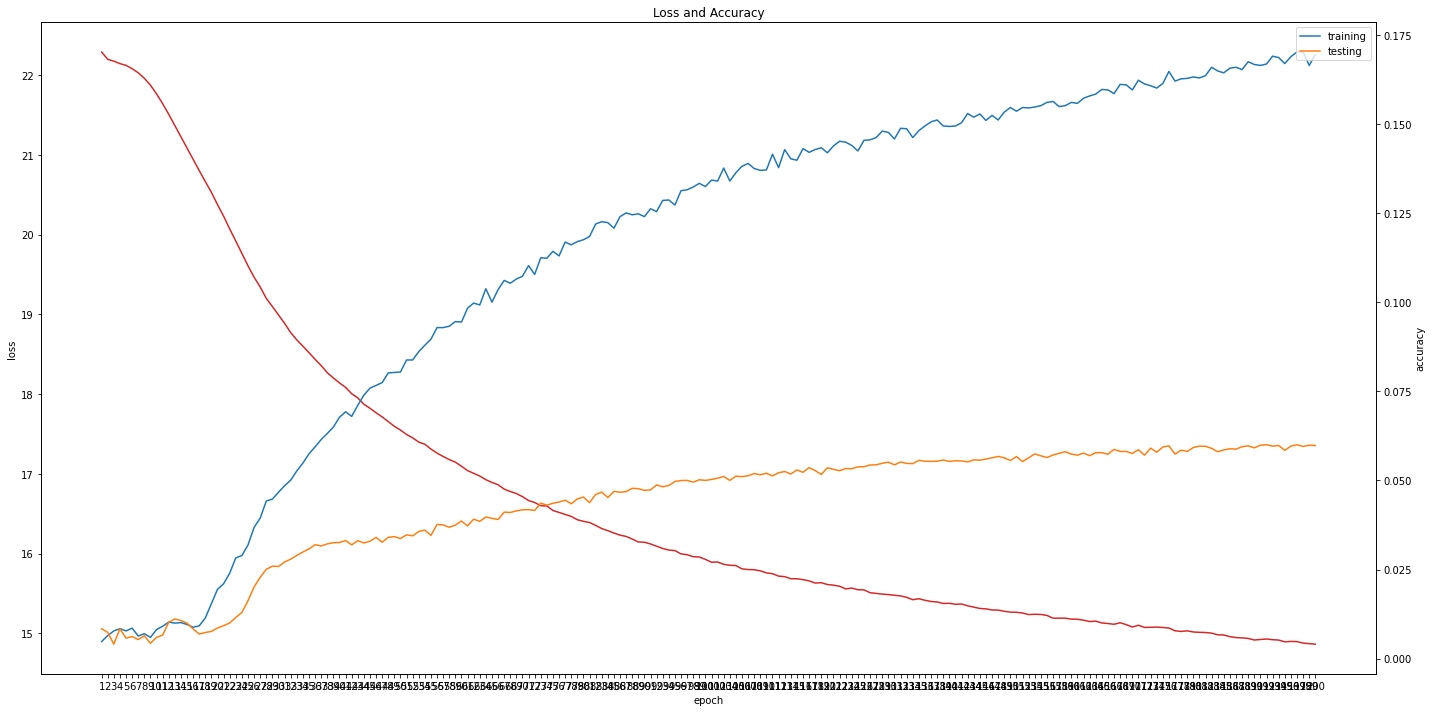

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.22447038478166884
Average Testing  Accuracy: 0.07423097640156644


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train_extracted.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test_extracted.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech256_run1 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_nn(model_nn_caltech256_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech256_run2 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_nn(model_nn_caltech256_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech256_run3 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_nn(model_nn_caltech256_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.2.5 Caltech256 - original train set and augmentation set

#### 4.2.5.1 1st time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (53970, 4096)
y_train has a size: (53970, 1)
X_test has a size: (22897, 4096)
y_test has a size: (22897, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000 > 53970	Done!
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_80 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_81 (Dense)             (None, 257)               8481      
Total params: 272,769
Trainable params: 272,769
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.530648 Epoch loss: 149.7839 Training Accuracy: 0.0

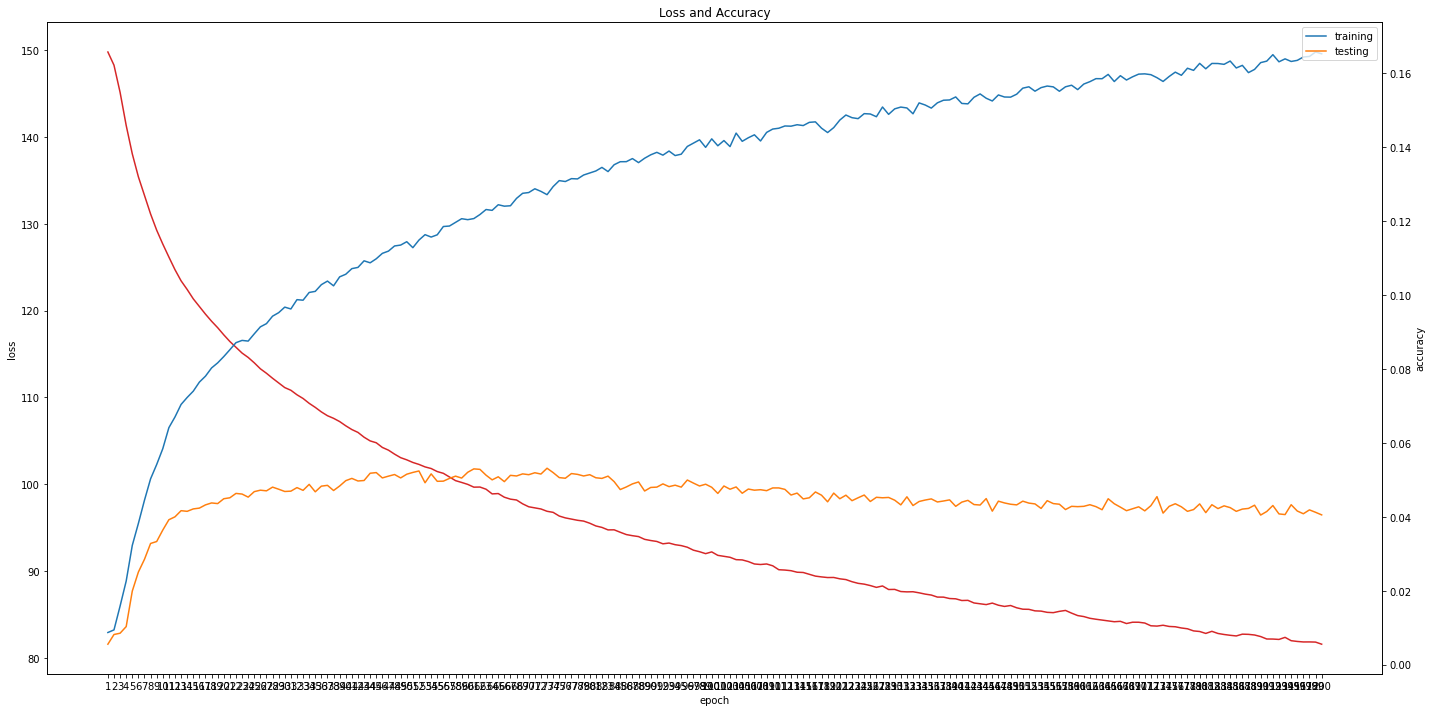

Run 2
--------------------------------------------------------------------------------
X_train has a size: (53970, 4096)
y_train has a size: (53970, 1)
X_test has a size: (22897, 4096)
y_test has a size: (22897, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000 > 53970	Done!
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_83 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_84 (Dense)             (None, 257)               8481      
Total params: 272,769
Trainable params: 272,769
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.5437384 Epoch loss: 149.88863 Training Accuracy: 0

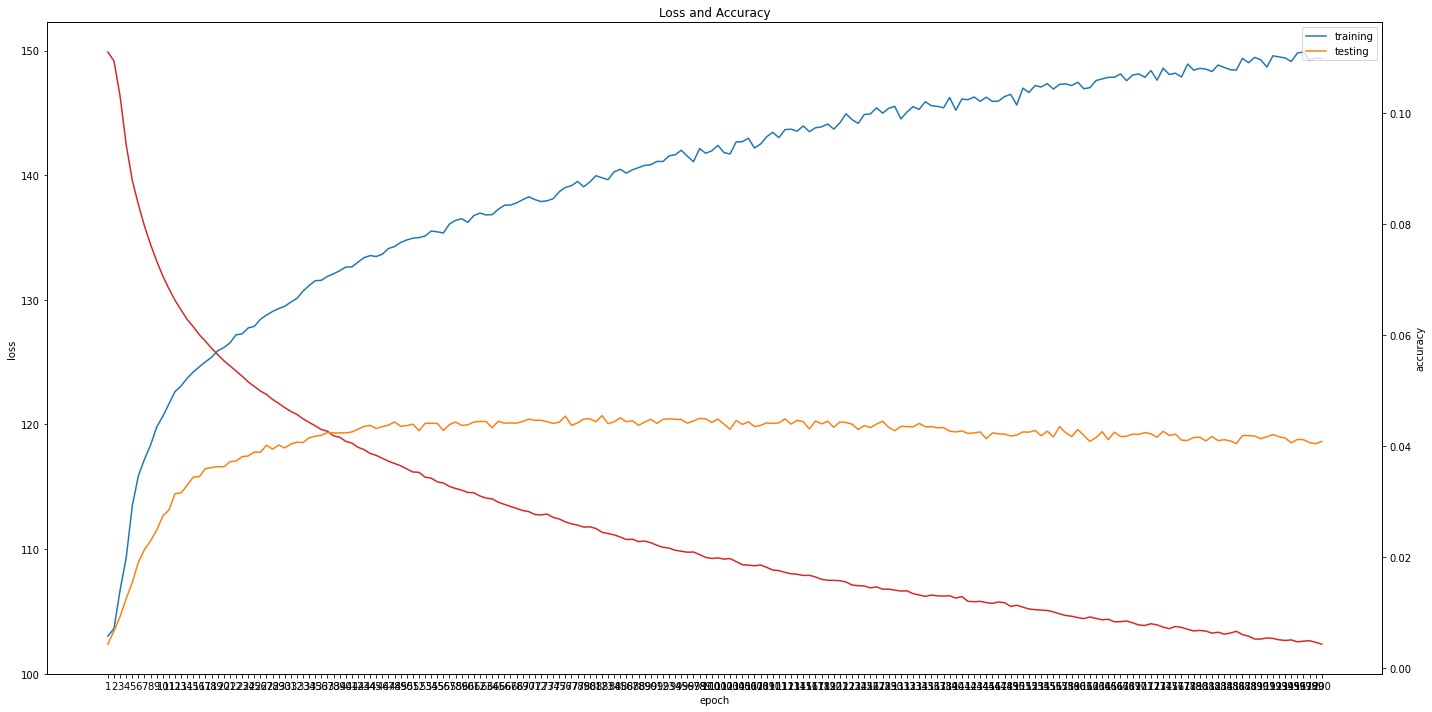

Run 3
--------------------------------------------------------------------------------
X_train has a size: (53970, 4096)
y_train has a size: (53970, 1)
X_test has a size: (22897, 4096)
y_test has a size: (22897, 1)
Shuffling dataset:   0 > 10000 > 20000 > 30000 > 40000 > 50000 > 53970	Done!
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_86 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_87 (Dense)             (None, 257)               8481      
Total params: 272,769
Trainable params: 272,769
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.548444 Epoch loss: 150.00768 Training Accuracy: 0.

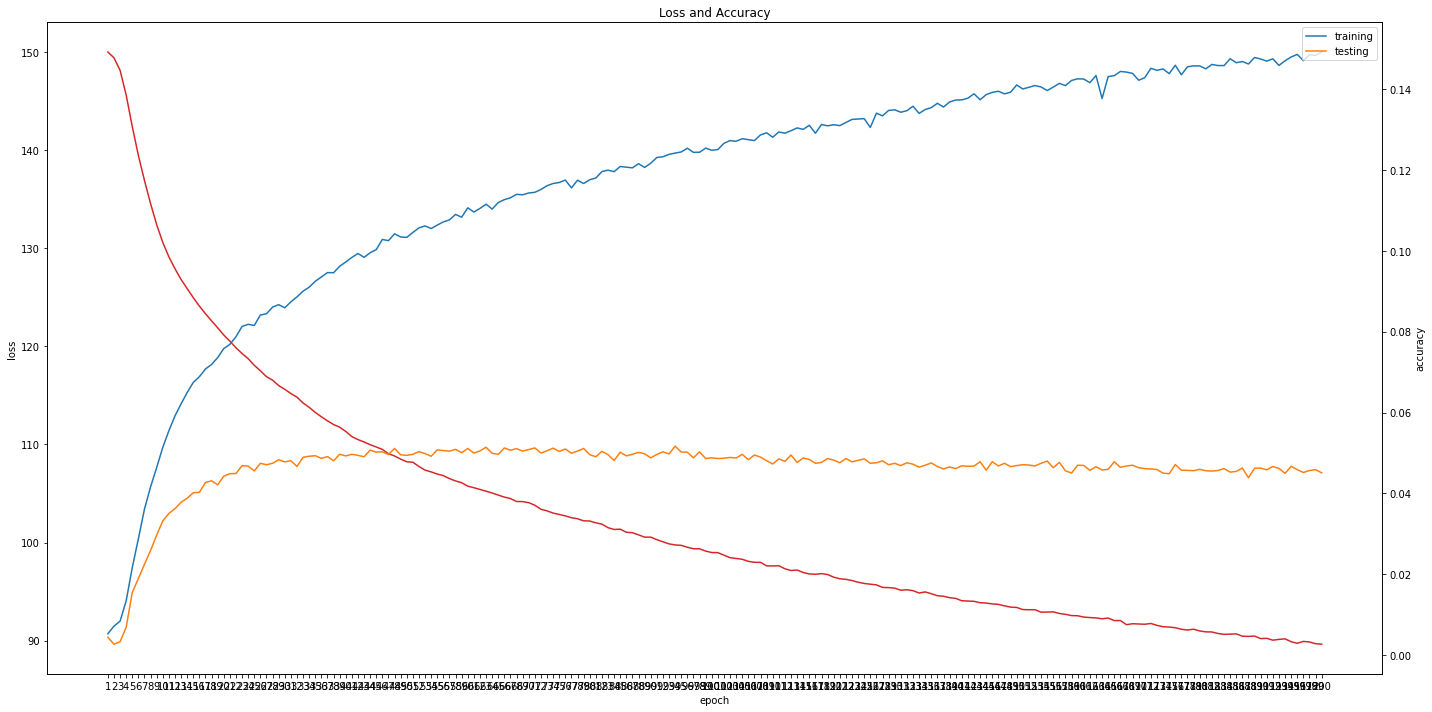

Results
--------------------------------------------------------------------------------
Average Training Accuracy: 0.14141807176826635
Average Testing  Accuracy: 0.04214525920426257


In [ ]:
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train_extracted.npy","/content/drive/MyDrive/Deep Learning_Project/caltech256_X_aug_extracted.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train.npy","/content/drive/MyDrive/Deep Learning_Project/caltech256_y_aug.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test_extracted.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech256_run1 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_nn(model_nn_caltech256_run1, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_with_aug", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech256_run2 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_nn(model_nn_caltech256_run2, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_with_aug", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048)
# get the model 
model_nn_caltech256_run3 = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_nn(model_nn_caltech256_run3, \
                                                              train_dataset, X_train, y_train, X_test, y_test, \
                                                              dataset_type="caltech256_with_aug", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=200)

print("Results")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

## 4.3 Feature Extraction by Autoencoder + NN classifier

### 4.3.1 Cifar10 - original train set

#### 4.3.1.1 1st time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (50000, 200)
y_train has a size: (50000, 1)
X_test has a size: (10000, 200)
y_test has a size: (10000, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                330       
Total params: 15,274
Trainable params: 15,274
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 2.172264 Epoch loss: 58.168037 Training Accuracy: 0.22108 Testing Accuracy: 0.2195
Epoch #    2 /  200  Batch loss: 2.0842905 Epoch loss

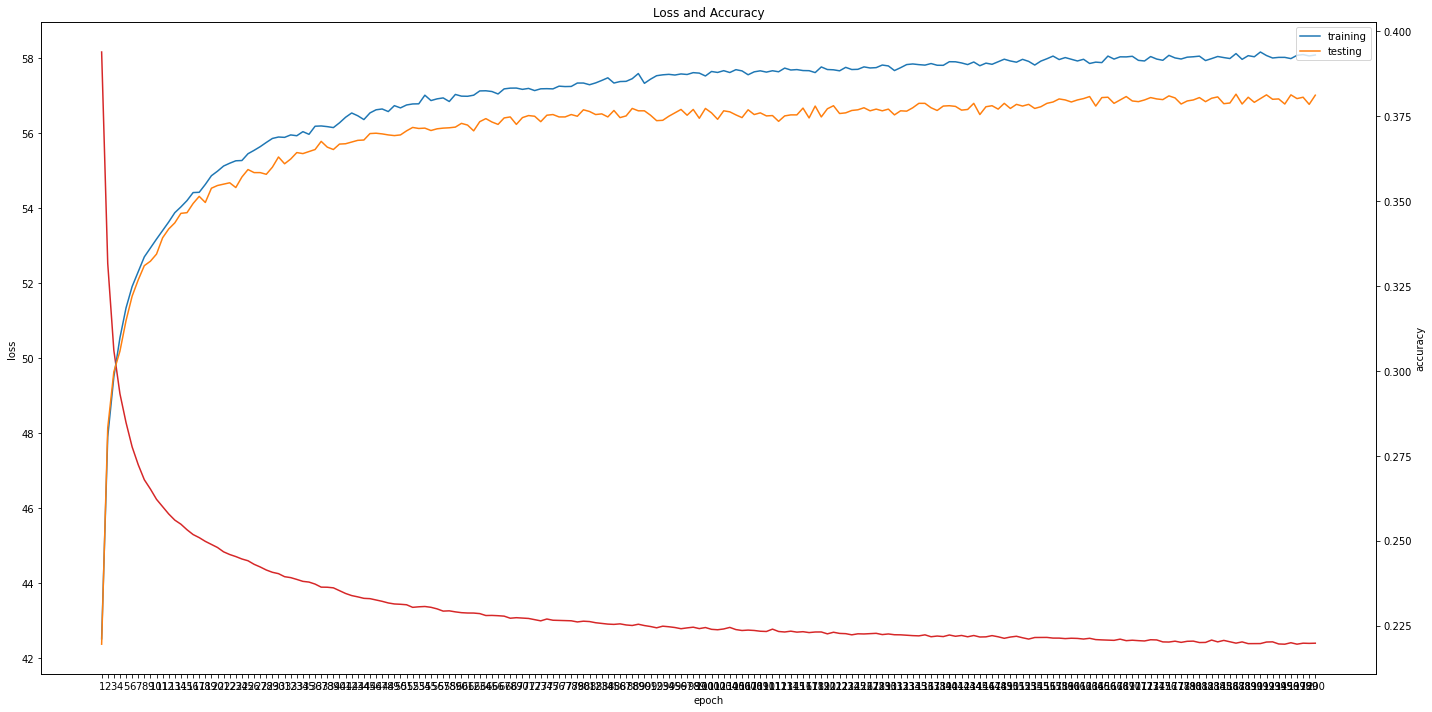

Run 2
--------------------------------------------------------------------------------
X_train has a size: (50000, 200)
y_train has a size: (50000, 1)
X_test has a size: (10000, 200)
y_test has a size: (10000, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                330       
Total params: 15,274
Trainable params: 15,274
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 2.0922182 Epoch loss: 54.9582 Training Accuracy: 0.26268 Testing Accuracy: 0.2701
Epoch #    2 /  200  Batch loss: 2.0091267 Epoch los

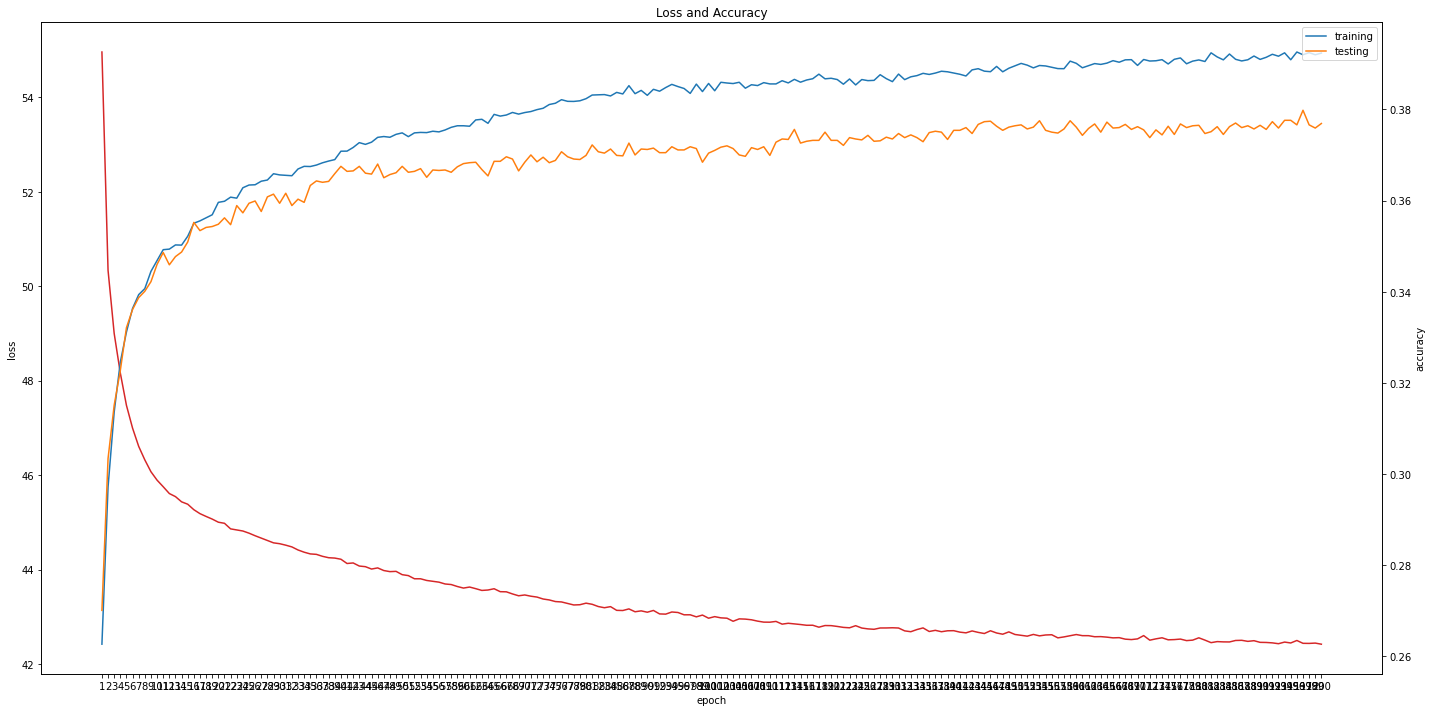

Run 3
--------------------------------------------------------------------------------
X_train has a size: (50000, 200)
y_train has a size: (50000, 1)
X_test has a size: (10000, 200)
y_test has a size: (10000, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                330       
Total params: 15,274
Trainable params: 15,274
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 2.0733576 Epoch loss: 55.60633 Training Accuracy: 0.26546 Testing Accuracy: 0.2652
Epoch #    2 /  200  Batch loss: 2.0188568 Epoch lo

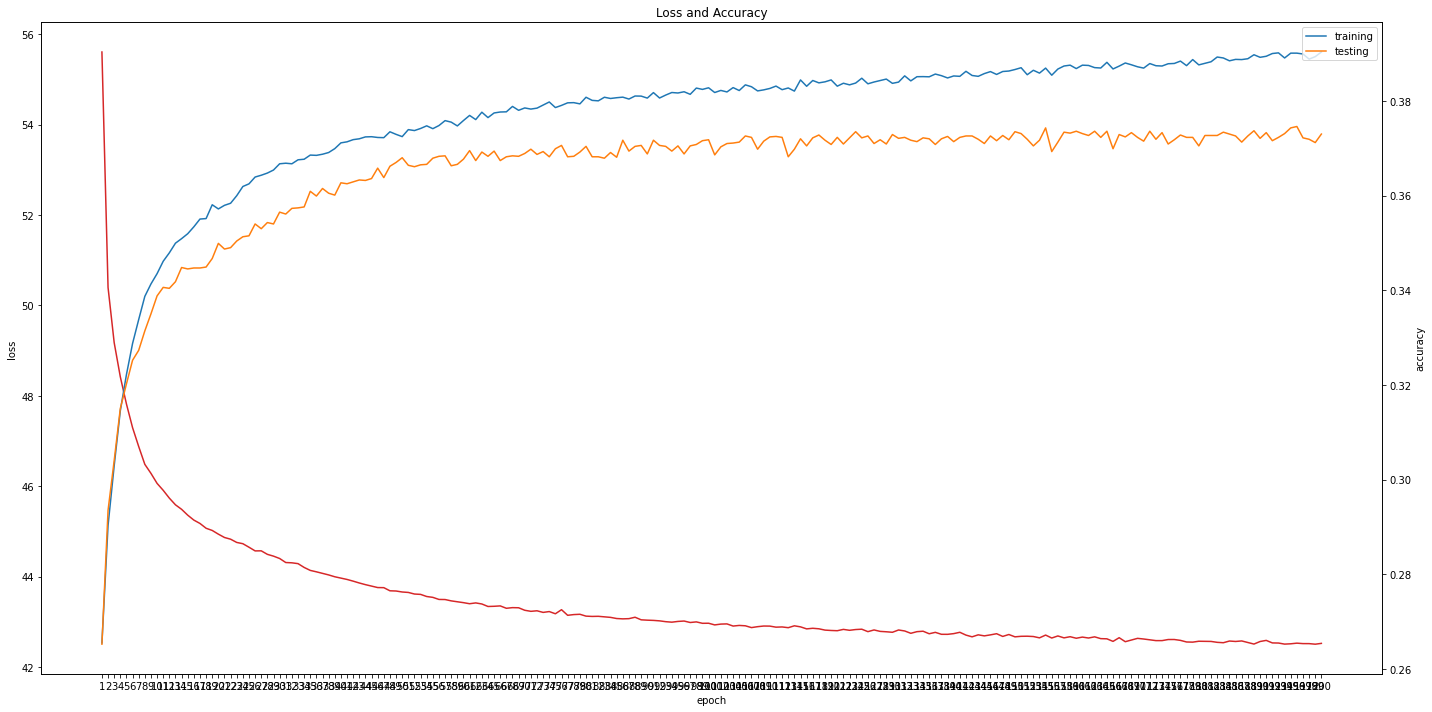

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 0.0
Average Testing  Accuracy: 0.3786333333333334


In [ ]:
# prepare the datasets
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_X_train_encoded.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_y_train_encoded.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test_encoded.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test_encoded.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="cifar10_encoder", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="cifar10_encoder", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="cifar10_encoder", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.3.2 Caltech101 - original train set

#### 4.3.2.1 1st time - 3 runs


Run 1
--------------------------------------------------------------------------------
X_train has a size: (3060, 200)
y_train has a size: (3060, 1)
X_test has a size: (6085, 200)
y_test has a size: (6085, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 102)               3366      
Total params: 18,310
Trainable params: 18,310
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.6357355 Epoch loss: 11.8033905 Training Accuracy: 0.012091503267973857 Testing Accuracy: 0.03648315529991783
Epoch #    2 /  200  Batch 

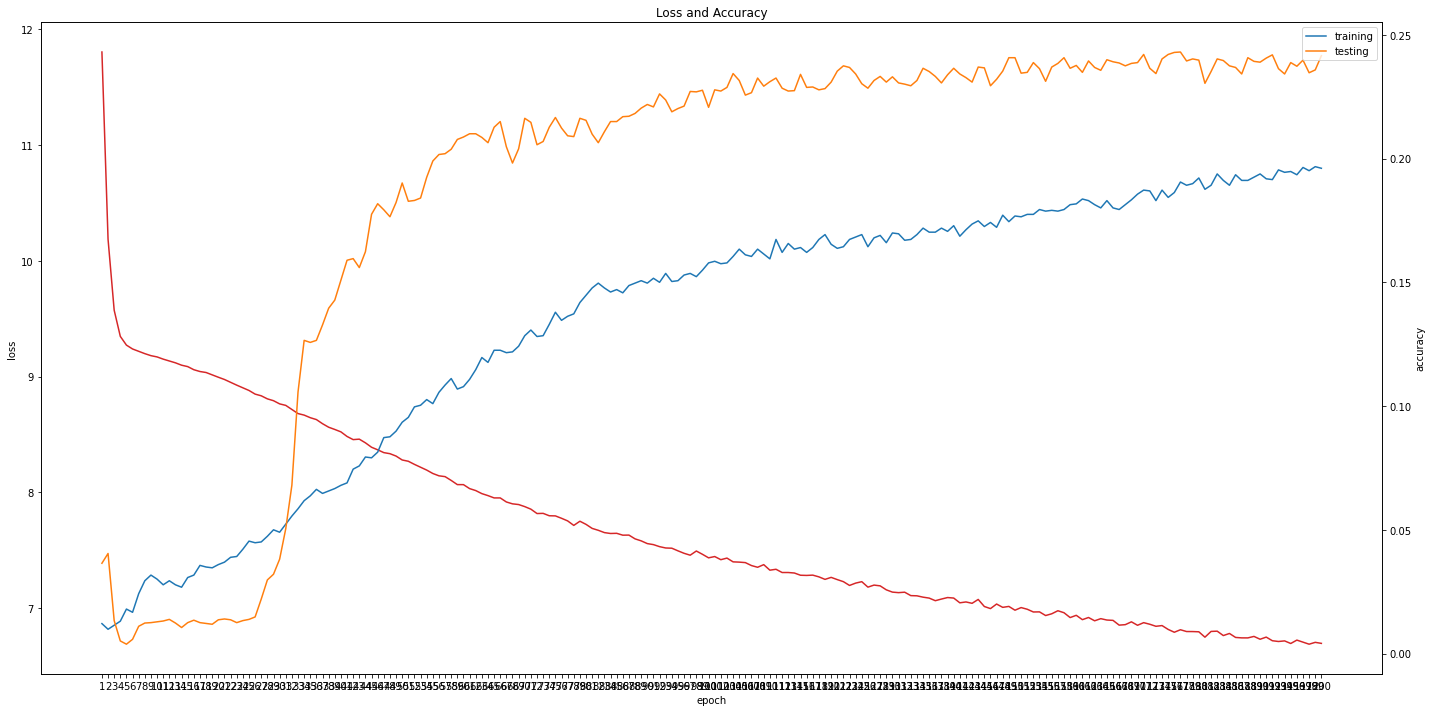

Run 2
--------------------------------------------------------------------------------
X_train has a size: (3060, 200)
y_train has a size: (3060, 1)
X_test has a size: (6085, 200)
y_test has a size: (6085, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_60 (Dense)             (None, 102)               3366      
Total params: 18,310
Trainable params: 18,310
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.665509 Epoch loss: 11.914333 Training Accuracy: 0.013071895424836602 Testing Accuracy: 0.010024650780608053
Epoch #    2 /  200  Batch l

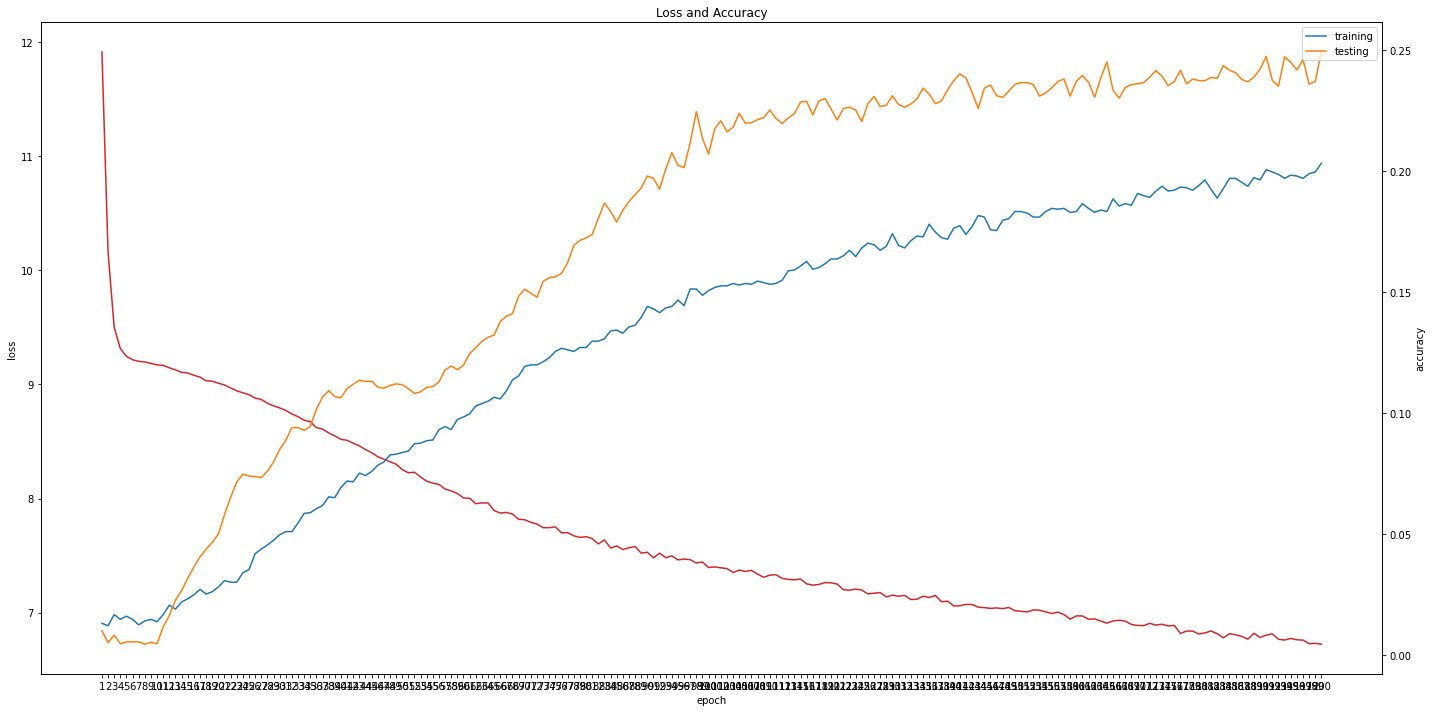

Run 3
--------------------------------------------------------------------------------
X_train has a size: (3060, 200)
y_train has a size: (3060, 1)
X_test has a size: (6085, 200)
y_test has a size: (6085, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_62 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_63 (Dense)             (None, 102)               3366      
Total params: 18,310
Trainable params: 18,310
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 8.162694 Epoch loss: 17.872723 Training Accuracy: 0.01241830065359477 Testing Accuracy: 0.0016433853738701725
Epoch #    2 /  200  Batch l

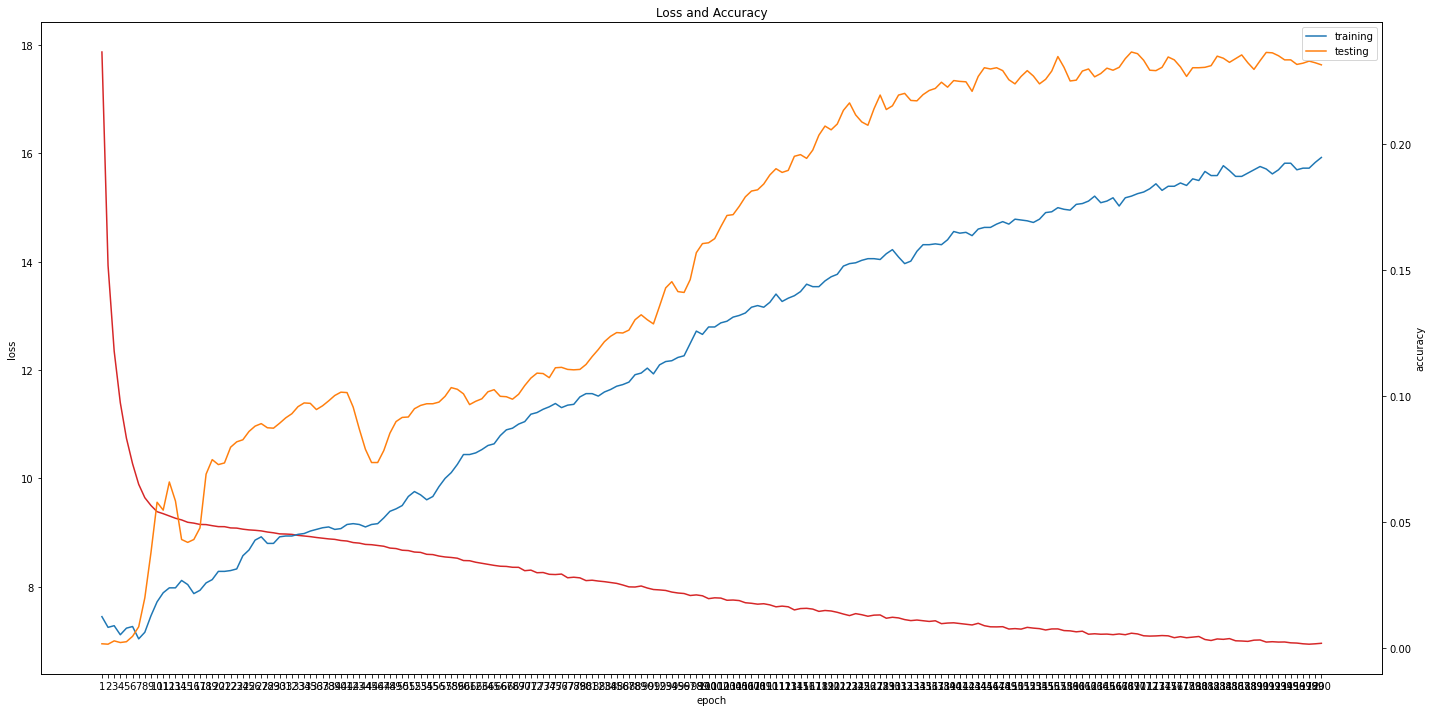

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 0.19106753812636165
Average Testing  Accuracy: 0.2430019172829362


In [ ]:
# prepare the datasets
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_train_encoded.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_train_encoded.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test_encoded.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test_encoded.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="caltech101_encoder", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="caltech101_encoder", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="caltech101_encoder", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

### 4.3.3 Caltech256 - original train set

#### 4.3.3.1 1st time - 3 runs

Run 1
--------------------------------------------------------------------------------
X_train has a size: (7710, 200)
y_train has a size: (7710, 1)
X_test has a size: (22897, 200)
y_test has a size: (22897, 1)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_65 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_66 (Dense)             (None, 257)               8481      
Total params: 23,425
Trainable params: 23,425
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.6329646 Epoch loss: 23.14591 Training Accuracy: 0.004928664072632944 Testing Accuracy: 0.003755950561208892
Epoch #    2 /  200  Batch

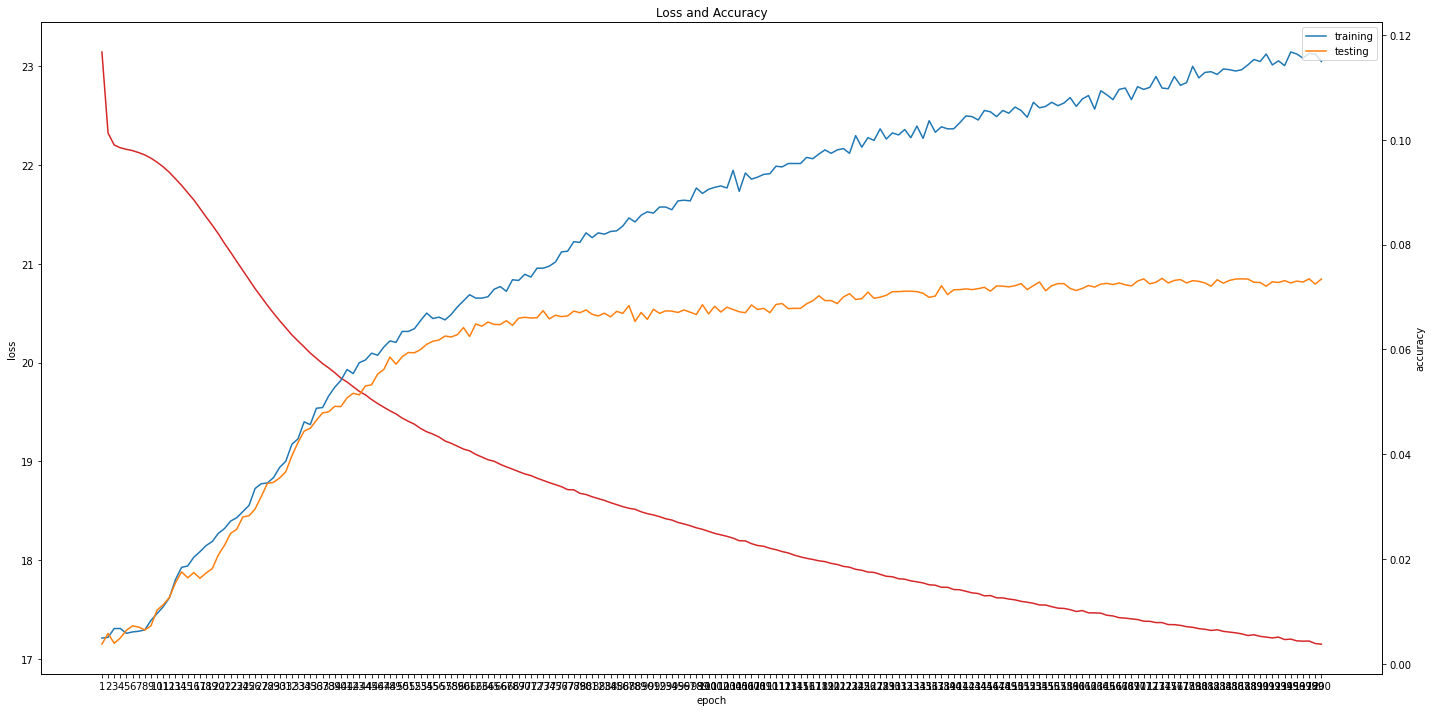

Run 2
--------------------------------------------------------------------------------
X_train has a size: (7710, 200)
y_train has a size: (7710, 1)
X_test has a size: (22897, 200)
y_test has a size: (22897, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_68 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_69 (Dense)             (None, 257)               8481      
Total params: 23,425
Trainable params: 23,425
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.8795915 Epoch loss: 25.075766 Training Accuracy: 0.0028534370946822307 Testing Accuracy: 0.004367384373498711
Epoch #    2 /  200  Bat

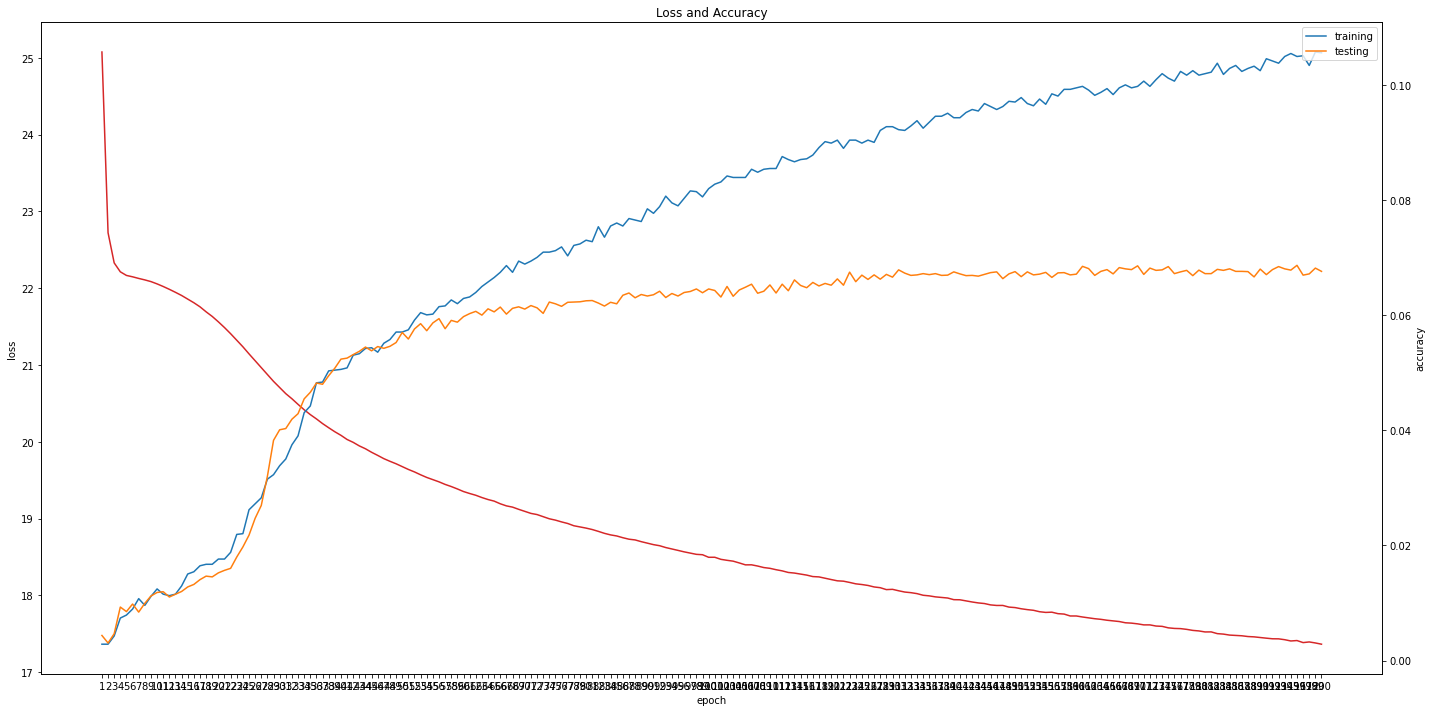

Run 3
--------------------------------------------------------------------------------
X_train has a size: (7710, 200)
y_train has a size: (7710, 1)
X_test has a size: (22897, 200)
y_test has a size: (22897, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_71 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_72 (Dense)             (None, 257)               8481      
Total params: 23,425
Trainable params: 23,425
Non-trainable params: 0
_________________________________________________________________
Epoch #    1 /  200  Batch loss: 5.7667475 Epoch loss: 24.456936 Training Accuracy: 0.004539559014267186 Testing Accuracy: 0.003537581342533956
Epoch #    2 /  200  Batc

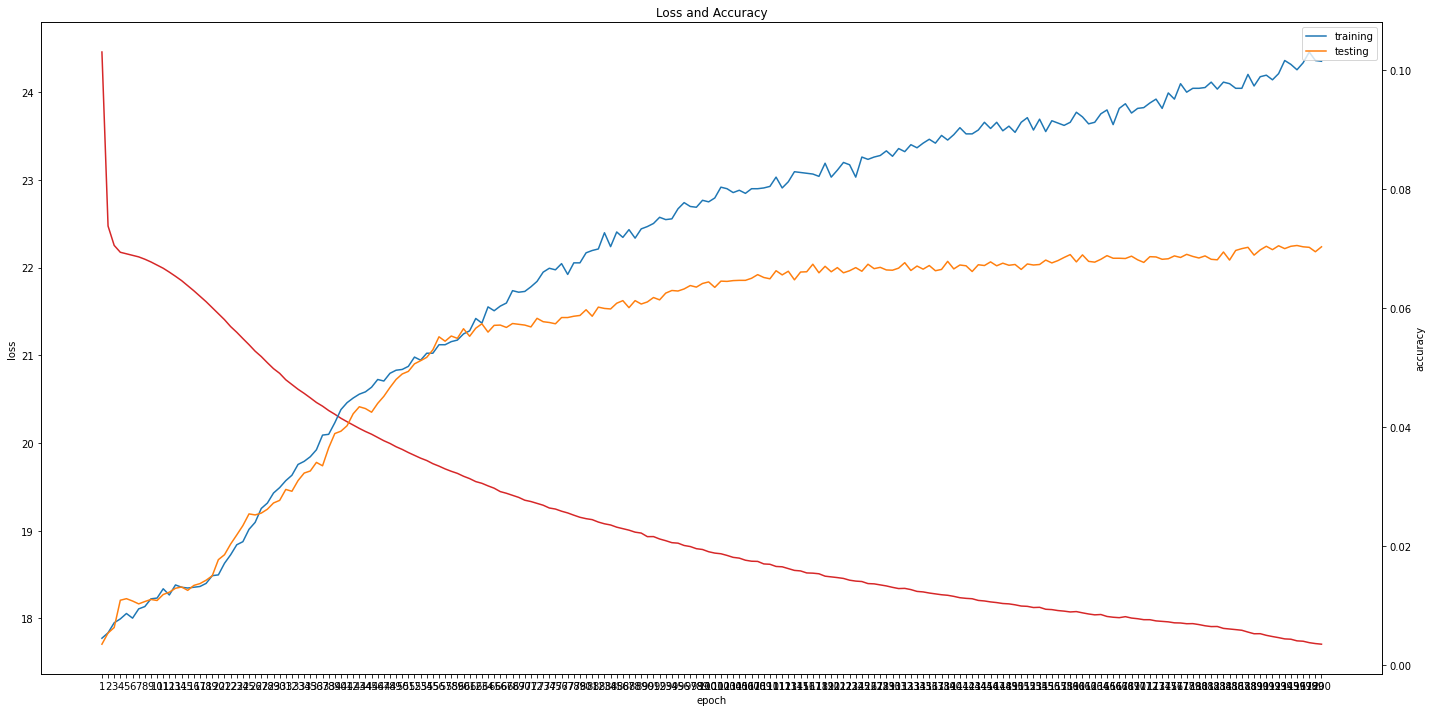

Results for saved best model
--------------------------------------------------------------------------------
Average Training Accuracy: 0.10492866407263295
Average Testing  Accuracy: 0.07089720632979575


In [ ]:
# prepare the datasets
X_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_train_encoded.npy"]
y_train_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_train_encoded.npy"]
X_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test_encoded.npy"]
y_test_path = ["/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test_encoded.npy"]

# run 3 times
print("Run 1")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_1, te_acc_run_1 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="caltech256_encoder", sn_run="run1_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Run 2")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_2, te_acc_run_2 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="caltech256_encoder", sn_run="run2_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Run 3")
print("-"*80)
# prepare the datasets
train_dataset, X_train, y_train, X_test, y_test = prepare_dataset_nn(X_train_path, y_train_path, X_test_path, y_test_path,batch_size=2048,shuffle_by_row=False)
# get the model 
model_test = get_model_nn(X_train.shape[1],np.unique(y_train).shape[0])
# train and test
tr_acc_run_3, te_acc_run_3 = train_and_test_nn(model_test, \
                                               train_dataset, X_train, y_train, X_test, y_test, \
                                               dataset_type="caltech256_encoder", sn_run="run3_1", lr=1e-3, acc_target=0.9, num_epoch=200)
print("Results for saved best model")
print("-"*80)
print("Average Training Accuracy:", (tr_acc_run_1+tr_acc_run_2+tr_acc_run_3)/3)
print("Average Testing  Accuracy:", (te_acc_run_1+te_acc_run_2+te_acc_run_3)/3)

# 5.Final Result (best models)  
According to the previous methods and results, the best average accuracy are from models by "Transfer Learning with DenseNet121".

In [6]:
# average training and testing accuracy
def test_model(X_test, y_test, model_path):
  X_test = X_test.astype(np.float32) /255
  y_test = y_test.astype(np.float32)

  model = load_model(model_path)
  y_pred = model.predict(X_test)
  y_pred_classes = [np.argmax(y_p) for y_p in y_pred]

  return accuracy_score(y_test, y_pred_classes)
  
best_model = ["/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_cifar10_run2_3.h5", \
              "/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech101_resize_run1_3.h5", \
              "/content/drive/MyDrive/Deep Learning_Project/model_transfer_learning_dense121_caltech256_resize_run1_3.h5"]

test_set_X = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy", \
              "/content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy", \
              "/content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy"]

test_set_y = ["/content/drive/MyDrive/Deep Learning_Project/cifar10_y_test.npy", \
              "/content/drive/MyDrive/Deep Learning_Project/caltech101_y_test.npy", \
              "/content/drive/MyDrive/Deep Learning_Project/caltech256_y_test.npy"]

for idx in range(len(best_model)):
  print("Testing accuracy for {}:{}".format(test_set_X[idx],test_model(np.load(test_set_X[idx]),np.load(test_set_y[idx]),best_model[idx])))
    

Testing accuracy for /content/drive/MyDrive/Deep Learning_Project/cifar10_X_test.npy:0.9331
Testing accuracy for /content/drive/MyDrive/Deep Learning_Project/caltech101_X_test.npy:0.8635990139687757
Testing accuracy for /content/drive/MyDrive/Deep Learning_Project/caltech256_X_test.npy:0.5080578241691052
